In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import matplotlib

from MieSppForce import frenel, dipoles, green_func, force

In [2]:
plt.rcParams.update({'font.size': 14})

In [3]:

eps_Au = frenel.get_interpolate('Au')
eps_Si = frenel.get_interpolate('Si')

wl = 800  # [nm]
STOP = 45
dist = 20
angle = 25*np.pi/180
phase = 0
a = 0 # TM

R = np.linspace(20,120,50)
F_x = np.empty((len(R), 8))
F_y = np.empty_like(F_x)
F_z = np.empty_like(F_x)


for i in tqdm(range(len(R))):
    point = [0,0,dist+R[i]]
    f =  force.F(wl, eps_Au, point, R[i], eps_Si, angle,amplitude=1,phase=phase,a=a, stop=STOP, full_output=True)
    F_x[i,:] = f[0]
    F_y[i,:] = f[1]
    F_z[i,:] = f[2]

  0%|          | 0/50 [00:00<?, ?it/s]


TypeError: F() got an unexpected keyword argument 'a'

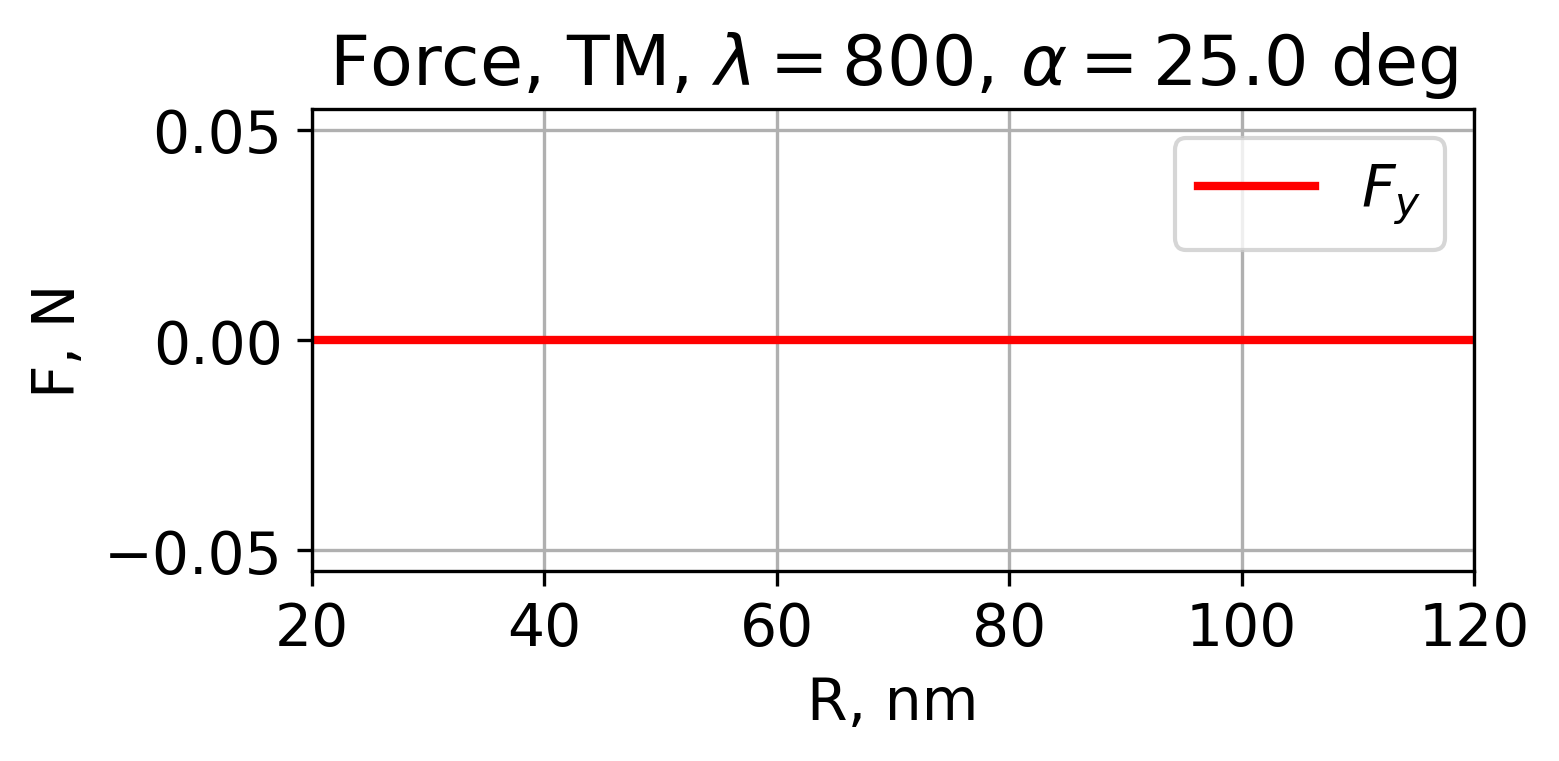

In [8]:
plt.figure(figsize=(5,2), dpi=300)
plt.plot(R, F_y[:,0], label='$F_y$', lw=2, c='red')
plt.xlim(R[0], R[-1])
plt.title(f'Force, TM, $\lambda=${wl}, $\\alpha=${round(angle*180/np.pi,1)} deg')
plt.xlabel('R, nm')
plt.ylabel('F, N')
plt.grid()
plt.legend()
plt.savefig('plots_new/F_y_TM.pdf', format="pdf", bbox_inches='tight')
plt.show()


In [18]:
STOP = 45
dist = 20
angle = 25*np.pi/180
phase = 0
a = 0 # TM
wl = 800

R = np.linspace(20,120,50)
P = np.empty((len(R), 3), dtype=complex)
M = np.empty((len(R), 3), dtype=complex)

for i in tqdm(range(len(R))):
    point = [0,0,dist+R[i]]
    p,m = dipoles.calc_dipoles_v2(wl, eps_Au, point, R[i], eps_Si, angle, amplitude=1, phase=phase, a=a, stop=STOP )
    p,m = p[:,0],m[:,0]
    P[i,:], M[i,:] = p,m
    

  8%|▊         | 4/50 [00:01<00:19,  2.39it/s]/Users/semyon_b/git/SPP_ANALYTICAL/.venv/lib/python3.9/site-packages/scipy/integrate/_quadpack_py.py:446: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  re_retval = quad(refunc, a, b, args, full_output, epsabs,
100%|██████████| 50/50 [00:21<00:00,  2.34it/s]


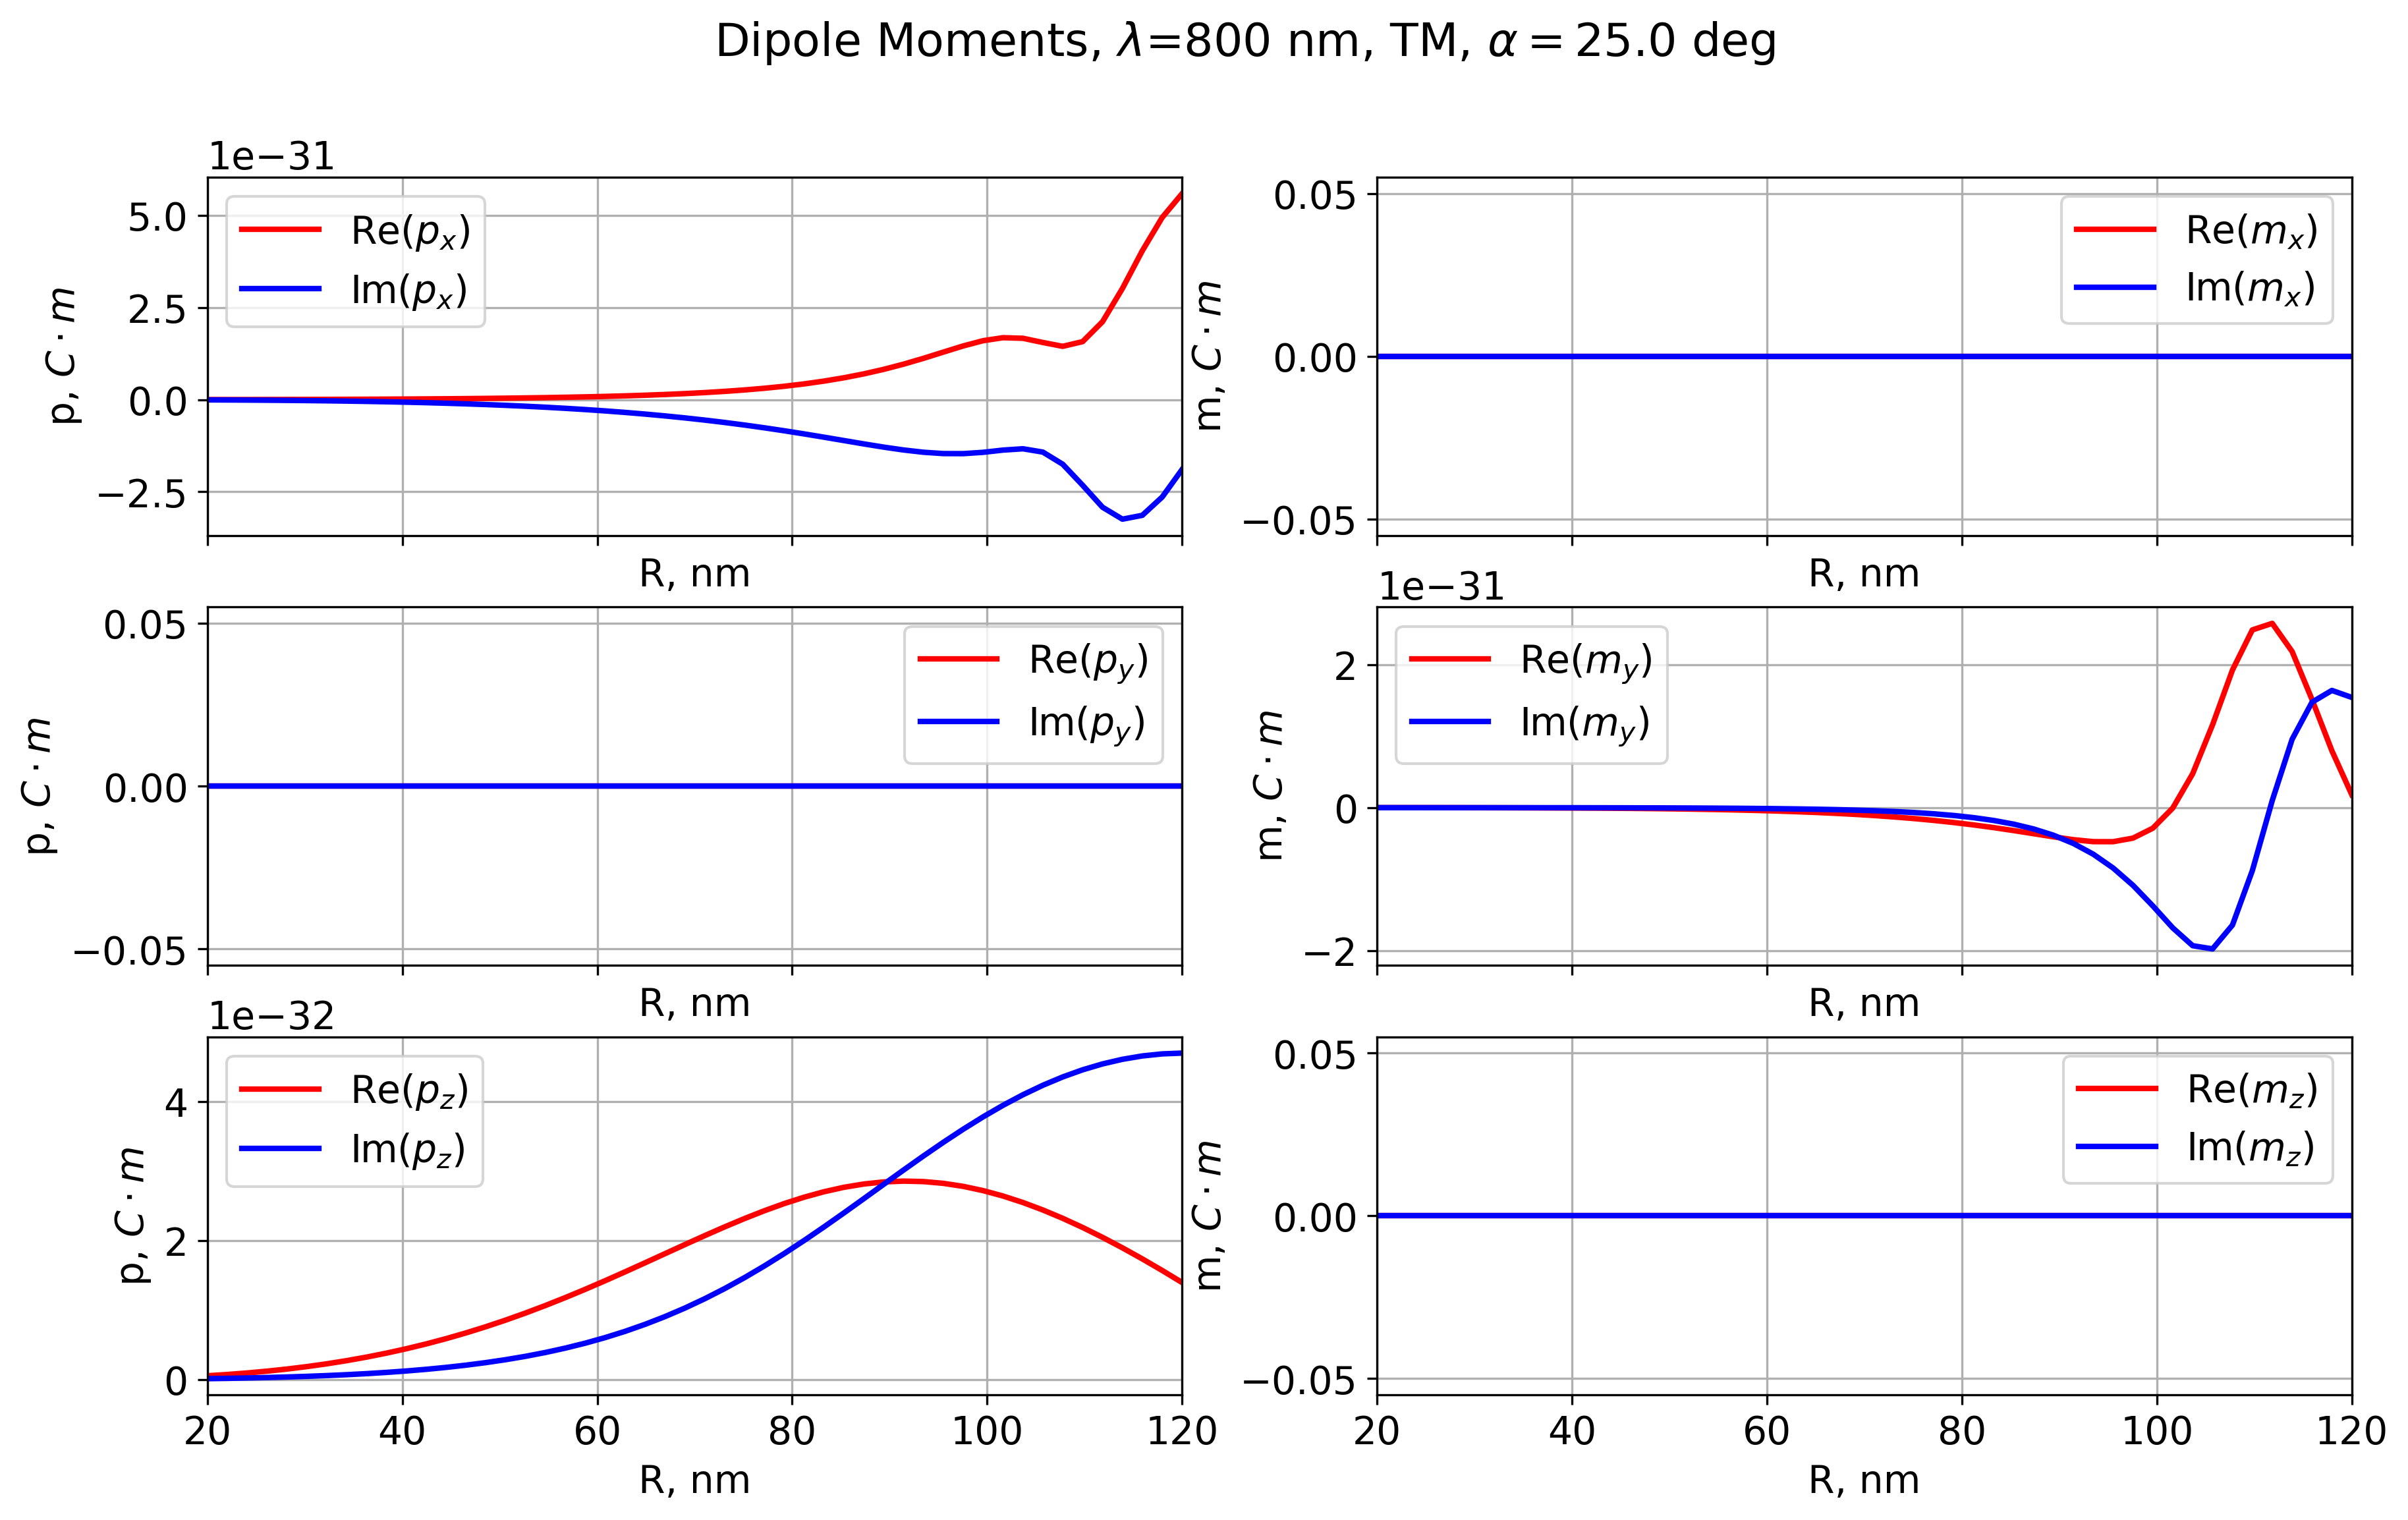

In [19]:
ncols = 2
nrows = 3
c_const = 299792458
data =[[P[:,0], M[:,0]/c_const],
       [P[:,1], M[:,1]/c_const], 
       [P[:,2], M[:,2]/c_const]]

labels = [ ['$p_x$', '$m_x$'],
           ['$p_y$', '$m_y$'],
           ['$p_z$', '$m_z$']]

fig, axs = plt.subplots(nrows,ncols, figsize=(14,8), sharex=True, dpi=300)

fig.suptitle(f"Dipole Moments, $\\lambda$={wl} nm, TM, $\\alpha=${round(angle*180/np.pi,1)} deg")


for j in range(ncols):
    for i in range(nrows):
        axs[i,j].plot(R, np.real(data[i][j]), label='Re('+labels[i][j]+')', c='red', lw=2)
        axs[i,j].plot(R, np.imag(data[i][j]), label='Im('+labels[i][j]+')', c='blue', lw=2)
        axs[i,j].legend()
        axs[i,j].grid()
        if j==0:
            axs[i,j].set_ylabel('p, $C \cdot m$')
        else:
            axs[i,j].set_ylabel('m, $C \cdot m$')
        axs[i,j].set_xlim(R[0], R[-1])
        axs[i,j].set_xlabel('R, nm')
        
plt.savefig('plots_new/Dipoles_TM.pdf', format="pdf", bbox_inches='tight')
plt.show()

In [10]:

eps_Au = frenel.get_interpolate('Au')
eps_Si = frenel.get_interpolate('Si')

wl = 800  # [nm]
STOP = 45
dist = 20
angle = 25*np.pi/180
phase = 0
a = 1 # TE

R = np.linspace(20,120,50)
F_x = np.empty((len(R), 8))
F_y = np.empty_like(F_x)
F_z = np.empty_like(F_x)


for i in tqdm(range(len(R))):
    point = [0,0,dist+R[i]]
    f =  force.F(wl, eps_Au, point, R[i], eps_Si, angle,amplitude=1,phase=phase,a=a, stop=STOP, full_output=True)
    F_x[i,:] = f[0]
    F_y[i,:] = f[1]
    F_z[i,:] = f[2]

  6%|▌         | 3/50 [00:02<00:44,  1.06it/s]/Users/semyon_b/git/SPP_ANALYTICAL/.venv/lib/python3.9/site-packages/scipy/integrate/_quadpack_py.py:446: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  re_retval = quad(refunc, a, b, args, full_output, epsabs,
100%|██████████| 50/50 [00:47<00:00,  1.06it/s]


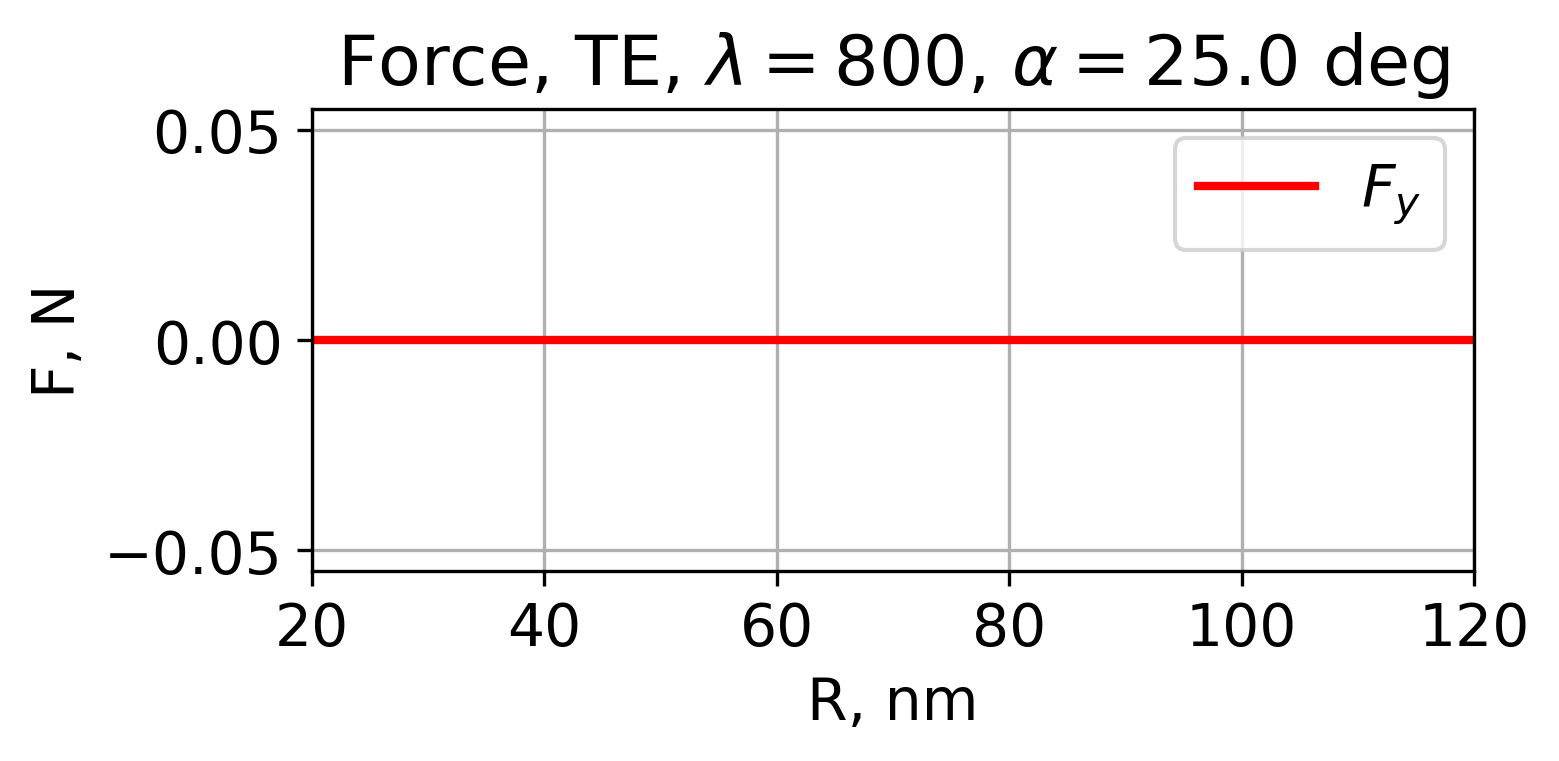

In [11]:
plt.figure(figsize=(5,2), dpi=300)
plt.plot(R, F_y[:,0], label='$F_y$', lw=2, c='red')
plt.xlim(R[0], R[-1])
plt.title(f'Force, TE, $\lambda=${wl}, $\\alpha=${round(angle*180/np.pi,1)} deg')
plt.xlabel('R, nm')
plt.ylabel('F, N')
plt.grid()
plt.legend()
plt.savefig('plots_new/F_y_TE.pdf', format="pdf", bbox_inches='tight')
plt.show()


In [20]:
STOP = 45
dist = 20
angle = 25*np.pi/180
phase = 0
a = 1 # TM
wl = 800

R = np.linspace(20,120,50)
P = np.empty((len(R), 3), dtype=complex)
M = np.empty((len(R), 3), dtype=complex)

for i in tqdm(range(len(R))):
    point = [0,0,dist+R[i]]
    p,m = dipoles.calc_dipoles_v2(wl, eps_Au, point, R[i], eps_Si, angle, amplitude=1, phase=phase, a=a, stop=STOP )
    p,m = p[:,0],m[:,0]
    P[i,:], M[i,:] = p,m
    

  8%|▊         | 4/50 [00:01<00:19,  2.33it/s]/Users/semyon_b/git/SPP_ANALYTICAL/.venv/lib/python3.9/site-packages/scipy/integrate/_quadpack_py.py:446: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  re_retval = quad(refunc, a, b, args, full_output, epsabs,
100%|██████████| 50/50 [00:21<00:00,  2.32it/s]


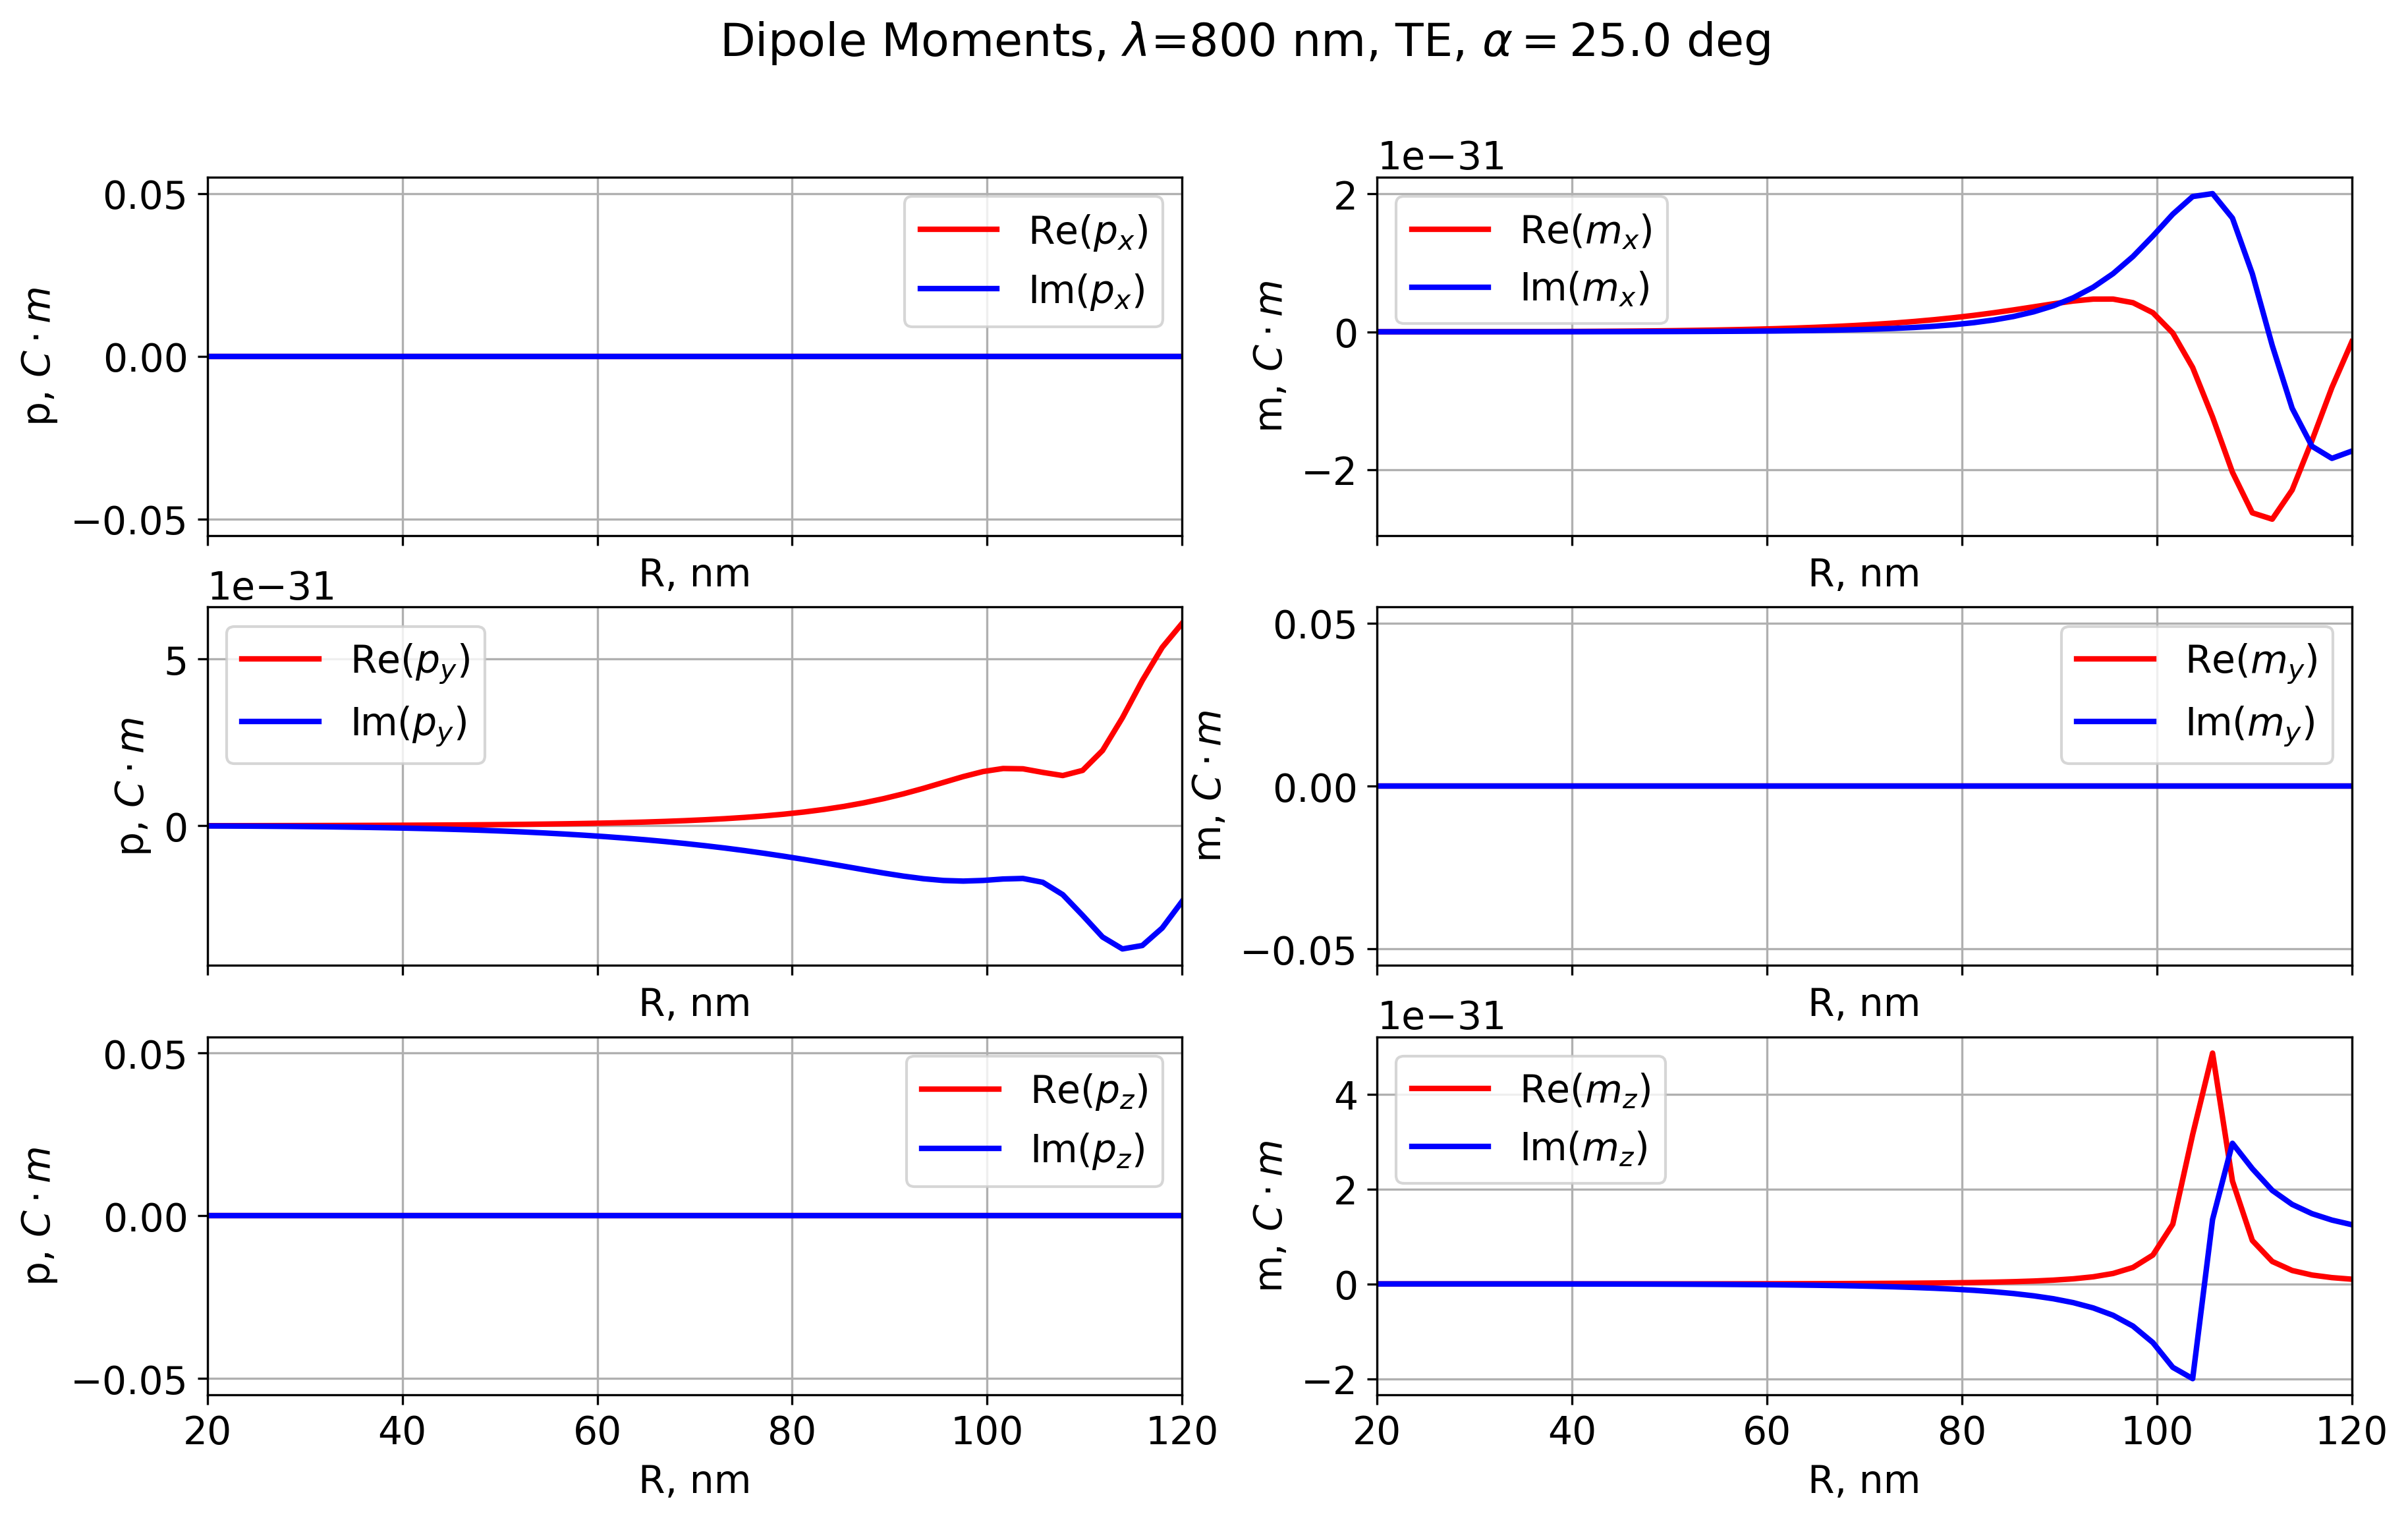

In [21]:
ncols = 2
nrows = 3
c_const = 299792458
data =[[P[:,0], M[:,0]/c_const],
       [P[:,1], M[:,1]/c_const], 
       [P[:,2], M[:,2]/c_const]]

labels = [ ['$p_x$', '$m_x$'],
           ['$p_y$', '$m_y$'],
           ['$p_z$', '$m_z$']]

fig, axs = plt.subplots(nrows,ncols, figsize=(14,8), sharex=True, dpi=300)

fig.suptitle(f"Dipole Moments, $\\lambda$={wl} nm, TE, $\\alpha=${round(angle*180/np.pi,1)} deg")


for j in range(ncols):
    for i in range(nrows):
        axs[i,j].plot(R, np.real(data[i][j]), label='Re('+labels[i][j]+')', c='red', lw=2)
        axs[i,j].plot(R, np.imag(data[i][j]), label='Im('+labels[i][j]+')', c='blue', lw=2)
        axs[i,j].legend()
        axs[i,j].grid()
        if j==0:
            axs[i,j].set_ylabel('p, $C \cdot m$')
        else:
            axs[i,j].set_ylabel('m, $C \cdot m$')
        axs[i,j].set_xlim(R[0], R[-1])
        axs[i,j].set_xlabel('R, nm')
        
plt.savefig('plots_new/dipoles_TE.pdf', format="pdf", bbox_inches='tight')
plt.show()

# Green Funcs

In [16]:
import green_func
eps_Au = frenel.get_interpolate('Au')
eps_Si = frenel.get_interpolate('Si')

wl = 800  # [nm]
STOP = 1
dist = 20
R = np.linspace(20,120,50)

GrefE00, GrefE22 = np.empty(len(R), dtype=complex), np.empty(len(R), dtype=complex)
GrefH00, GrefH22 = np.empty(len(R), dtype=complex), np.empty(len(R), dtype=complex)
rotGrefE01, rotGrefE10 = np.empty(len(R), dtype=complex), np.empty(len(R), dtype=complex)

for i in tqdm(range(len(R))):
    point = [0,0,dist+R[i]]
    G_ref_E, G_ref_H = green_func.green_ref_00(wl, point[2], eps_Au, STOP)
    rot_G_ref_E, _ = green_func.rot_green_ref_00(wl, point[2], eps_Au, STOP)
    GrefE00[i] = G_ref_E[0,0]
    GrefE22[i] = G_ref_E[2,2]
    GrefH00[i] = G_ref_H[0,0]
    GrefH22[i] = G_ref_H[2,2]
    rotGrefE01[i] = rot_G_ref_E[0,1]
    rotGrefE10[i] = rot_G_ref_E[1,0]


  8%|▊         | 4/50 [00:00<00:06,  7.58it/s]/Users/semyon_b/git/SPP_ANALYTICAL/.venv/lib/python3.9/site-packages/scipy/integrate/_quadpack_py.py:446: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  re_retval = quad(refunc, a, b, args, full_output, epsabs,
100%|██████████| 50/50 [00:06<00:00,  7.59it/s]


GrefE00 = GrefE11, 

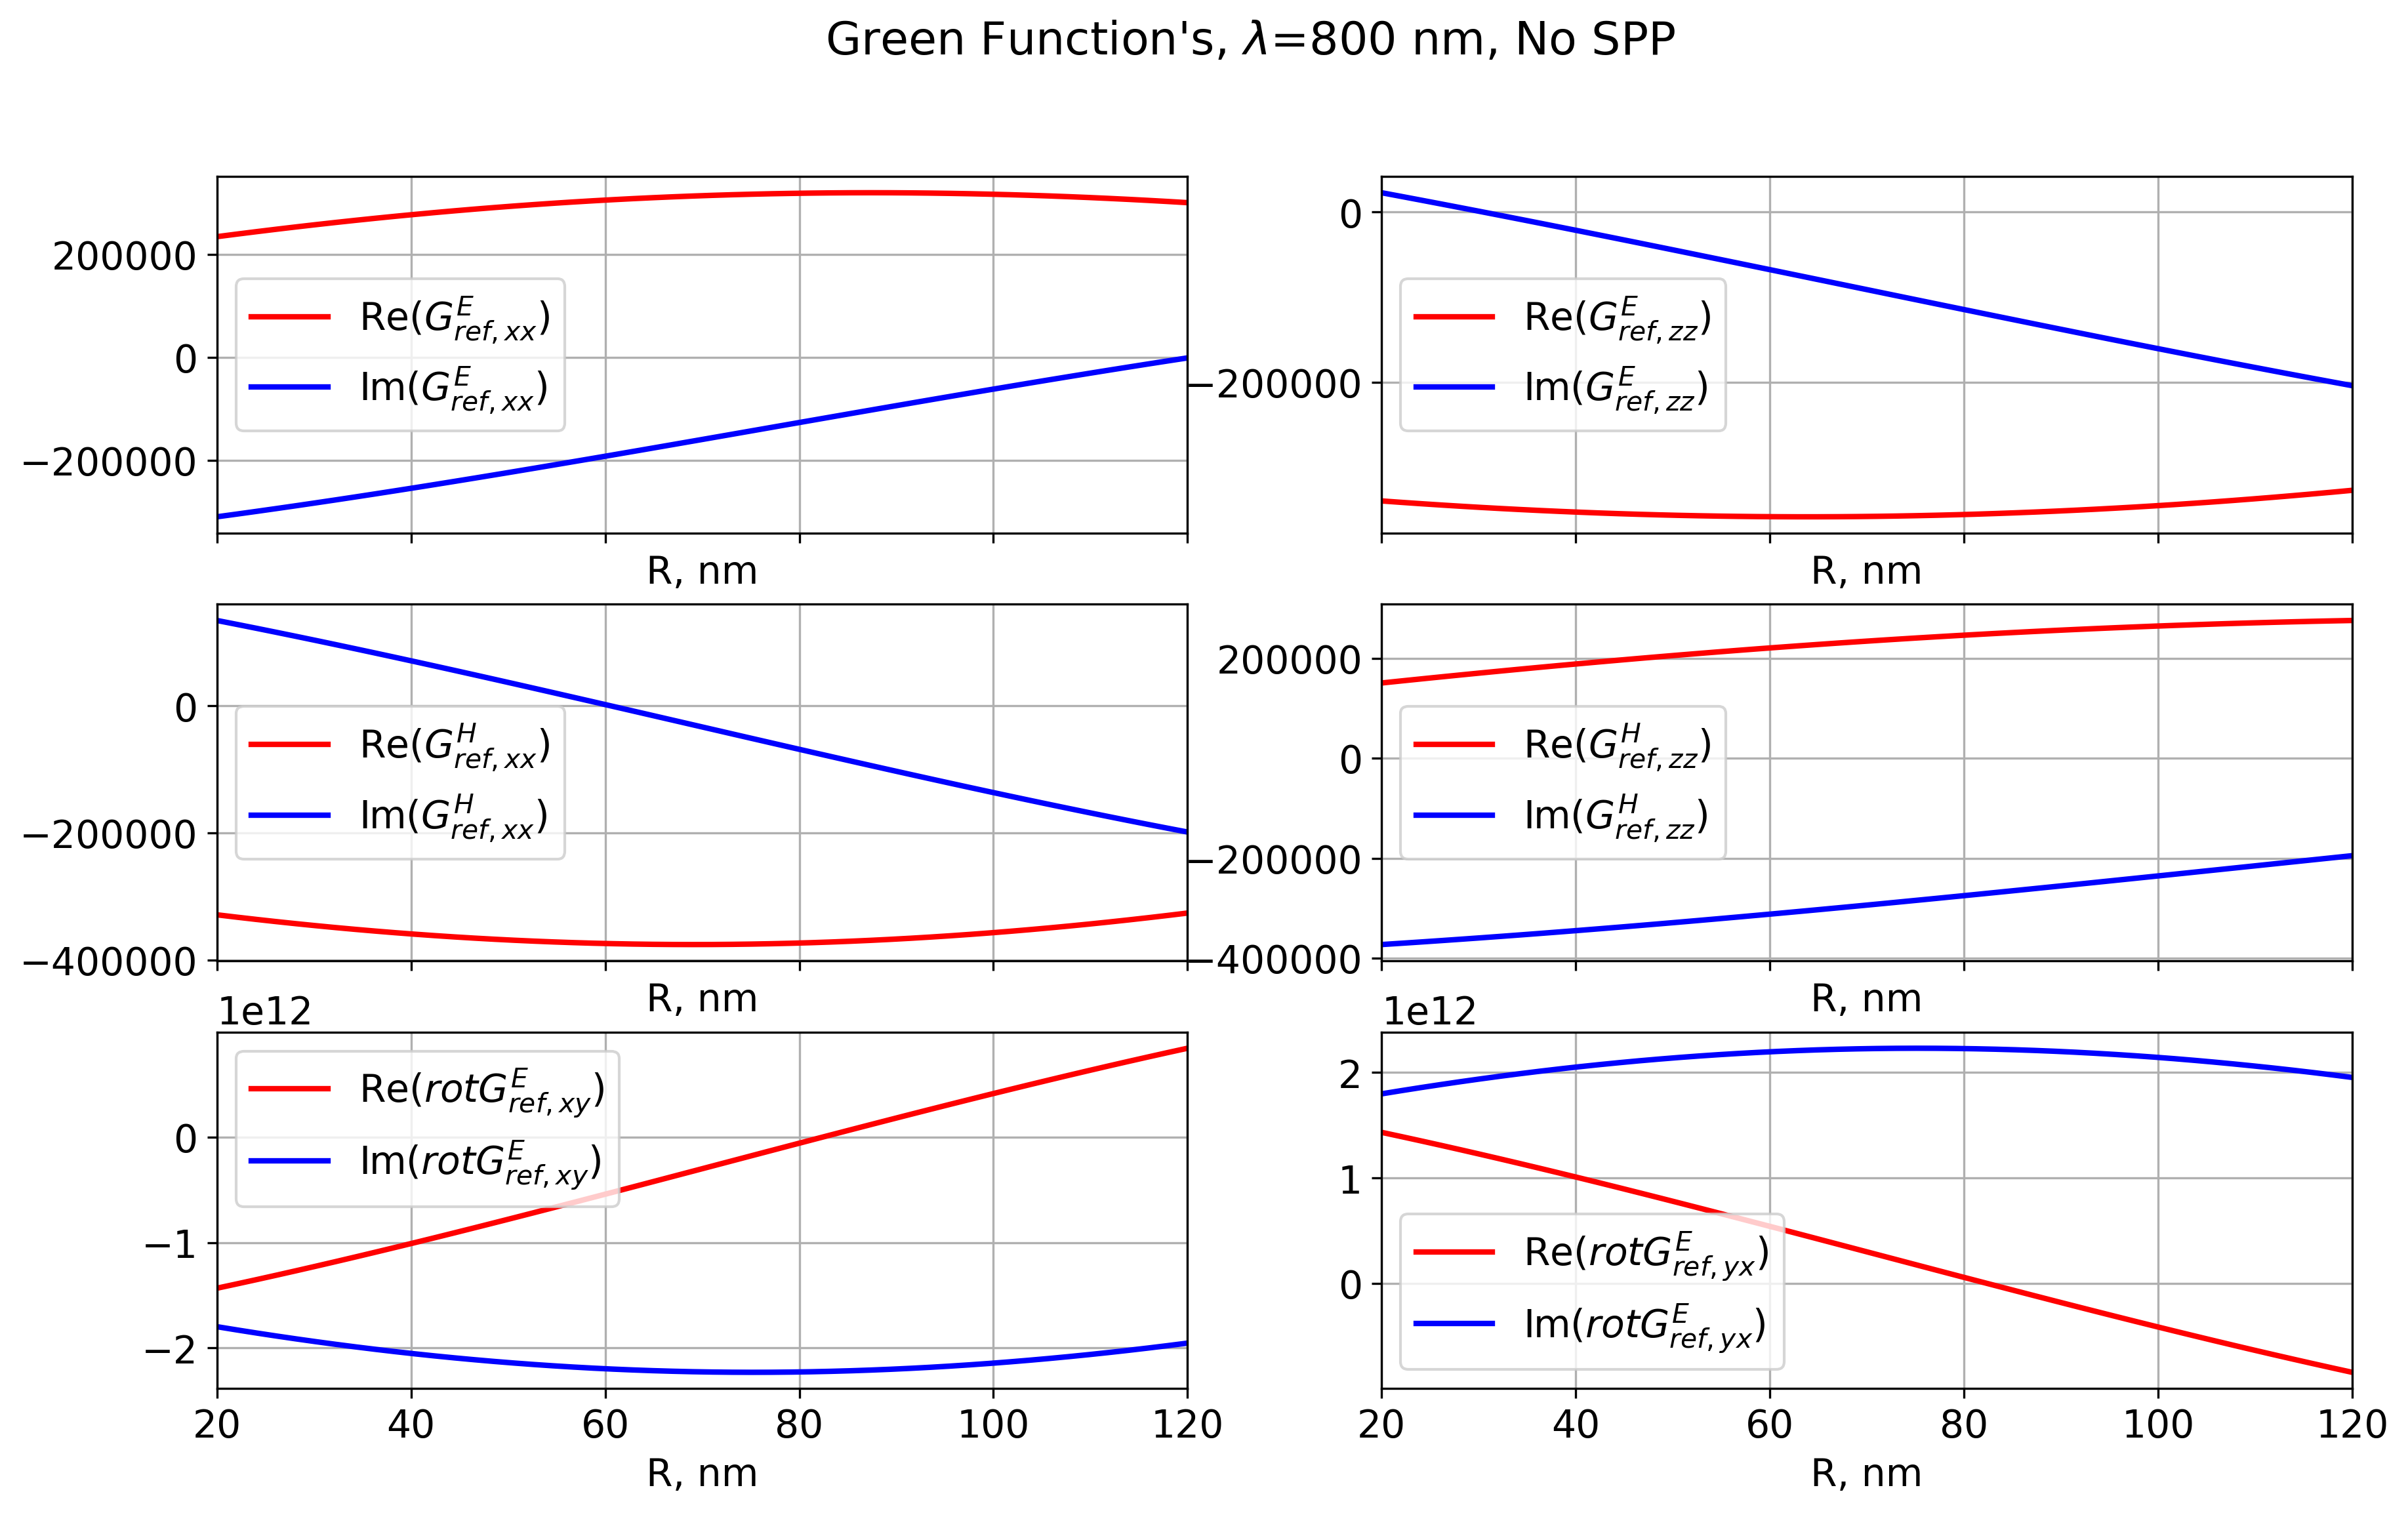

In [17]:
ncols = 2
nrows = 3

data =[[GrefE00, GrefE22], 
                 [GrefH00, GrefH22], 
                 [rotGrefE01, rotGrefE10]]

labels = [ ['$G_{ref,xx}^E$', '$G_{ref,zz}^E$'],
           ['$G_{ref,xx}^H$', '$G_{ref,zz}^H$'],
           ['$rotG_{ref,xy}^E$', '$rotG_{ref,yx}^E$']]

fig, axs = plt.subplots(nrows,ncols, figsize=(14,8), sharex=True, dpi=300)

fig.suptitle(f"Green Function's, $\\lambda$={wl} nm, No SPP")


for j in range(ncols):
    for i in range(nrows):
        axs[i,j].plot(R, np.real(data[i][j]), label='Re('+labels[i][j]+')', c='red', lw=2)
        axs[i,j].plot(R, np.imag(data[i][j]), label='Im('+labels[i][j]+')', c='blue', lw=2)
        axs[i,j].legend()
        axs[i,j].grid()
        axs[i,j].set_xlim(R[0], R[-1])
        axs[i,j].set_xlabel('R, nm')
        
plt.savefig('plots_new/Green_No_SPP.pdf', format="pdf", bbox_inches='tight')
plt.show()

# a = 0.25, 0.5, 0.75,  phase=0


In [3]:

eps_Au = frenel.get_interpolate('Au')
eps_Si = frenel.get_interpolate('Si')

wl=800
dist = 2
STOP=45
angle=25*np.pi/180
phase=0
a_angle = np.pi/4

R = np.linspace(50,120,60)
F_x = np.empty((len(R), 8))
F_y = np.empty_like(F_x)
F_z = np.empty_like(F_x)


for i in tqdm(range(len(R))):
    point = [0,0,dist+R[i]]
    f =  force.F(wl, eps_Au, point, R[i], eps_Si, angle,amplitude=1,phase=phase,a_angle=a_angle, stop=STOP, full_output=True)
    F_x[i,:] = f[0]
    F_y[i,:] = f[1]
    F_z[i,:] = f[2]

  0%|          | 0/60 [00:00<?, ?it/s]c:\Users\borod\Desktop\SPP_ANALYTICAL\SPP_ANALYTICAL\.venv\Lib\site-packages\scipy\integrate\_quadpack_py.py:441: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  re_retval = quad(refunc, a, b, args, full_output, epsabs,
100%|██████████| 60/60 [02:25<00:00,  2.43s/it]


In [4]:
STOP = 1

F_x_no_spp = np.empty((len(R), 8))
F_y_no_spp = np.empty_like(F_x)
F_z_no_spp = np.empty_like(F_x)


for i in tqdm(range(len(R))):
    point = [0,0,dist+R[i]]
    f =  force.F(wl, eps_Au, point, R[i], eps_Si, angle,amplitude=1,phase=phase,a_angle=a_angle, stop=STOP, full_output=True)
    F_x_no_spp[i,:] = f[0]
    F_y_no_spp[i,:] = f[1]
    F_z_no_spp[i,:] = f[2]

STOP = 45

100%|██████████| 60/60 [00:40<00:00,  1.49it/s]


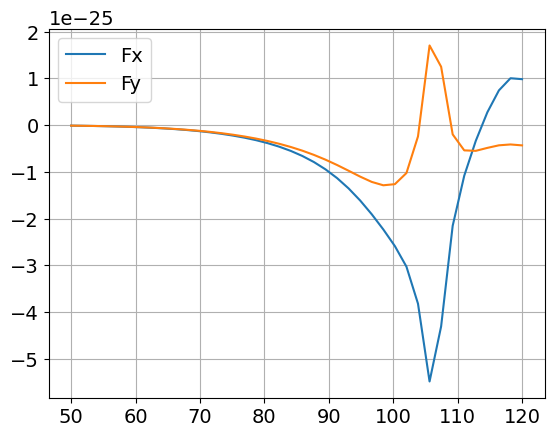

In [13]:
plt.plot(R, F_x[:,0] - F_x[:,1] - F_x[:,4], label='Fx')
plt.plot(R, F_y[:,0], label='Fy')
plt.grid()
plt.legend()
plt.show()

In [5]:
STOP = 45

F_x_air = np.empty((len(R), 8))
F_y_air = np.empty_like(F_x)
F_z_air = np.empty_like(F_x)


for i in tqdm(range(len(R))):
    point = [0,0,dist+R[i]]
    f =  force.F(wl, 1, point, R[i], eps_Si, 0,amplitude=1,phase=0,a_angle=0, stop=STOP, full_output=True)
    F_x_air[i,:] = f[0]
    F_y_air[i,:] = f[1]
    F_z_air[i,:] = f[2]


100%|██████████| 60/60 [00:01<00:00, 38.65it/s]


In [21]:
P,M = np.empty((len(R),3), dtype=complex),np.empty((len(R),3), dtype=complex)

for i in tqdm(range(len(R))):
    point = [0,0, dist+R[i]]
    p,m = dipoles.calc_dipoles_v2(wl, eps_Au, point, R[i], eps_Si, angle, amplitude=1, phase=phase, a_angle=a_angle, stop=STOP)
    p,m = p[:,0],m[:,0]
    P[i,:],M[i,:]=p,m

100%|██████████| 60/60 [00:00<00:00, 2999.72it/s]


In [46]:
dyrotGxz = np.zeros(len(R), dtype=complex)
dyrotGzx = np.zeros(len(R), dtype=complex)
dyrotGxzE = np.zeros(len(R), dtype=complex)
dyrotGzxE = np.zeros(len(R), dtype=complex)


for i in range(len(R)):
    point = [0,0, dist+R[i]]
    dyrotGE, dyrotGh=green_func.dy_rot_green_E_H(wl, point[2], eps_Au, 45)
    dyrotGxz[i] =dyrotGh[0,2]
    dyrotGzx[i] = dyrotGh[2,0]
    
    dyrotGxzE[i] =dyrotGE[0,2]
    dyrotGzxE[i] = dyrotGE[2,0]

c:\Users\borod\Desktop\SPP_ANALYTICAL\SPP_ANALYTICAL\.venv\Lib\site-packages\scipy\integrate\_quadpack_py.py:441: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  re_retval = quad(refunc, a, b, args, full_output, epsabs,


In [35]:
c_const = 299792458
eps0_const = 1/(4*np.pi*c_const**2)*1e7
mu0_const = 4*np.pi * 1e-7
k = 2*np.pi/wl/1e-9
omega = 2*np.pi*c_const/wl/1e-9

np.real(np.conj(P[:,0])*M[:,2])*np.imag(dyrotGxz)+k**4/12/np.pi/c_const * np.real(P[:,0]*np.conj(M[:,2]))

array([ 1.04565339e-38,  1.31521082e-38,  1.64694483e-38,  2.05375492e-38,
        2.55098350e-38,  3.15685133e-38,  3.89296975e-38,  4.78494354e-38,
        5.86308165e-38,  7.16323566e-38,  8.72779061e-38,  1.06068373e-37,
        1.28595612e-37,  1.55558912e-37,  1.87784583e-37,  2.26249282e-37,
        2.72107807e-37,  3.26726292e-37,  3.91721868e-37,  4.69010130e-37,
        5.60861983e-37,  6.69971744e-37,  7.99538752e-37,  9.53365095e-37,
        1.13597252e-36,  1.35274195e-36,  1.61007958e-36,  1.91561361e-36,
        2.27842612e-36,  2.70932465e-36,  3.22115815e-36,  3.82918304e-36,
        4.55148894e-36,  5.40950439e-36,  6.42863185e-36,  7.63913126e-36,
        9.07753109e-36,  1.07891968e-35,  1.28334328e-35,  1.52940510e-35,
        1.83015608e-35,  2.20798849e-35,  2.70450653e-35,  3.40155098e-35,
        4.46557268e-35,  6.22584385e-35,  9.10331882e-35,  1.14858516e-34,
        6.63916229e-35,  1.78183872e-36, -2.68680138e-35, -3.91022368e-35,
       -4.58498151e-35, -

In [54]:
F_y_m2 = omega*mu0_const/2 * np.imag( np.conj(M[:,0])*P[:,2] * dyrotGxzE +np.conj(M[:,2])*P[:,0]*dyrotGzxE )

<>:27: SyntaxWarning: invalid escape sequence '\d'
<>:27: SyntaxWarning: invalid escape sequence '\l'
<>:27: SyntaxWarning: invalid escape sequence '\d'
<>:27: SyntaxWarning: invalid escape sequence '\l'
C:\Users\borod\AppData\Local\Temp\ipykernel_8768\1997483230.py:27: SyntaxWarning: invalid escape sequence '\d'
  plt.title(f'$F_y$, a={round(a_angle*180/np.pi,2)} deg, $\delta \\varphi$ ={round(phase,2)}, $\lambda$={wl} nm')
C:\Users\borod\AppData\Local\Temp\ipykernel_8768\1997483230.py:27: SyntaxWarning: invalid escape sequence '\l'
  plt.title(f'$F_y$, a={round(a_angle*180/np.pi,2)} deg, $\delta \\varphi$ ={round(phase,2)}, $\lambda$={wl} nm')


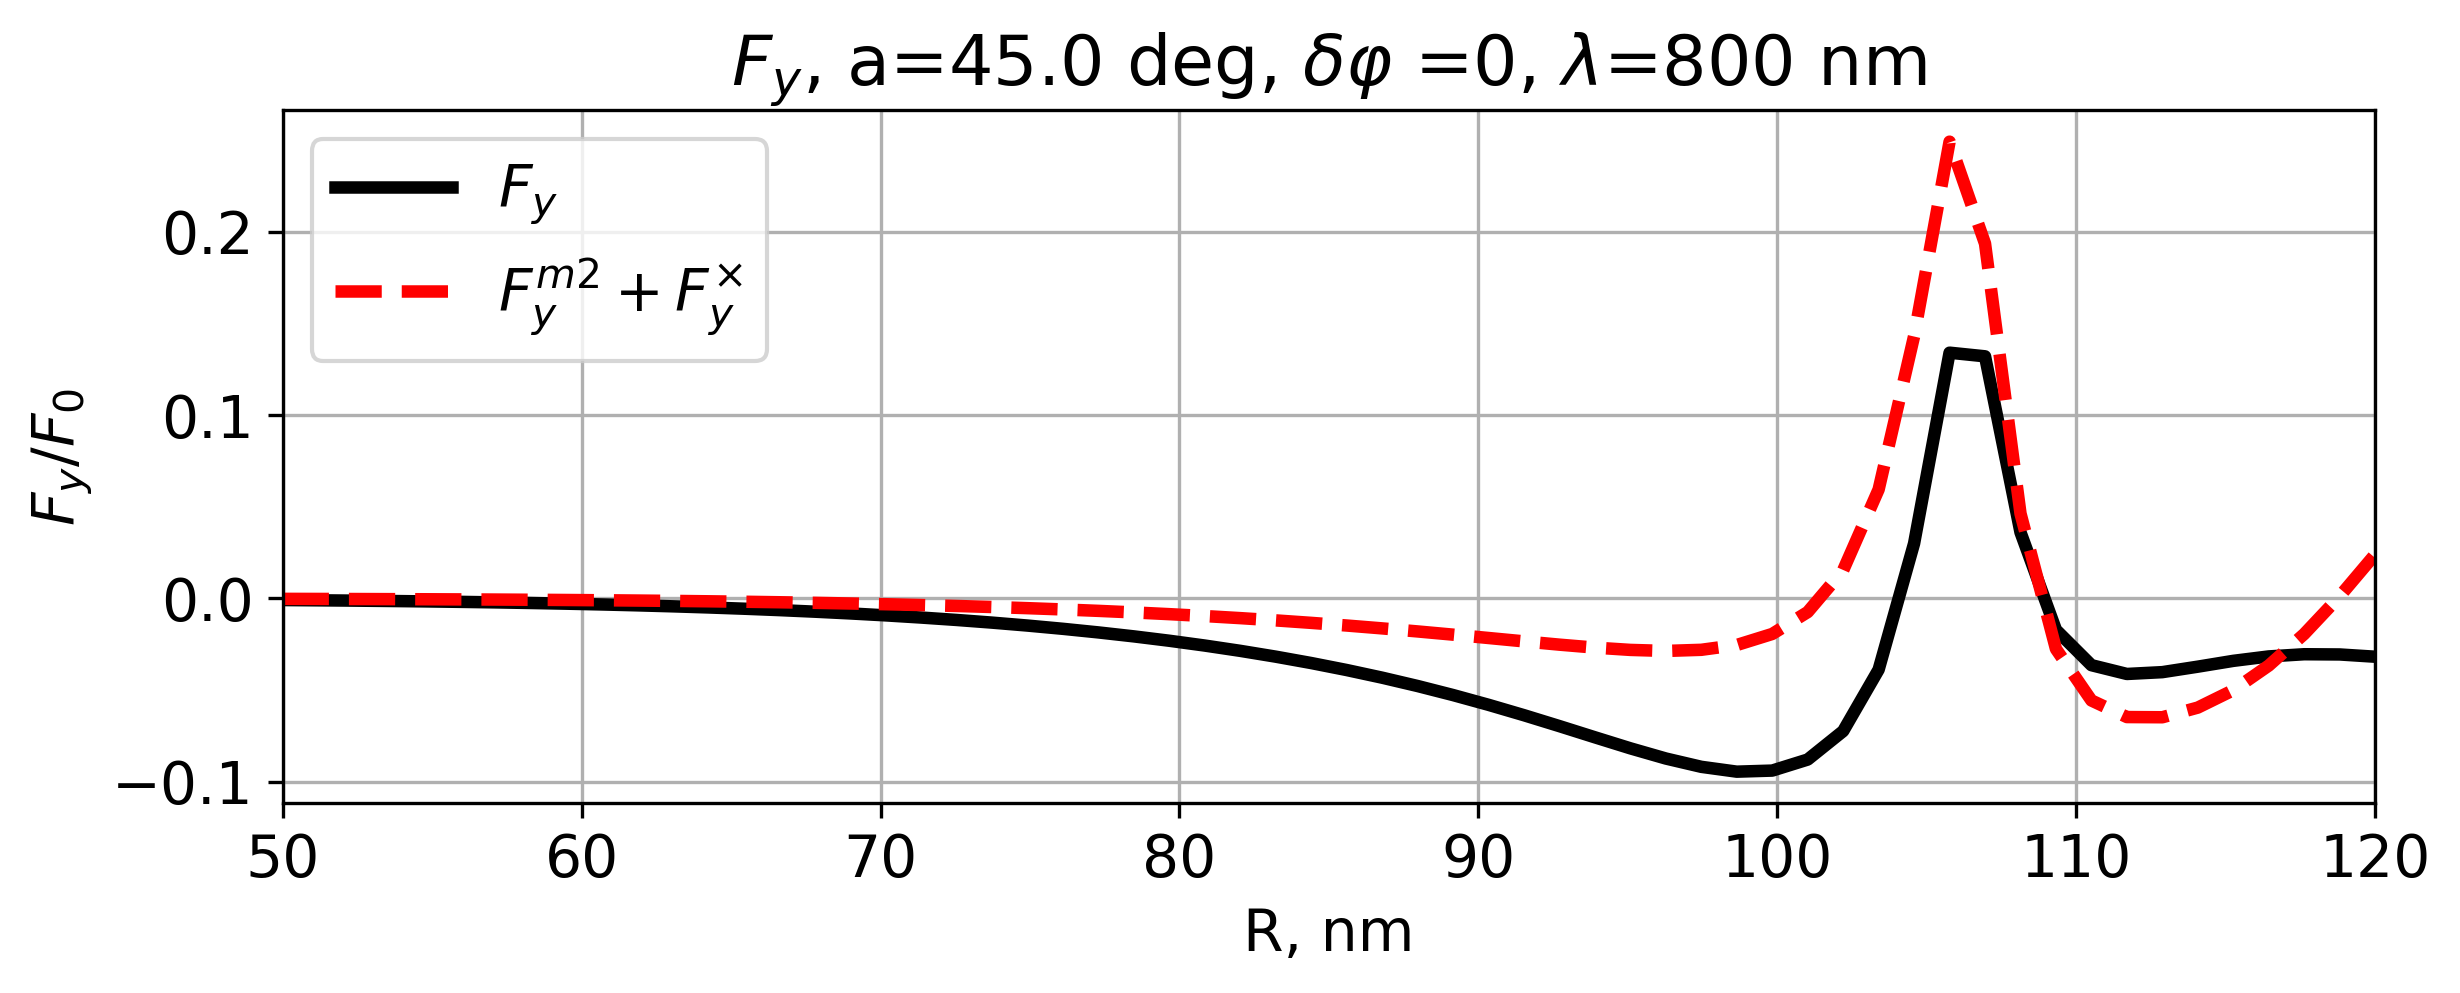

In [63]:
labels = ['$F_y$', '$F_y^{e0}$', '$F_y^{e1}$', '$F_y^{e2}$', '$F_y^{m0}$', '$F_y^{m1}$', '$F_y^{m2}$', '$F_y^{\\times}$']

c = ['black', 'b', 'b', 'b', 'red', 'red', 'red', 'g']

c_const = 299792458
eps0_const = 1/(4*np.pi*c_const**2)*1e7
mu0_const = 4*np.pi * 1e-7
k = 2*np.pi/wl/1e-9
omega = 2*np.pi*c_const/wl/1e-9

selected_components = [0, 2,3,5,6,7]  # Choose from 0 to 7

# Plot all selected components
plt.figure(figsize=(9, 3), dpi=300)


# for i, comp in enumerate(selected_components):
#     plt.plot(R, F_y[:, comp], label=labels[comp], lw=3, c=c[comp])
    
plt.plot(R, F_y[:, 0]/np.max(np.abs(F_z_air[:,0])), label=labels[0], lw=3, c=c[0])

plt.plot(R, (F_y_m2 + k**4/12/np.pi/c_const/eps0_const * np.real(P[:,0]*np.conj(M[:,2])  - np.conj(M[:,0])*P[:,2]))/np.max(np.abs(F_z_air[:,0])), label='$F_y^{m2} + F_y^{\\times}$', lw=3, c='r', ls='--')
    

plt.xlabel('R, nm')
plt.ylabel('$F_y / F_0$')
plt.title(f'$F_y$, a={round(a_angle*180/np.pi,2)} deg, $\delta \\varphi$ ={round(phase,2)}, $\lambda$={wl} nm')
plt.legend(loc="upper left")
plt.grid()
plt.xlim(R[0], R[-1])
# plt.savefig(f'Fy_a_{round(a_angle,2)}_phase_{round(phase,2)}_from_R_comp33.pdf')
plt.show()

<>:28: SyntaxWarning: invalid escape sequence '\d'
<>:28: SyntaxWarning: invalid escape sequence '\l'
<>:28: SyntaxWarning: invalid escape sequence '\d'
<>:28: SyntaxWarning: invalid escape sequence '\l'
C:\Users\borod\AppData\Local\Temp\ipykernel_8768\3992469734.py:28: SyntaxWarning: invalid escape sequence '\d'
  plt.title(f'$F_y$, a={round(a_angle*180/np.pi,2)} deg, $\delta \\varphi$ ={round(phase,2)}, $\lambda$={wl} nm')
C:\Users\borod\AppData\Local\Temp\ipykernel_8768\3992469734.py:28: SyntaxWarning: invalid escape sequence '\l'
  plt.title(f'$F_y$, a={round(a_angle*180/np.pi,2)} deg, $\delta \\varphi$ ={round(phase,2)}, $\lambda$={wl} nm')


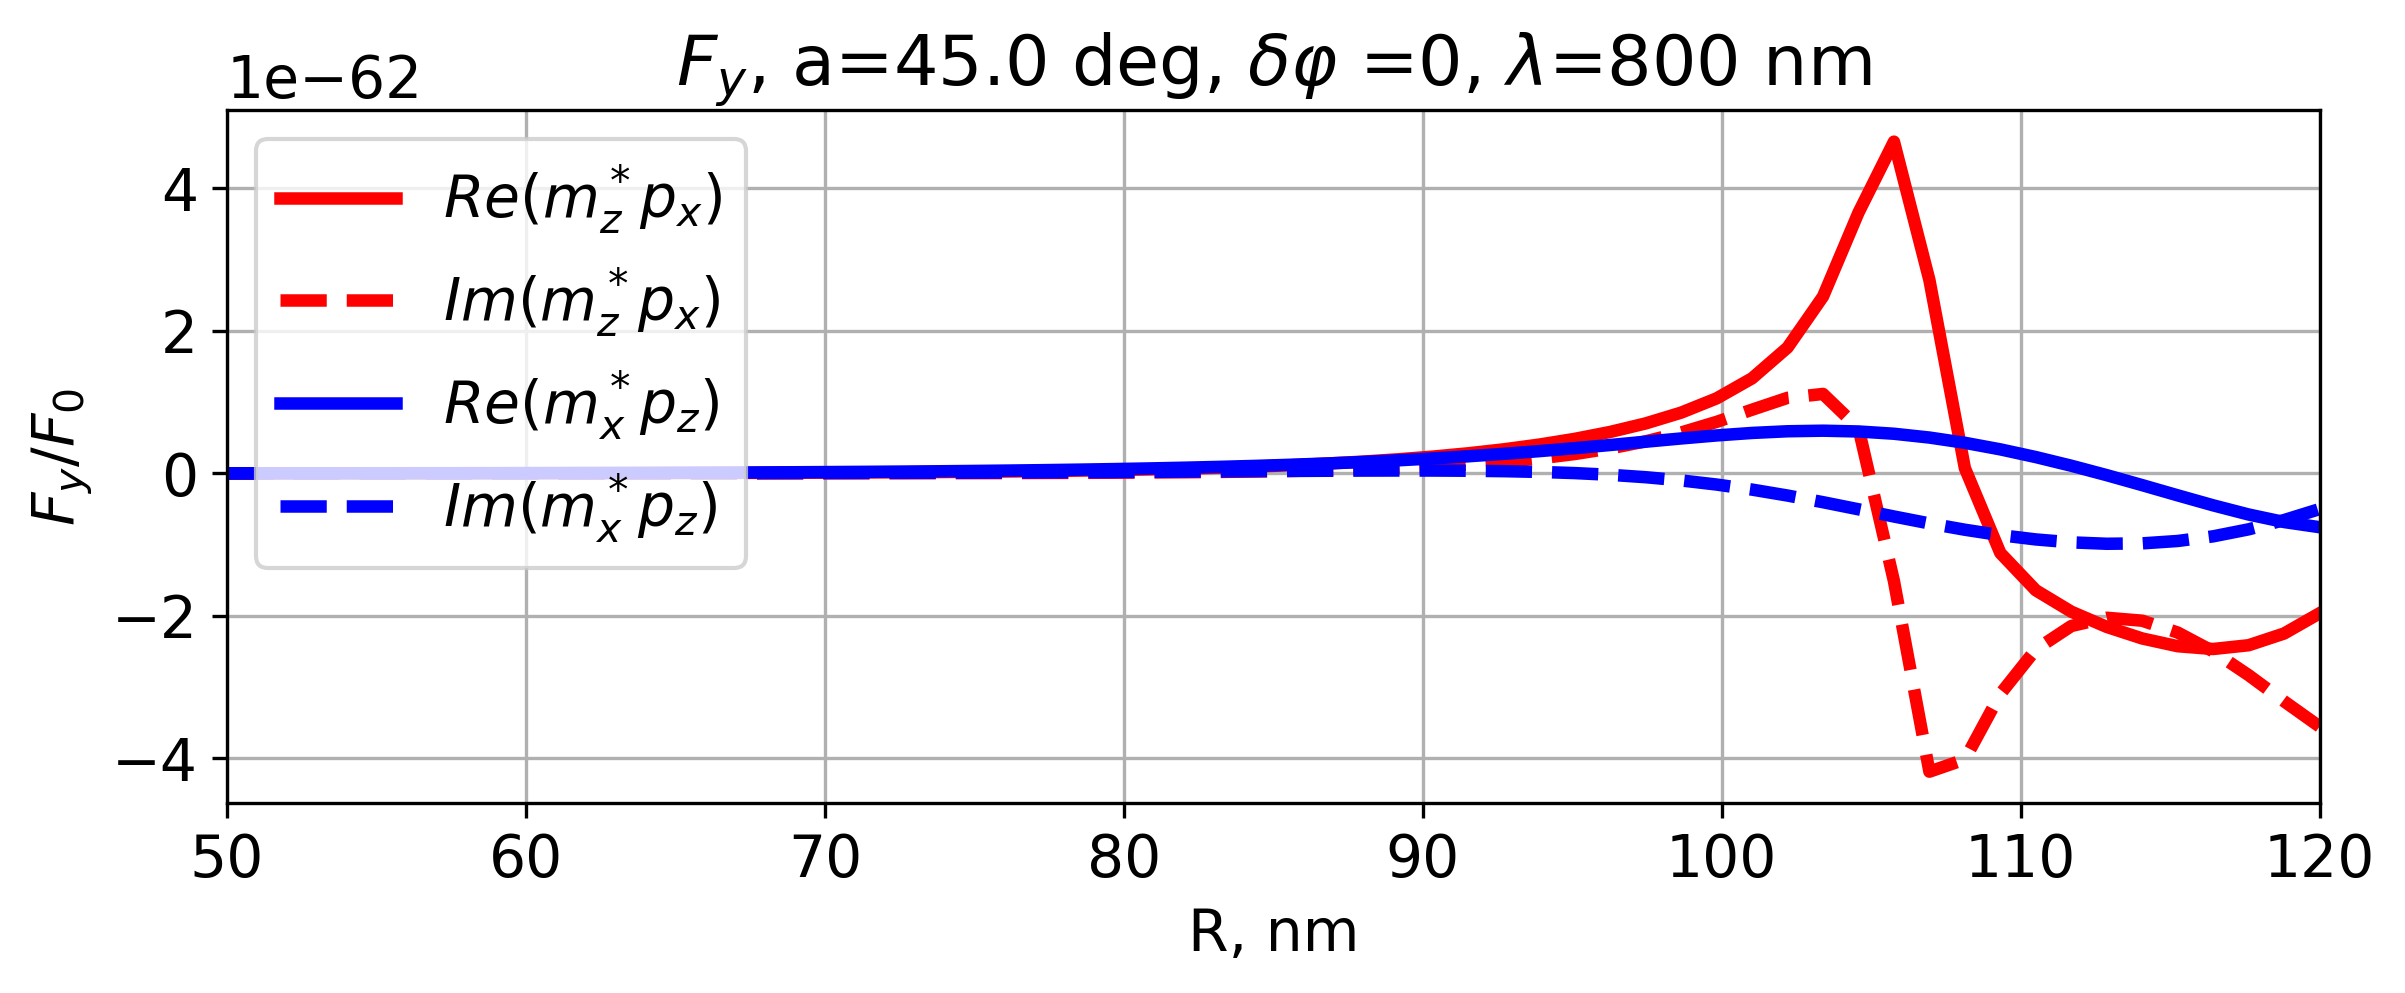

In [69]:
labels = ['$F_y$', '$F_y^{e0}$', '$F_y^{e1}$', '$F_y^{e2}$', '$F_y^{m0}$', '$F_y^{m1}$', '$F_y^{m2}$', '$F_y^{\\times}$']

c = ['black', 'b', 'b', 'b', 'red', 'red', 'red', 'g']

c_const = 299792458
eps0_const = 1/(4*np.pi*c_const**2)*1e7
mu0_const = 4*np.pi * 1e-7
k = 2*np.pi/wl/1e-9
omega = 2*np.pi*c_const/wl/1e-9

selected_components = [0, 2,3,5,6,7]  # Choose from 0 to 7

# Plot all selected components
plt.figure(figsize=(9, 3), dpi=300)


# for i, comp in enumerate(selected_components):
#     plt.plot(R, F_y[:, comp], label=labels[comp], lw=3, c=c[comp])
    
plt.plot(R, np.real(np.conj(M[:,2])*P[:,0])/c_const, label='$Re(m_z^* p_x)$', lw=3, c='r')
plt.plot(R, np.imag(np.conj(M[:,2])*P[:,0])/c_const, label='$Im(m_z^* p_x)$', lw=3, c='r', ls='--')
plt.plot(R, np.real(np.conj(M[:,0])*P[:,2])/c_const, label='$Re(m_x^* p_z)$', lw=3, c='b')
plt.plot(R, np.imag(np.conj(M[:,0])*P[:,2])/c_const, label='$Im(m_x^* p_z)$', lw=3, c='b', ls='--')


plt.xlabel('R, nm')
plt.ylabel('$F_y / F_0$')
plt.title(f'$F_y$, a={round(a_angle*180/np.pi,2)} deg, $\delta \\varphi$ ={round(phase,2)}, $\lambda$={wl} nm')
plt.legend(loc="upper left")
plt.grid()
plt.xlim(R[0], R[-1])
# plt.savefig(f'Fy_a_{round(a_angle,2)}_phase_{round(phase,2)}_from_R_comp33.pdf')
plt.show()

<>:24: SyntaxWarning: invalid escape sequence '\d'
<>:24: SyntaxWarning: invalid escape sequence '\l'
<>:24: SyntaxWarning: invalid escape sequence '\d'
<>:24: SyntaxWarning: invalid escape sequence '\l'
C:\Users\borod\AppData\Local\Temp\ipykernel_8768\3556369832.py:24: SyntaxWarning: invalid escape sequence '\d'
  plt.title(f'$F_y$, a={round(a_angle*180/np.pi,2)} deg, $\delta \\varphi$ ={round(phase,2)}, $\lambda$={wl} nm')
C:\Users\borod\AppData\Local\Temp\ipykernel_8768\3556369832.py:24: SyntaxWarning: invalid escape sequence '\l'
  plt.title(f'$F_y$, a={round(a_angle*180/np.pi,2)} deg, $\delta \\varphi$ ={round(phase,2)}, $\lambda$={wl} nm')


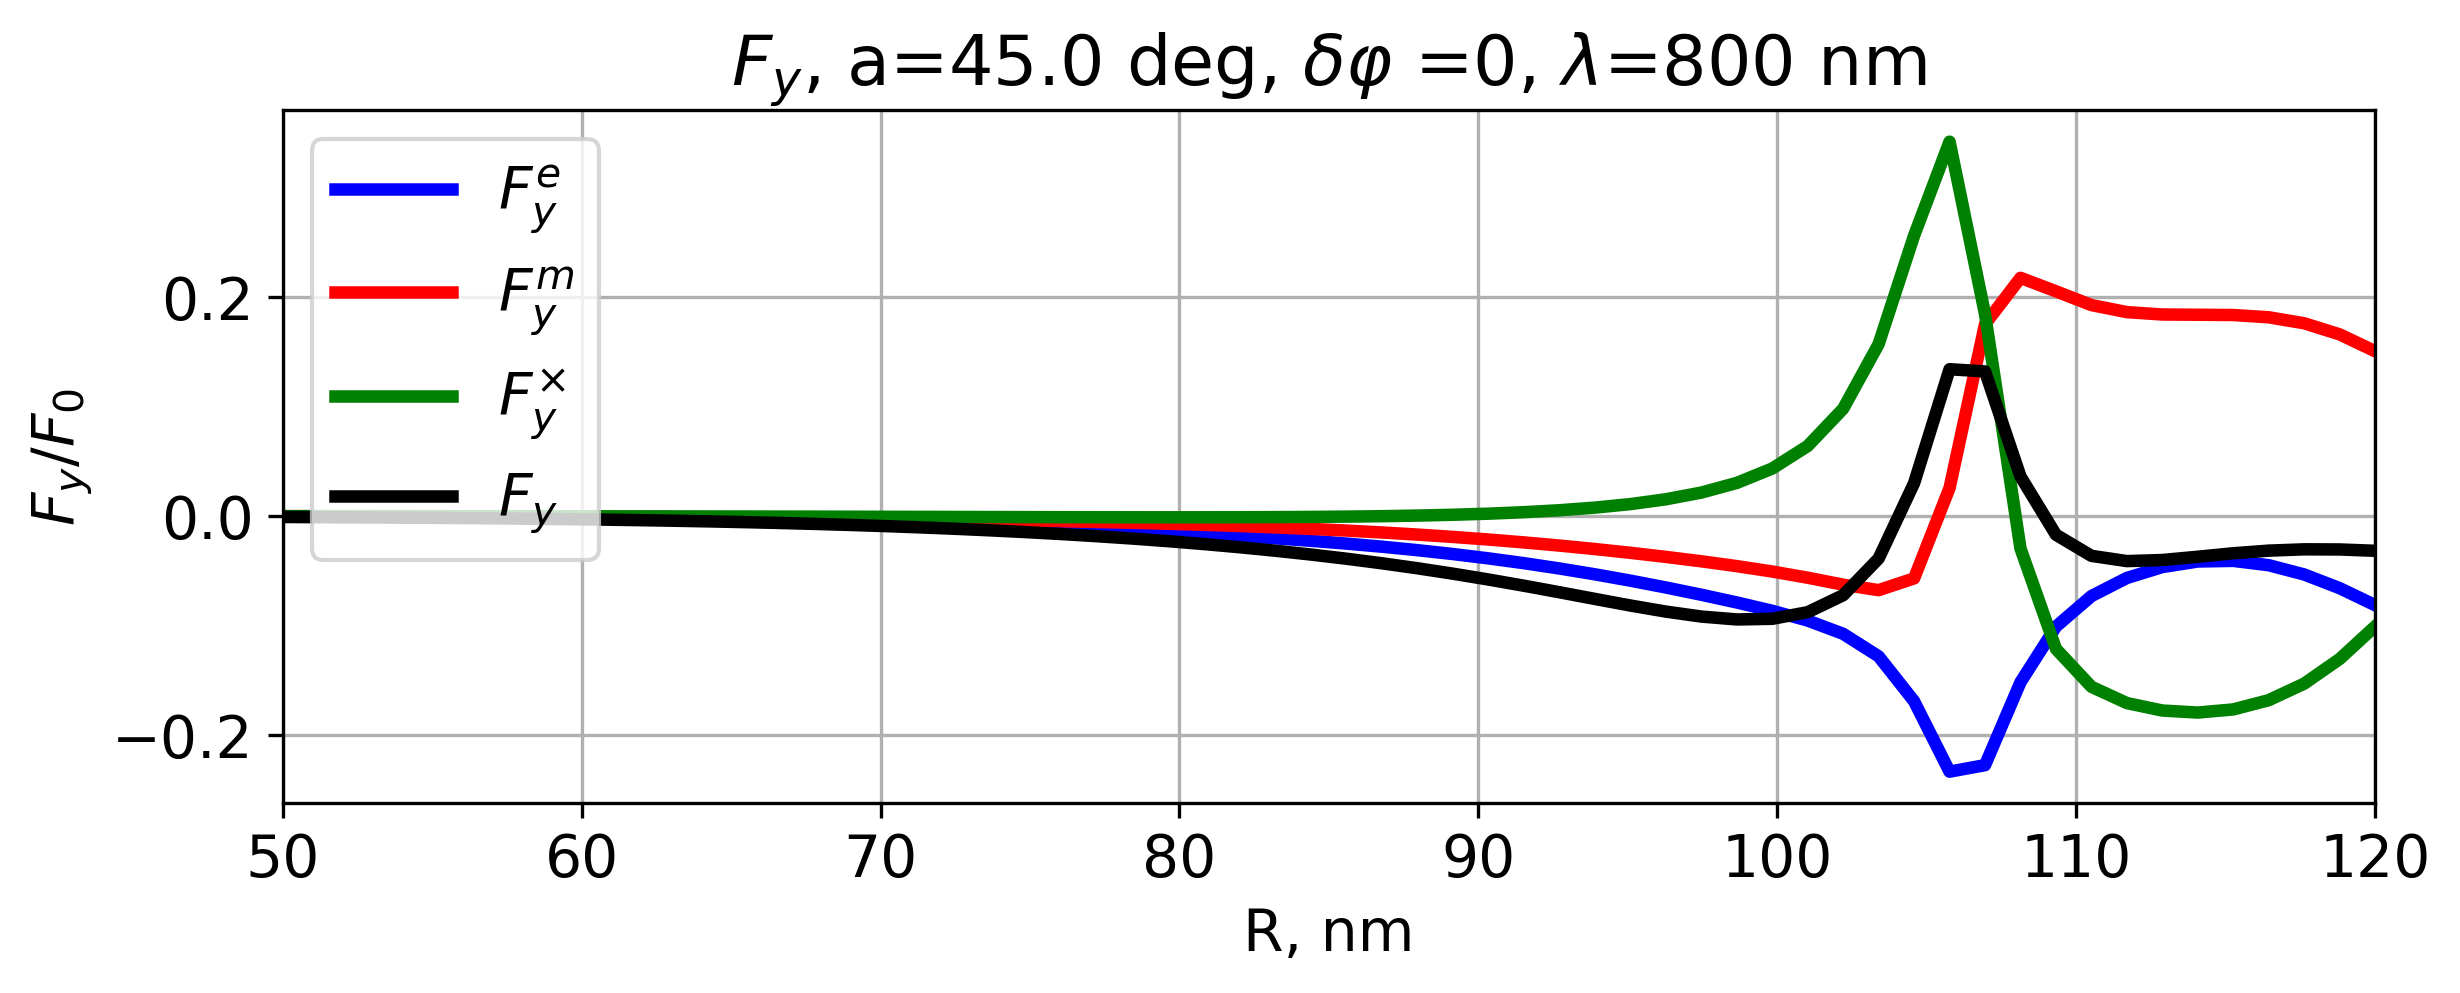

In [ ]:
labels = ['$F_y$', '$F_y^{e0}$', '$F_y^{e1}$', '$F_y^{e2}$', '$F_y^{m0}$', '$F_y^{m1}$', '$F_y^{m2}$', '$F_y^{\\times}$']

c = ['black', 'b', 'b', 'b', 'red', 'red', 'red', 'g']

selected_components = [2,5,7]  # Choose from 0 to 7

# Plot all selected components
plt.figure(figsize=(9, 3), dpi=300)


# for i, comp in enumerate(selected_components):
#     plt.plot(R, F_y[:, comp], label=labels[comp], lw=3, c=c[comp])
    
plt.plot(R, (F_y[:, 2]+F_y[:,3])/np.max(np.abs(F_z_air[:,0])), label='$F_y^e$', lw=3, c='b')

plt.plot(R, (F_y[:, 5]+F_y[:,6])/np.max(np.abs(F_z_air[:,0])), label='$F_y^m$', lw=3, c='r')

plt.plot(R, F_y[:, 7]/np.max(np.abs(F_z_air[:,0])), label='$F_y^{\\times}$', lw=3, c='g')

plt.plot(R, F_y[:, 0]/np.max(np.abs(F_z_air[:,0])), label='$F_y$', lw=3, c='black')

plt.xlabel('R, nm')
plt.ylabel('$F_y / F_0$')
plt.title(f'$F_y$, a={round(a_angle*180/np.pi,2)} deg, $\delta \\varphi$ ={round(phase,2)}, $\lambda$={wl} nm')
plt.legend(loc="upper left")
plt.grid()
plt.xlim(R[0], R[-1])
plt.savefig(f'Fy_a_{round(a_angle,2)}_phase_{round(phase,2)}_from_R_comp_2.pdf')
plt.show()

<>:16: SyntaxWarning: invalid escape sequence '\d'
<>:16: SyntaxWarning: invalid escape sequence '\l'
<>:26: SyntaxWarning: invalid escape sequence '\d'
<>:26: SyntaxWarning: invalid escape sequence '\l'
<>:16: SyntaxWarning: invalid escape sequence '\d'
<>:16: SyntaxWarning: invalid escape sequence '\l'
<>:26: SyntaxWarning: invalid escape sequence '\d'
<>:26: SyntaxWarning: invalid escape sequence '\l'
C:\Users\borod\AppData\Local\Temp\ipykernel_8768\1508557859.py:16: SyntaxWarning: invalid escape sequence '\d'
  plt.suptitle(f'$F$, a={round(a_angle*180/np.pi,2)} deg, $\delta \\varphi$ ={round(phase,2)}, $\lambda$={wl} nm')
C:\Users\borod\AppData\Local\Temp\ipykernel_8768\1508557859.py:16: SyntaxWarning: invalid escape sequence '\l'
  plt.suptitle(f'$F$, a={round(a_angle*180/np.pi,2)} deg, $\delta \\varphi$ ={round(phase,2)}, $\lambda$={wl} nm')
C:\Users\borod\AppData\Local\Temp\ipykernel_8768\1508557859.py:26: SyntaxWarning: invalid escape sequence '\d'
  plt.suptitle(f'$F$, a={roun

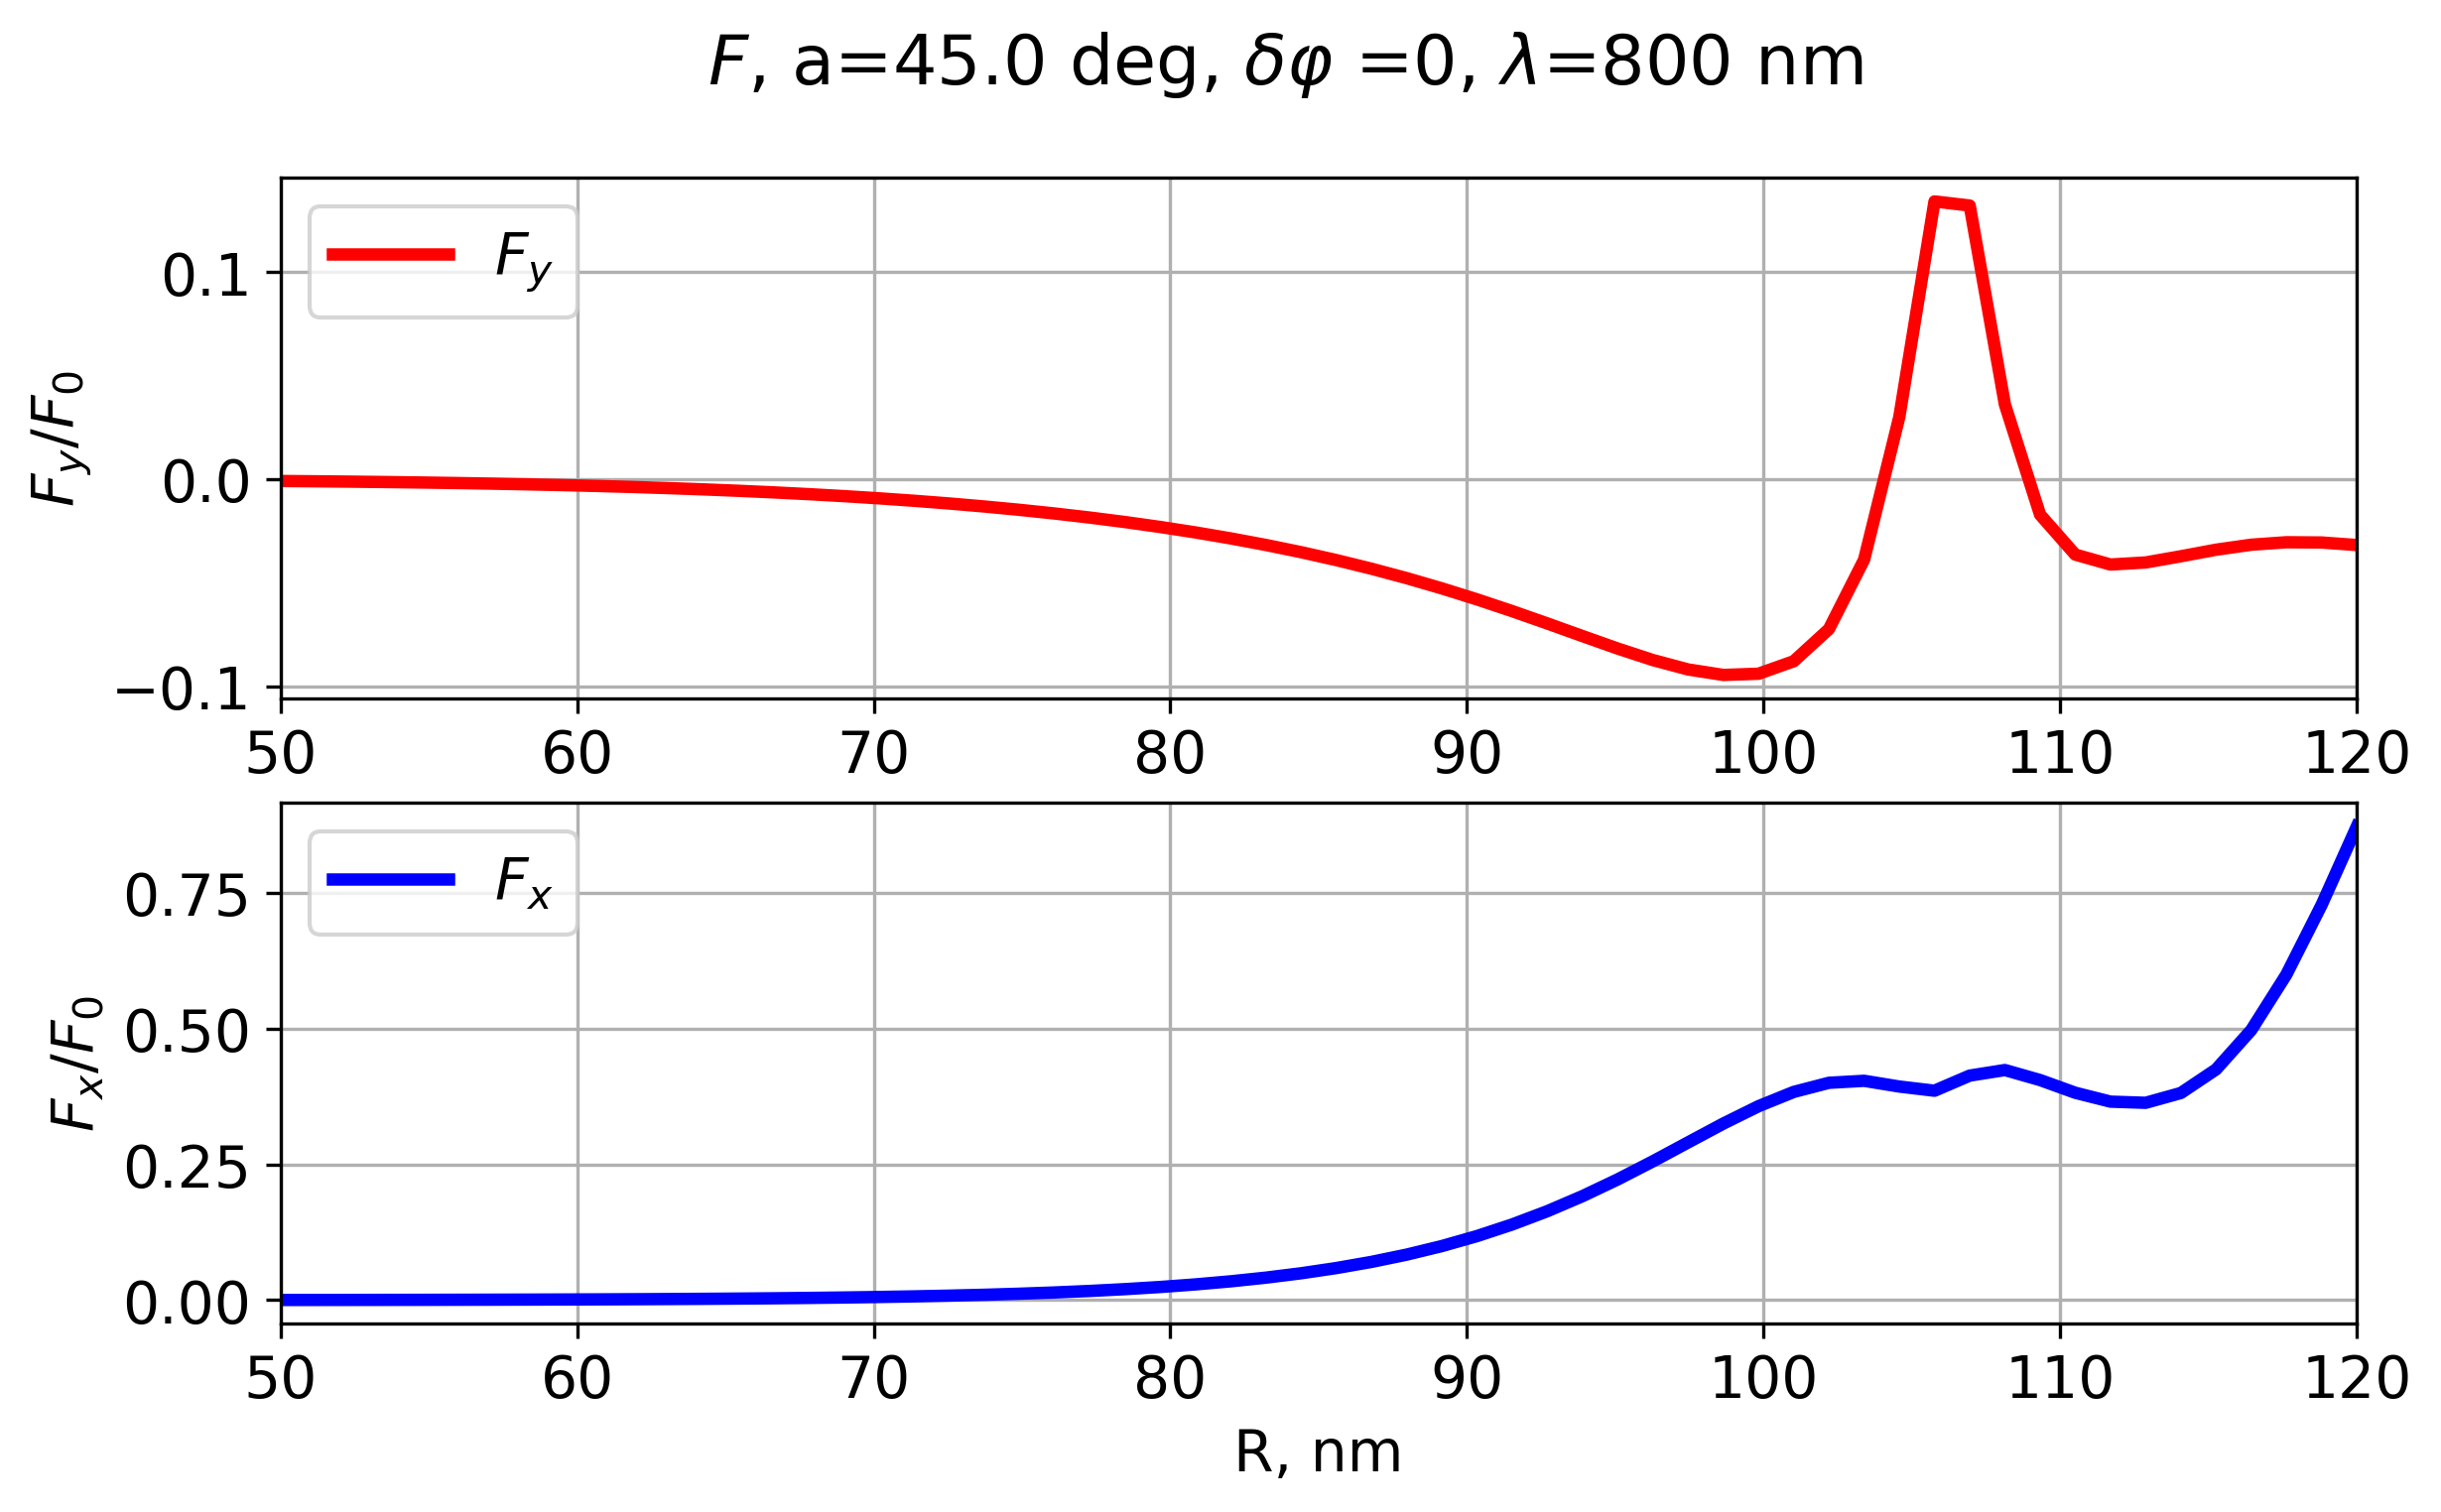

In [81]:
labels = ['$F_y$', '$F_y^{e0}$', '$F_y^{e1}$', '$F_y^{e2}$', '$F_y^{m0}$', '$F_y^{m1}$', '$F_y^{m2}$', '$F_y^{\\times}$']

c = ['black', 'b', 'b', 'b', 'red', 'red', 'red', 'g']

selected_components = [2,5,7]  # Choose from 0 to 7

# Plot all selected components
plt.figure(figsize=(9, 5), dpi=300)


plt.subplot(2,1,1)

plt.plot(R, F_y[:, 0]/np.max(np.abs(F_z_air[:,0])), label='$F_y$', lw=3, c='r')
plt.xlabel('R, nm')
plt.ylabel('$F_y / F_0$')
plt.suptitle(f'$F$, a={round(a_angle*180/np.pi,2)} deg, $\delta \\varphi$ ={round(phase,2)}, $\lambda$={wl} nm')
plt.legend(loc="upper left")
plt.grid()
plt.xlim(R[0], R[-1])

plt.subplot(2,1,2)
plt.plot(R, (F_x[:, 0])/np.max(np.abs(F_z_air[:,0])), label='$F_x$', lw=3, c='b')

plt.xlabel('R, nm')
plt.ylabel('$F_x / F_0$')
plt.suptitle(f'$F$, a={round(a_angle*180/np.pi,2)} deg, $\delta \\varphi$ ={round(phase,2)}, $\lambda$={wl} nm')
plt.legend(loc="upper left")
plt.grid()
plt.xlim(R[0], R[-1])
#plt.savefig(f'Fy_a_{round(a_angle,2)}_phase_{round(phase,2)}_from_R_comp_2.pdf')
plt.show()

<>:22: SyntaxWarning: invalid escape sequence '\d'
<>:22: SyntaxWarning: invalid escape sequence '\l'
<>:22: SyntaxWarning: invalid escape sequence '\d'
<>:22: SyntaxWarning: invalid escape sequence '\l'
C:\Users\borod\AppData\Local\Temp\ipykernel_8768\657016291.py:22: SyntaxWarning: invalid escape sequence '\d'
  plt.title(f'$F_x$, a={round(a_angle*180/np.pi,2)} deg, $\delta \\varphi$ ={round(phase,2)}, $\lambda$={wl} nm')
C:\Users\borod\AppData\Local\Temp\ipykernel_8768\657016291.py:22: SyntaxWarning: invalid escape sequence '\l'
  plt.title(f'$F_x$, a={round(a_angle*180/np.pi,2)} deg, $\delta \\varphi$ ={round(phase,2)}, $\lambda$={wl} nm')


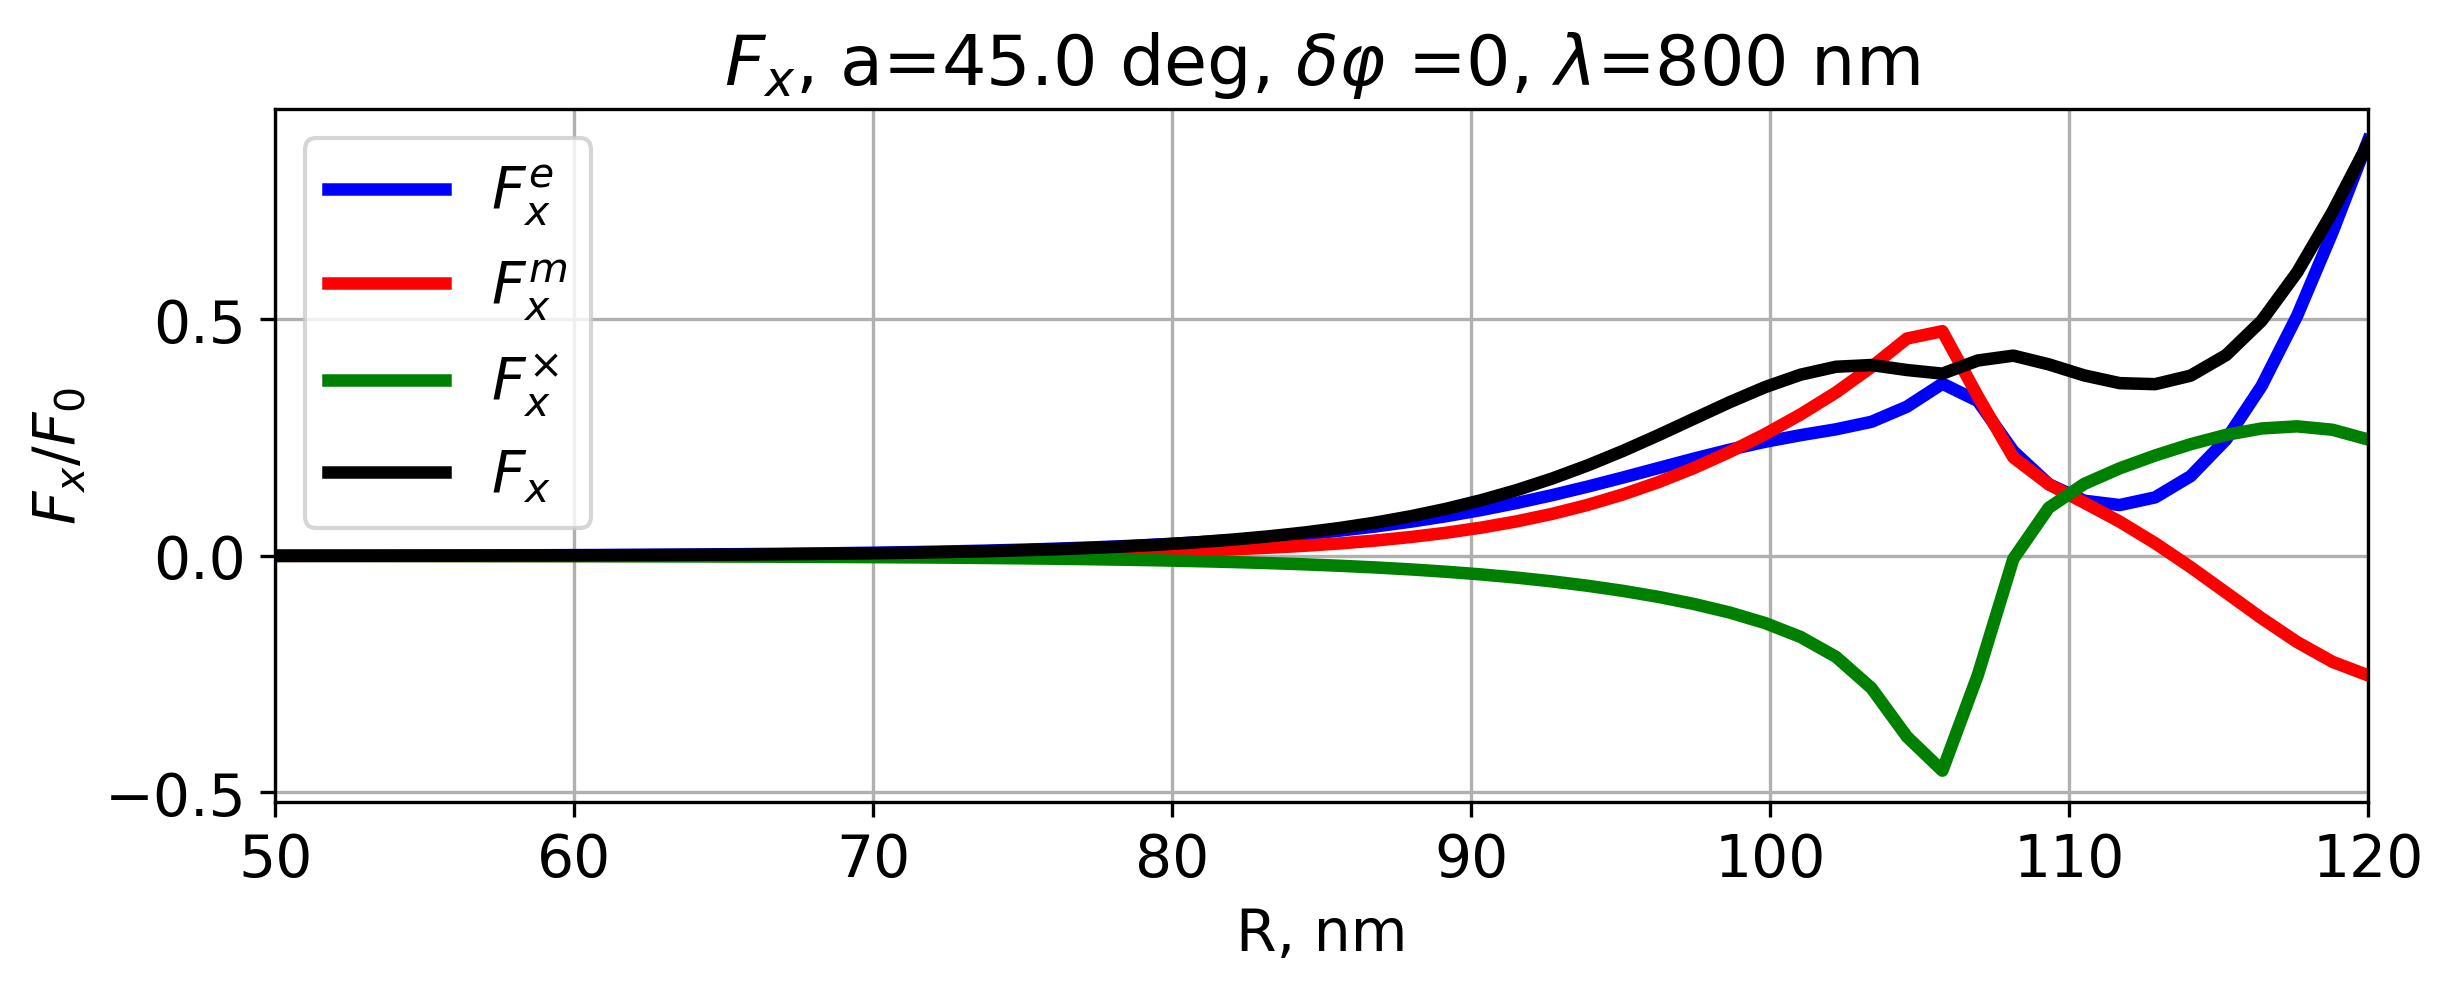

In [7]:
labels = ['$F_x$', '$F_x^{e0}$', '$F_x^{e1}$', '$F_x^{e2}$', '$F_x^{m0}$', '$F_x^{m1}$', '$F_x^{m2}$', '$F_x^{\\times}$']

c = ['black', 'b', 'b', 'b', 'red', 'red', 'red', 'g']

selected_components = [2,5,7]  # Choose from 0 to 7

# Plot all selected components
plt.figure(figsize=(9, 3), dpi=300)


    
plt.plot(R, (F_x[:,1]+F_x[:, 2]+F_x[:,3])/np.max(np.abs(F_z_air[:,0])), label='$F_x^e$', lw=3, c='b')

plt.plot(R, (F_x[:,4]+F_x[:, 5]+F_x[:,6])/np.max(np.abs(F_z_air[:,0])), label='$F_x^m$', lw=3, c='r')

plt.plot(R, F_x[:, 7]/np.max(np.abs(F_z_air[:,0])), label='$F_x^{\\times}$', lw=3, c='g')

plt.plot(R, F_x[:, 0]/np.max(np.abs(F_z_air[:,0])), label='$F_x$', lw=3, c='black')

plt.xlabel('R, nm')
plt.ylabel('$F_x/F_0$')
plt.title(f'$F_x$, a={round(a_angle*180/np.pi,2)} deg, $\delta \\varphi$ ={round(phase,2)}, $\lambda$={wl} nm')
plt.legend(loc="upper left")
plt.grid()
plt.xlim(R[0], R[-1])
plt.savefig(f'Fx_a_{round(a_angle,2)}_phase_{round(phase,2)}_from_R_comp_3.pdf')
plt.show()

<>:22: SyntaxWarning: invalid escape sequence '\d'
<>:22: SyntaxWarning: invalid escape sequence '\l'
<>:22: SyntaxWarning: invalid escape sequence '\d'
<>:22: SyntaxWarning: invalid escape sequence '\l'
C:\Users\borod\AppData\Local\Temp\ipykernel_25816\2747722003.py:22: SyntaxWarning: invalid escape sequence '\d'
  plt.title(f'$F_z$, a={round(a_angle*180/np.pi,2)} deg, $\delta \\varphi$ ={round(phase,2)}, $\lambda$={wl} nm')
C:\Users\borod\AppData\Local\Temp\ipykernel_25816\2747722003.py:22: SyntaxWarning: invalid escape sequence '\l'
  plt.title(f'$F_z$, a={round(a_angle*180/np.pi,2)} deg, $\delta \\varphi$ ={round(phase,2)}, $\lambda$={wl} nm')


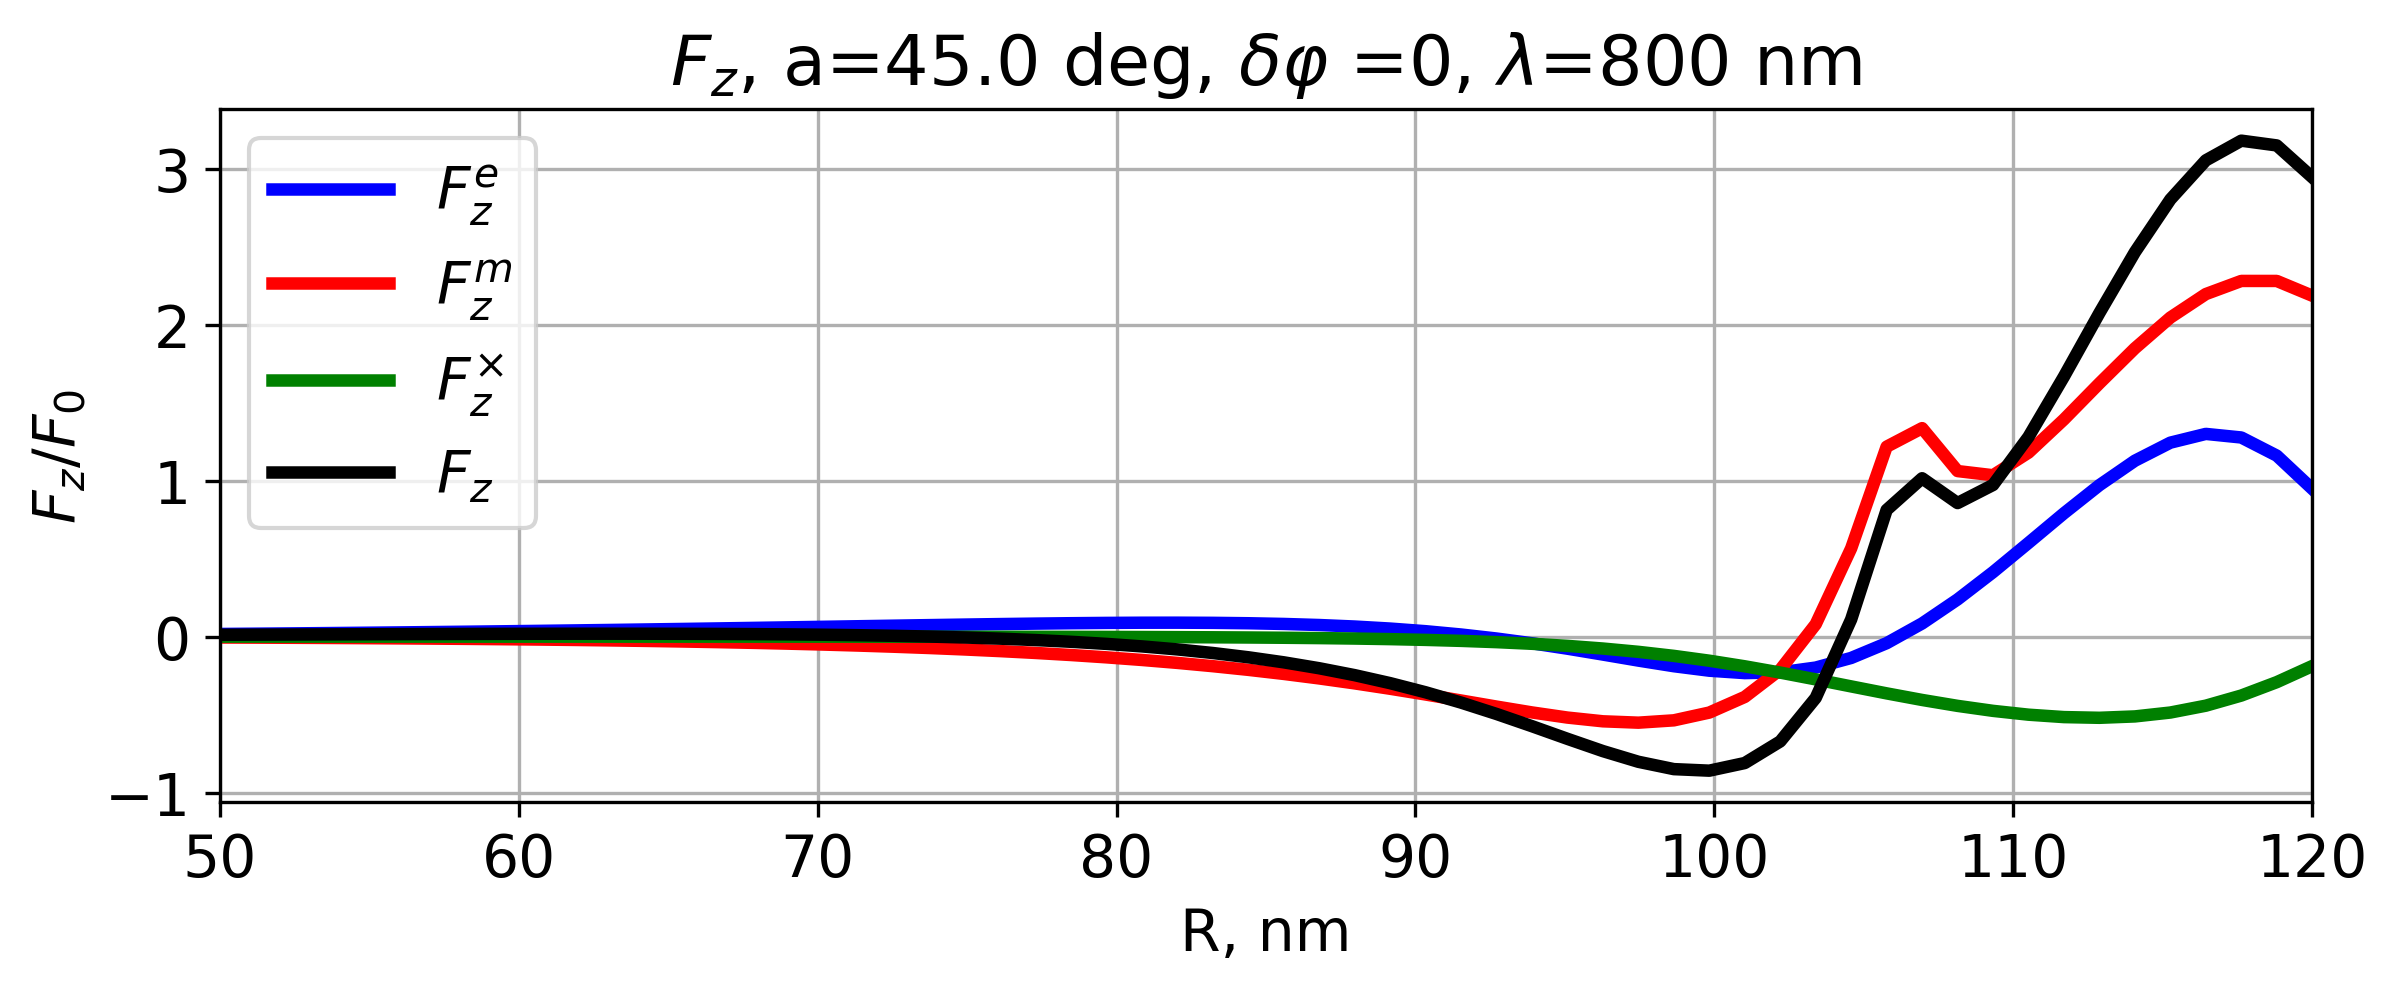

In [71]:
labels = ['$F_z$', '$F_z^{e0}$', '$F_z^{e1}$', '$F_z^{e2}$', '$F_z^{m0}$', '$F_z^{m1}$', '$F_z^{m2}$', '$F_z^{\\times}$']

c = ['black', 'b', 'b', 'b', 'red', 'red', 'red', 'g']

selected_components = [2,5,7]  # Choose from 0 to 7

# Plot all selected components
plt.figure(figsize=(9, 3), dpi=300)


    
plt.plot(R, (F_z[:,1]+F_z[:, 2]+F_z[:,3])/np.max(np.abs(F_z_air[:,0])), label='$F_z^e$', lw=3, c='b')

plt.plot(R, (F_z[:,4]+F_z[:, 5]+F_z[:,6])/np.max(np.abs(F_z_air[:,0])), label='$F_z^m$', lw=3, c='r')

plt.plot(R, F_z[:, 7]/np.max(np.abs(F_z_air[:,0])), label='$F_z^{\\times}$', lw=3, c='g')

plt.plot(R, F_z[:, 0]/np.max(np.abs(F_z_air[:,0])), label='$F_z$', lw=3, c='black')

plt.xlabel('R, nm')
plt.ylabel('$F_z/F_0$')
plt.title(f'$F_z$, a={round(a_angle*180/np.pi,2)} deg, $\delta \\varphi$ ={round(phase,2)}, $\lambda$={wl} nm')
plt.legend(loc="upper left")
plt.grid()
plt.xlim(R[0], R[-1])
plt.savefig(f'Fz_a_{round(a_angle,2)}_phase_{round(phase,2)}_from_R_comp_3.pdf')
plt.show()

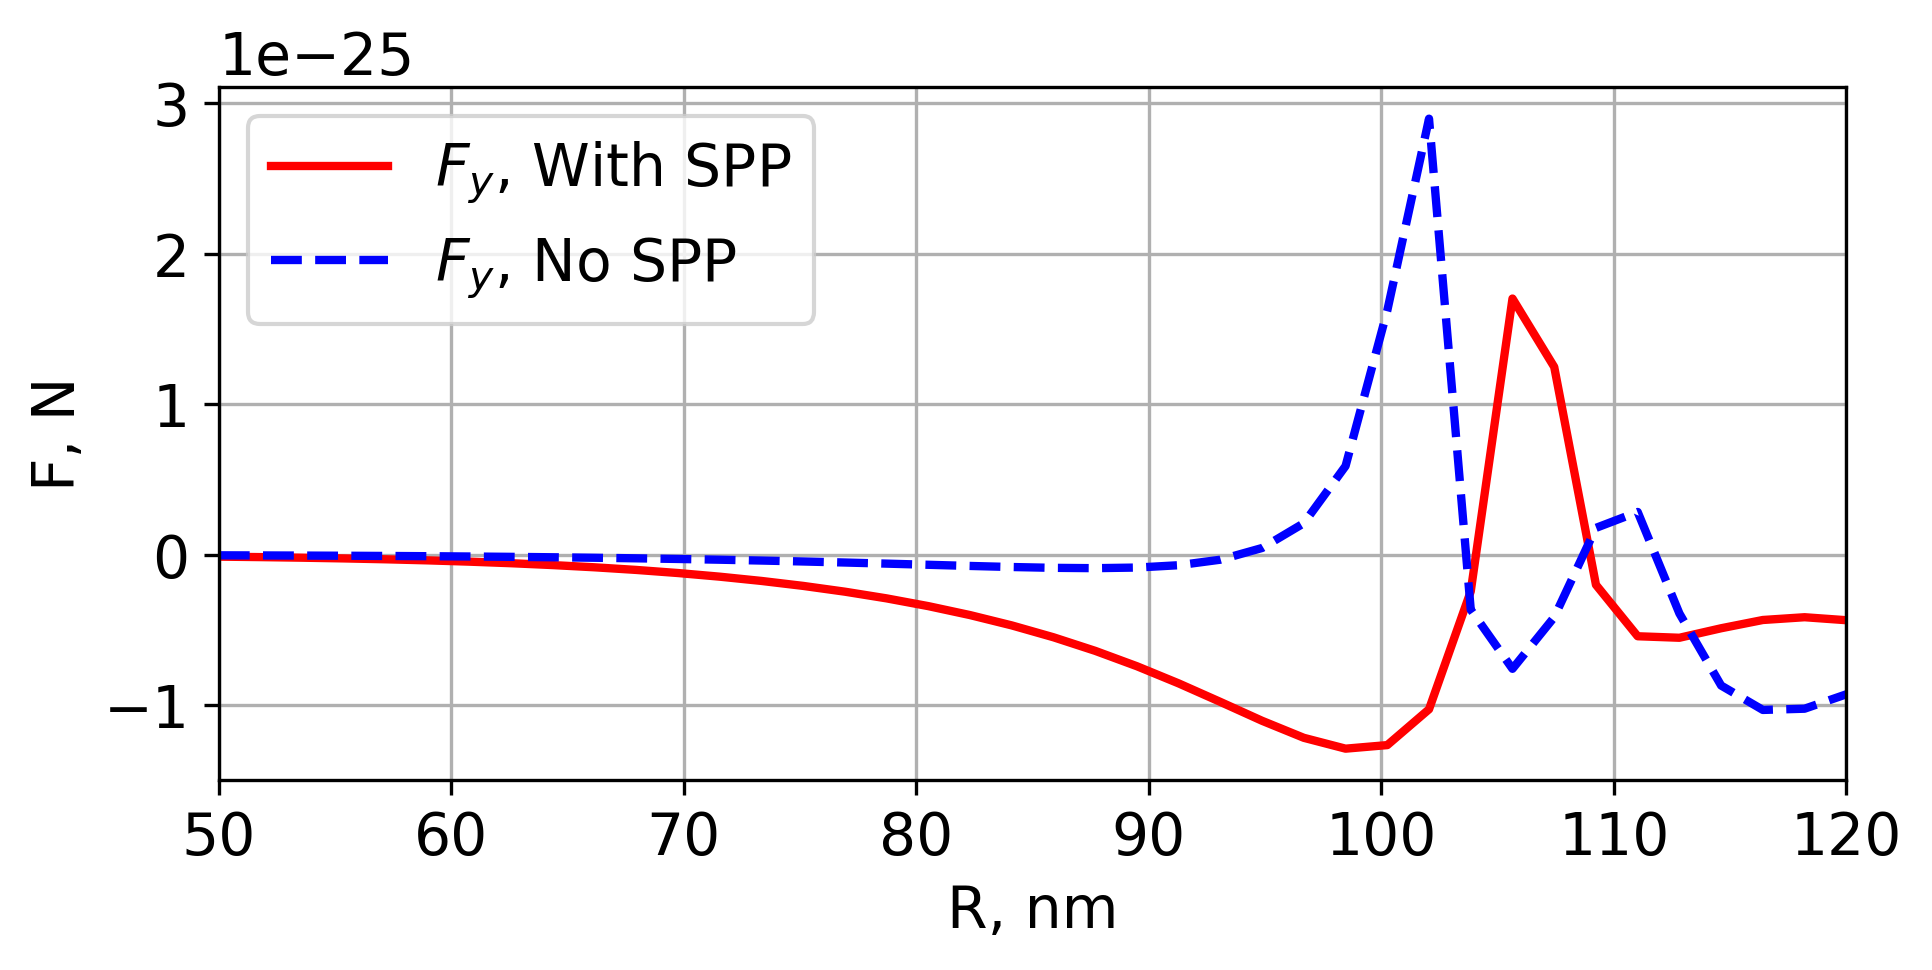

In [15]:
plt.figure(figsize=(7,3), dpi=300)
plt.plot(R, F_y[:,0], label='$F_y$, With SPP', lw=2, c='red')
plt.plot(R, F_y_no_spp[:,0], label='$F_y$, No SPP', lw=2, c='blue', ls='--')
plt.xlim(R[0], R[-1])
# plt.title(f'a={a}, $\delta \\varphi=${round(phase,2)},\n$\lambda=${wl} nm, $\\alpha=${round(angle*180/np.pi,1)} deg')
plt.xlabel('R, nm')
plt.ylabel('F, N')
plt.grid()
plt.legend()
plt.savefig(f'F_y_a_{round(a_angle,2)}_phase_{round(phase,2)}.pdf', format="pdf", bbox_inches='tight')
plt.show()

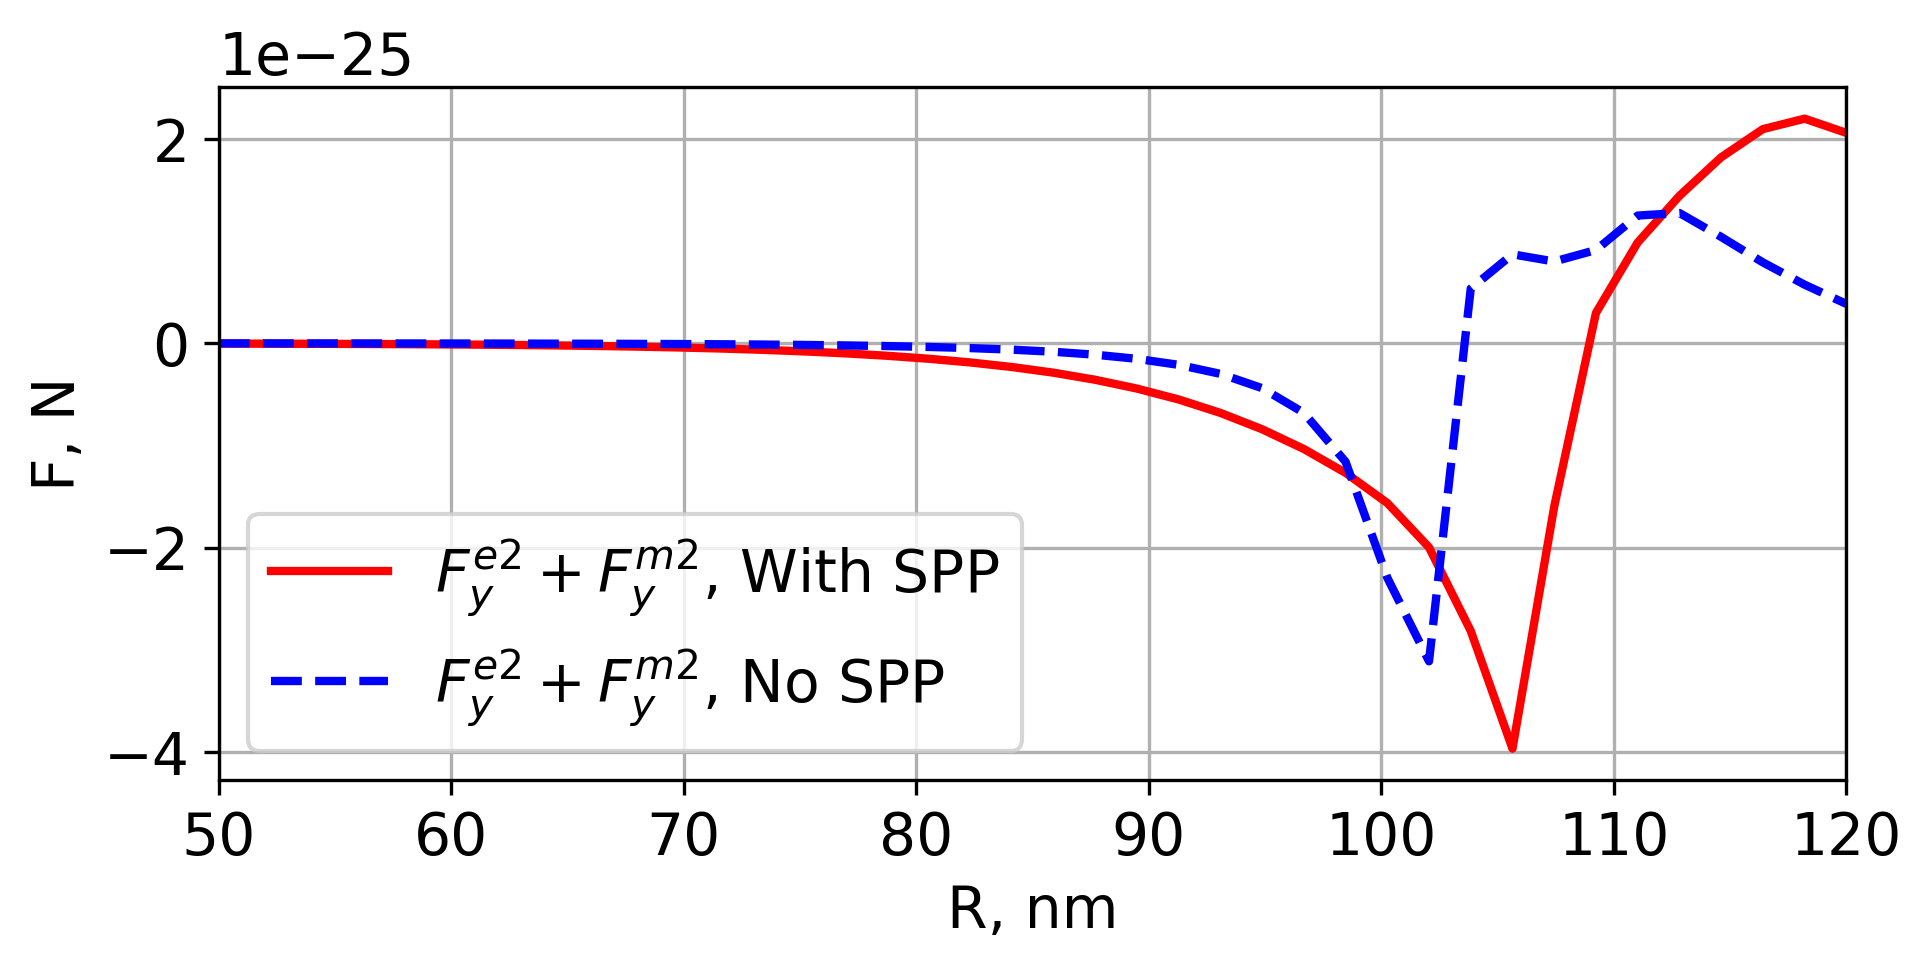

In [16]:
plt.figure(figsize=(7,3), dpi=300)
plt.plot(R, F_y[:,3]+F_y[:,6], label='$F_y^{e2}+F_y^{m2}$, With SPP', lw=2, c='red')
plt.plot(R, F_y_no_spp[:,3]+F_y_no_spp[:,6], label='$F_y^{e2}+F_y^{m2}$, No SPP', lw=2, c='blue', ls='--')
plt.xlim(R[0], R[-1])
# plt.title(f'a={a}, $\delta \\varphi=${round(phase,2)},\n$\lambda=${wl} nm, $\\alpha=${round(angle*180/np.pi,1)} deg')
plt.xlabel('R, nm')
plt.ylabel('F, N')
plt.grid()
plt.legend()
plt.savefig(f'F_y_e2m2_a_{round(a_angle,2)}_phase_{round(phase,2)}.pdf', format="pdf", bbox_inches='tight')
plt.show()


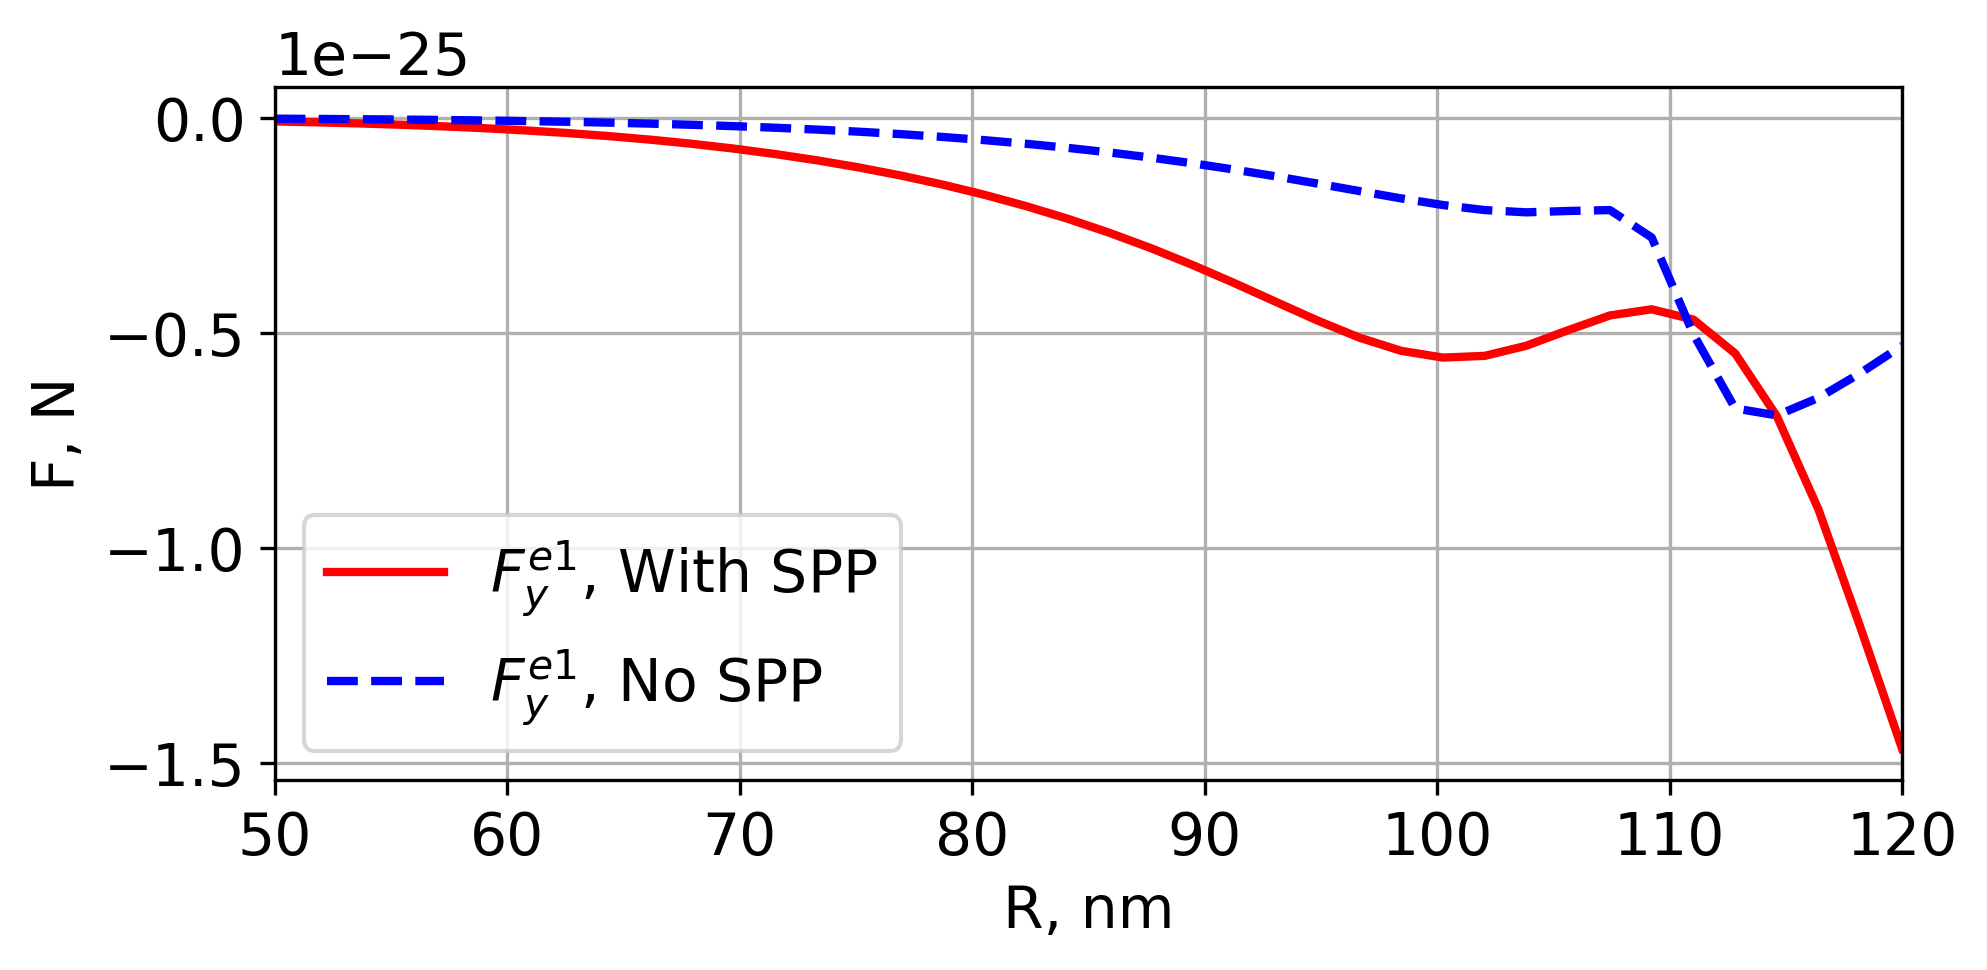

In [18]:
plt.figure(figsize=(7,3), dpi=300)
plt.plot(R, F_y[:,2], label='$F_y^{e1}$, With SPP', lw=2, c='red')
plt.plot(R, F_y_no_spp[:,2], label='$F_y^{e1}$, No SPP', lw=2, c='blue', ls='--')
plt.xlim(R[0], R[-1])
# plt.title(f'a={a}, $\delta \\varphi=${round(phase,2)},\n$\lambda=${wl} nm, $\\alpha=${round(angle*180/np.pi,1)} deg')
plt.xlabel('R, nm')
plt.ylabel('F, N')
plt.grid()
plt.legend()
plt.savefig(f'F_y_e1_a_{round(a_angle,2)}_phase_{round(phase,2)}.pdf', format="pdf", bbox_inches='tight')
plt.show()

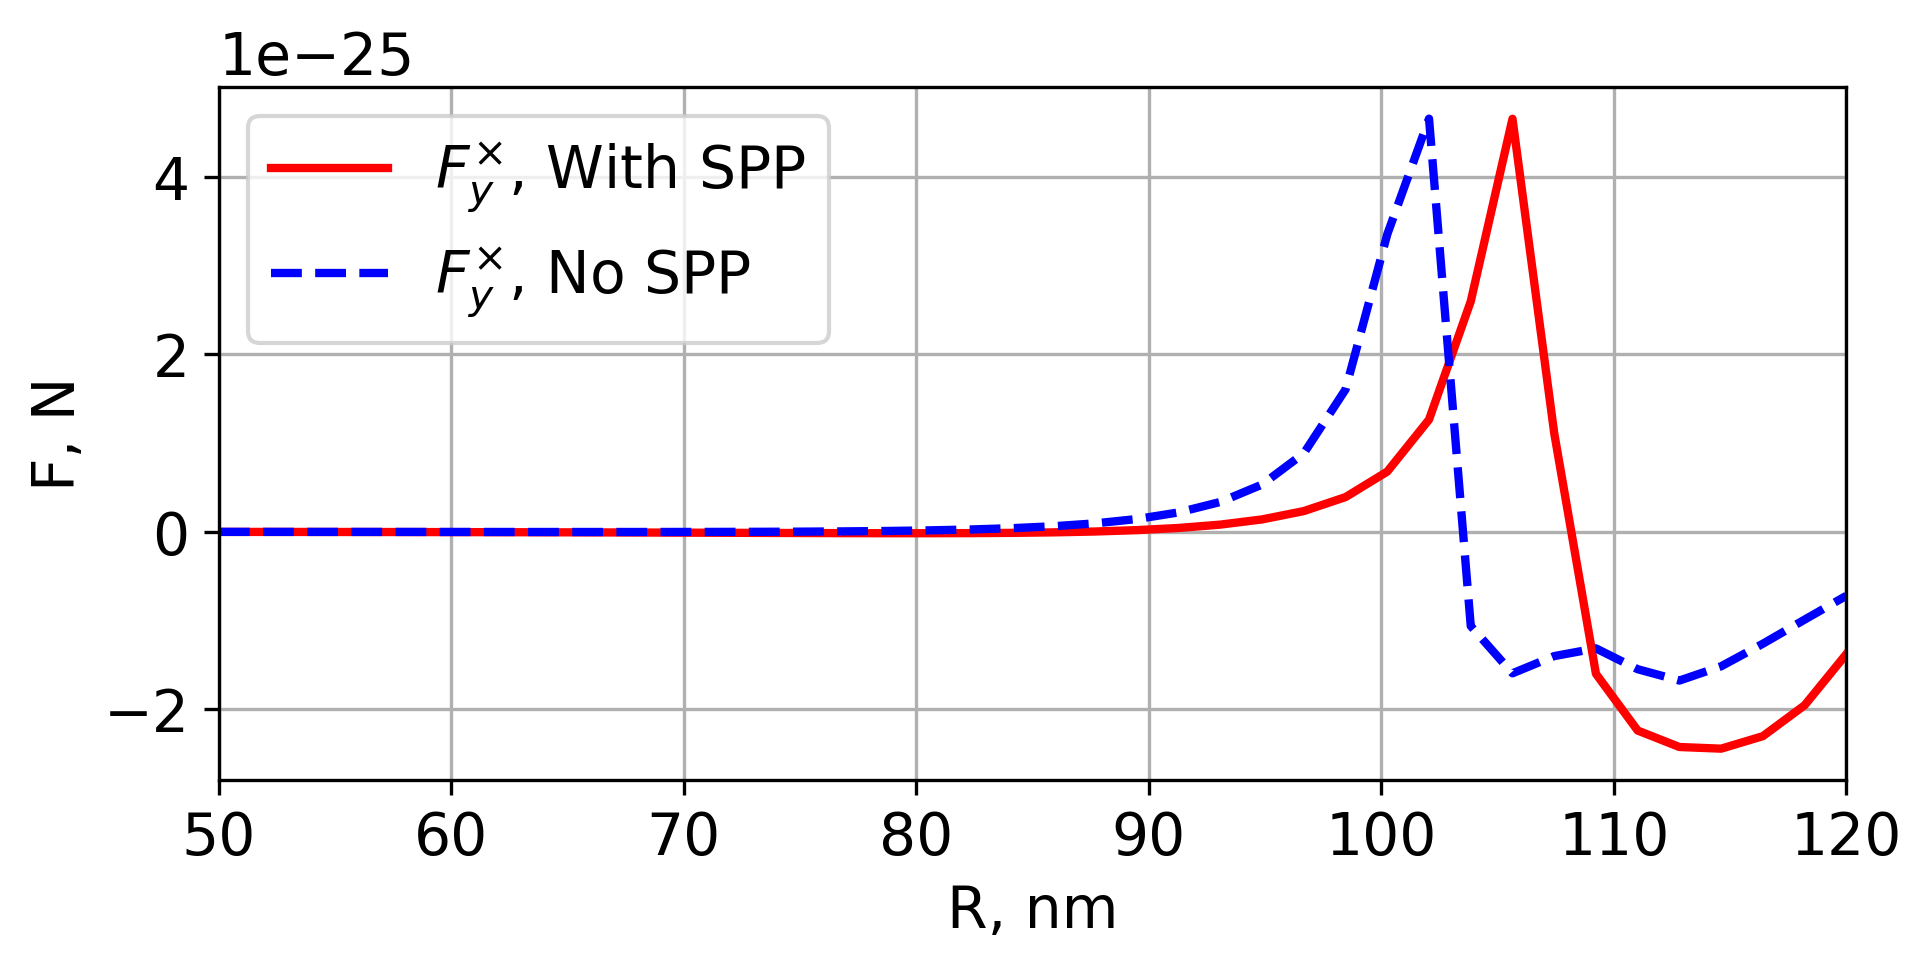

In [19]:
plt.figure(figsize=(7,3), dpi=300)
plt.plot(R, F_y[:,7], label='$F_y^{\\times}$, With SPP', lw=2, c='red')
plt.plot(R, F_y_no_spp[:,7], label='$F_y^{\\times}$, No SPP', lw=2, c='blue', ls='--')
plt.xlim(R[0], R[-1])
# plt.title(f'a={a}, $\delta \\varphi=${round(phase,2)},\n$\lambda=${wl} nm, $\\alpha=${round(angle*180/np.pi,1)} deg')
plt.xlabel('R, nm')
plt.ylabel('F, N')
plt.grid()
plt.legend()
plt.savefig(f'F_y_cross_a_{round(a_angle,2)}_phase_{round(phase,2)}.pdf', format="pdf", bbox_inches='tight')
plt.show()

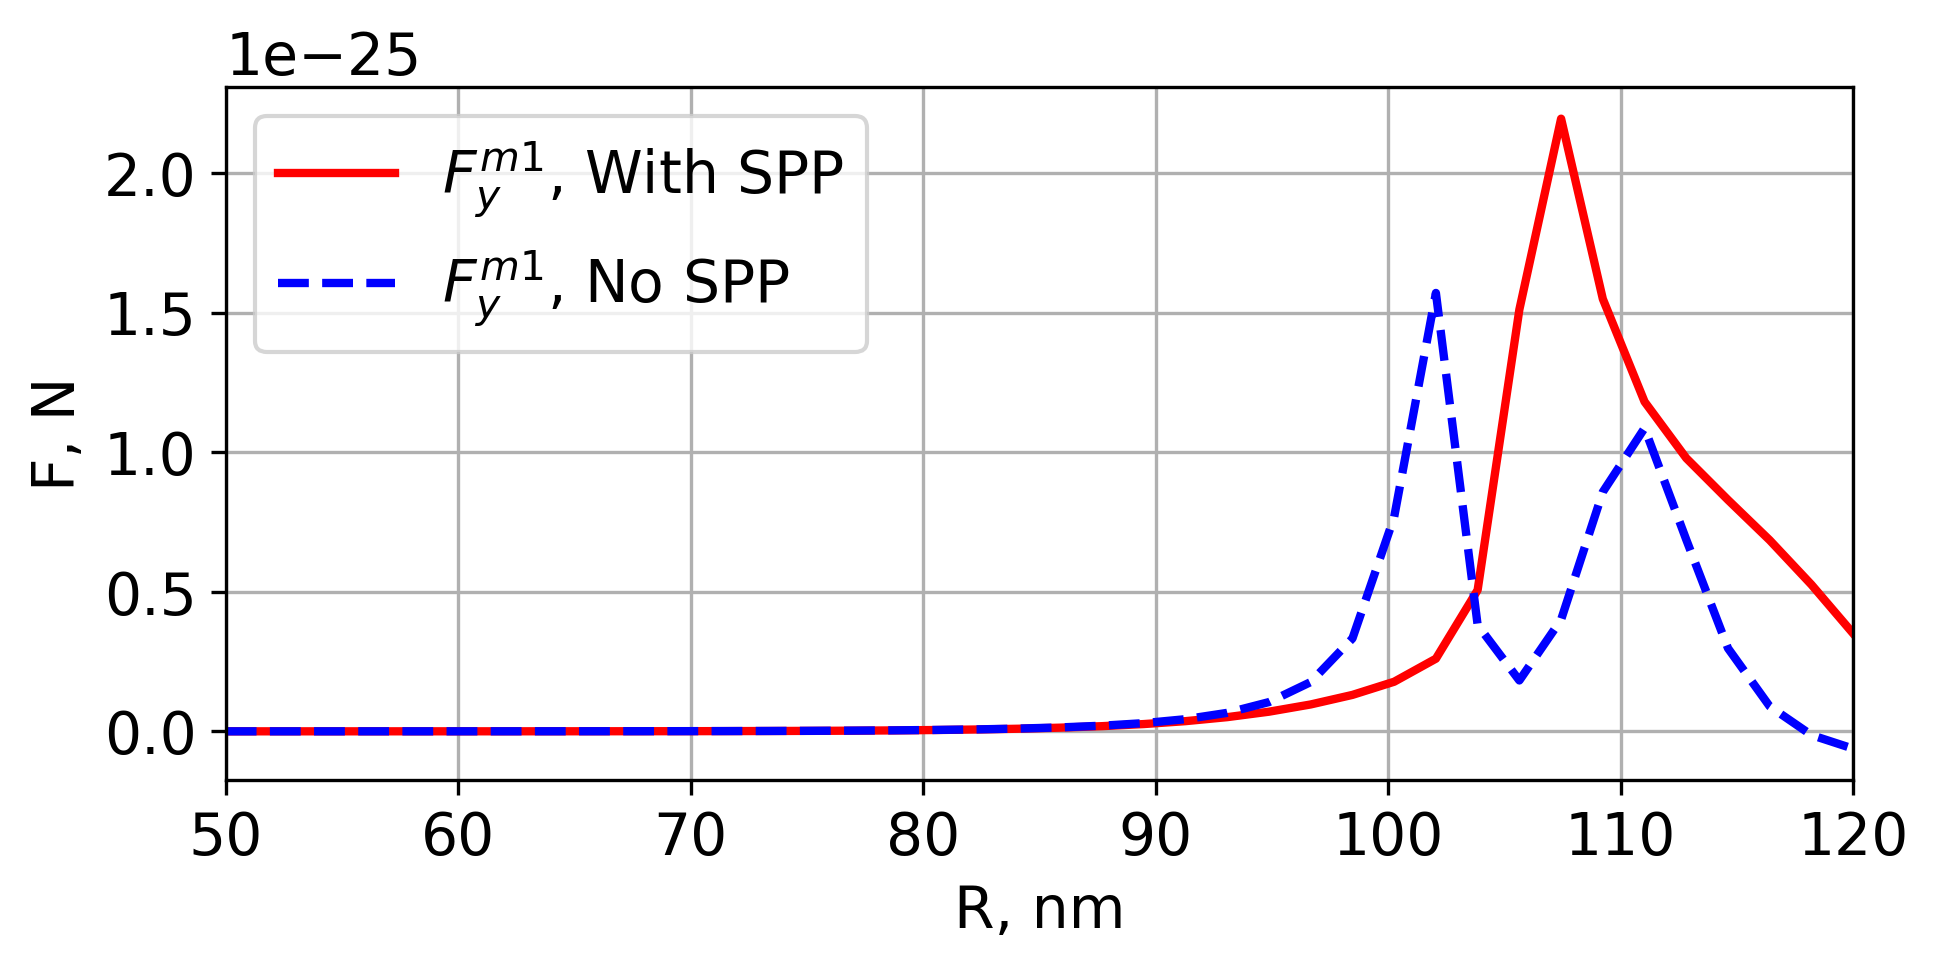

In [17]:
plt.figure(figsize=(7,3), dpi=300)
plt.plot(R, F_y[:,5], label='$F_y^{m1}$, With SPP', lw=2, c='red')
plt.plot(R, F_y_no_spp[:,5], label='$F_y^{m1}$, No SPP', lw=2, c='blue', ls='--')
plt.xlim(R[0], R[-1])
# plt.title(f'a={a}, $\delta \\varphi=${round(phase,2)},\n$\lambda=${wl} nm, $\\alpha=${round(angle*180/np.pi,1)} deg')
plt.xlabel('R, nm')
plt.ylabel('F, N')
plt.grid()
plt.legend()
plt.savefig(f'F_y_m1_a_{round(a_angle,2)}_phase_{round(phase,2)}.pdf', format="pdf", bbox_inches='tight')
plt.show()


In [17]:
STOP = 45
P = np.empty((len(R), 3), dtype=complex)
M = np.empty((len(R), 3), dtype=complex)

for i in tqdm(range(len(R))):
    point = [0,0,dist+R[i]]
    p,m = dipoles.calc_dipoles_v2(wl, eps_Au, point, R[i], eps_Si, angle, amplitude=1, phase=phase, a_angle=a_angle, stop=STOP )
    p,m = p[:,0],m[:,0]
    P[i,:], M[i,:] = p,m
    

  0%|          | 0/40 [00:00<?, ?it/s]

100%|██████████| 40/40 [00:00<00:00, 2384.69it/s]


In [32]:
STOP = 45

dyGyzH = np.empty(len(R), dtype=complex)
dyGyzE = np.empty(len(R), dtype=complex)
dy_rot_G_xz_H = np.empty(len(R), dtype=complex)
dy_rot_G_zx_H = np.empty_like(dy_rot_G_xz_H)


for i in tqdm(range(len(R))):
    point = [0,0,dist+R[i]]
    dy_G_E, dy_G_H = green_func.dy_green_E_H(wl, point[2], eps_Au, STOP)
    dy_rot_G_E, dy_rot_G_H = green_func.dy_rot_green_E_H(wl, point[2], eps_Au, STOP)
    dyGyzE[i] = dy_G_E[1,2]
    dyGyzH[i] = dy_G_H[1,2]
    dy_rot_G_xz_H[i] = dy_rot_G_H[0,2]
    dy_rot_G_zx_H[i] = dy_rot_G_H[2,0]

  0%|          | 0/50 [00:00<?, ?it/s]c:\Users\borod\Desktop\SPP_ANALYTICAL\SPP_ANALYTICAL\.venv\Lib\site-packages\scipy\integrate\_quadpack_py.py:441: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  re_retval = quad(refunc, a, b, args, full_output, epsabs,
100%|██████████| 50/50 [00:21<00:00,  2.35it/s]


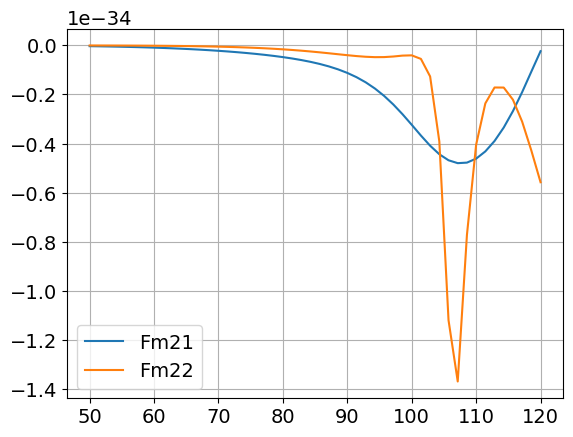

In [33]:
plt.plot(R, -np.imag(np.conj(M[:,0])*P[:,2]*dy_rot_G_zx_H), label='Fm21')
plt.plot(R, -np.imag(np.conj(M[:,2])*P[:,0]*dy_rot_G_xz_H), label='Fm22')
plt.legend()
plt.grid()

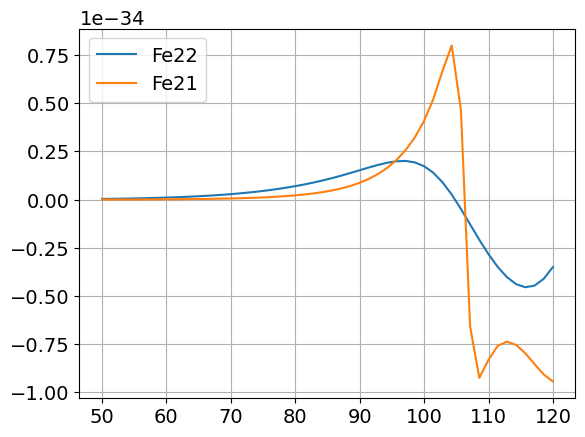

In [34]:
plt.plot(R, -np.imag(np.conj(P[:,2])*M[:,0]*dy_rot_G_zx_H), label='Fe22')
plt.plot(R, -np.imag(np.conj(P[:,0])*M[:,2]*dy_rot_G_xz_H), label='Fe21')
plt.legend()
plt.grid()

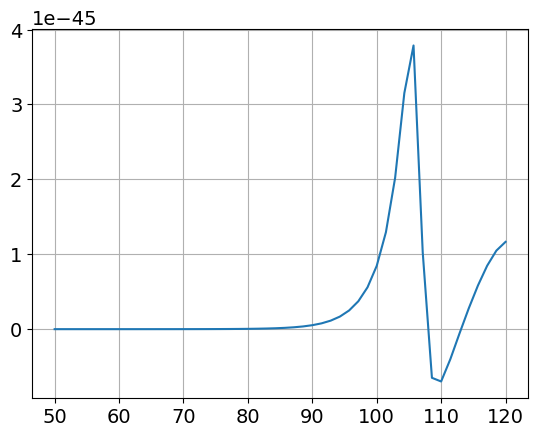

In [36]:
plt.plot(R, -np.imag(np.conj(M[:,1])*M[:,2]))
plt.grid()

In [13]:
p_dat = np.loadtxt('data export 27-03-25/p_from_r_a_05_phase_0.txt', skiprows=8, delimiter=',')

<>:10: SyntaxWarning: invalid escape sequence '\;'
<>:22: SyntaxWarning: invalid escape sequence '\;'
<>:34: SyntaxWarning: invalid escape sequence '\;'
<>:10: SyntaxWarning: invalid escape sequence '\;'
<>:22: SyntaxWarning: invalid escape sequence '\;'
<>:34: SyntaxWarning: invalid escape sequence '\;'
C:\Users\borod\AppData\Local\Temp\ipykernel_29088\131095175.py:10: SyntaxWarning: invalid escape sequence '\;'
  axs[0, 0].set_ylabel('$p_x,\; C \cdot m$')
C:\Users\borod\AppData\Local\Temp\ipykernel_29088\131095175.py:22: SyntaxWarning: invalid escape sequence '\;'
  axs[1, 0].set_ylabel('$p_y,\; C \cdot m$')
C:\Users\borod\AppData\Local\Temp\ipykernel_29088\131095175.py:34: SyntaxWarning: invalid escape sequence '\;'
  axs[2, 0].set_ylabel('$p_z,\; C \cdot m$')


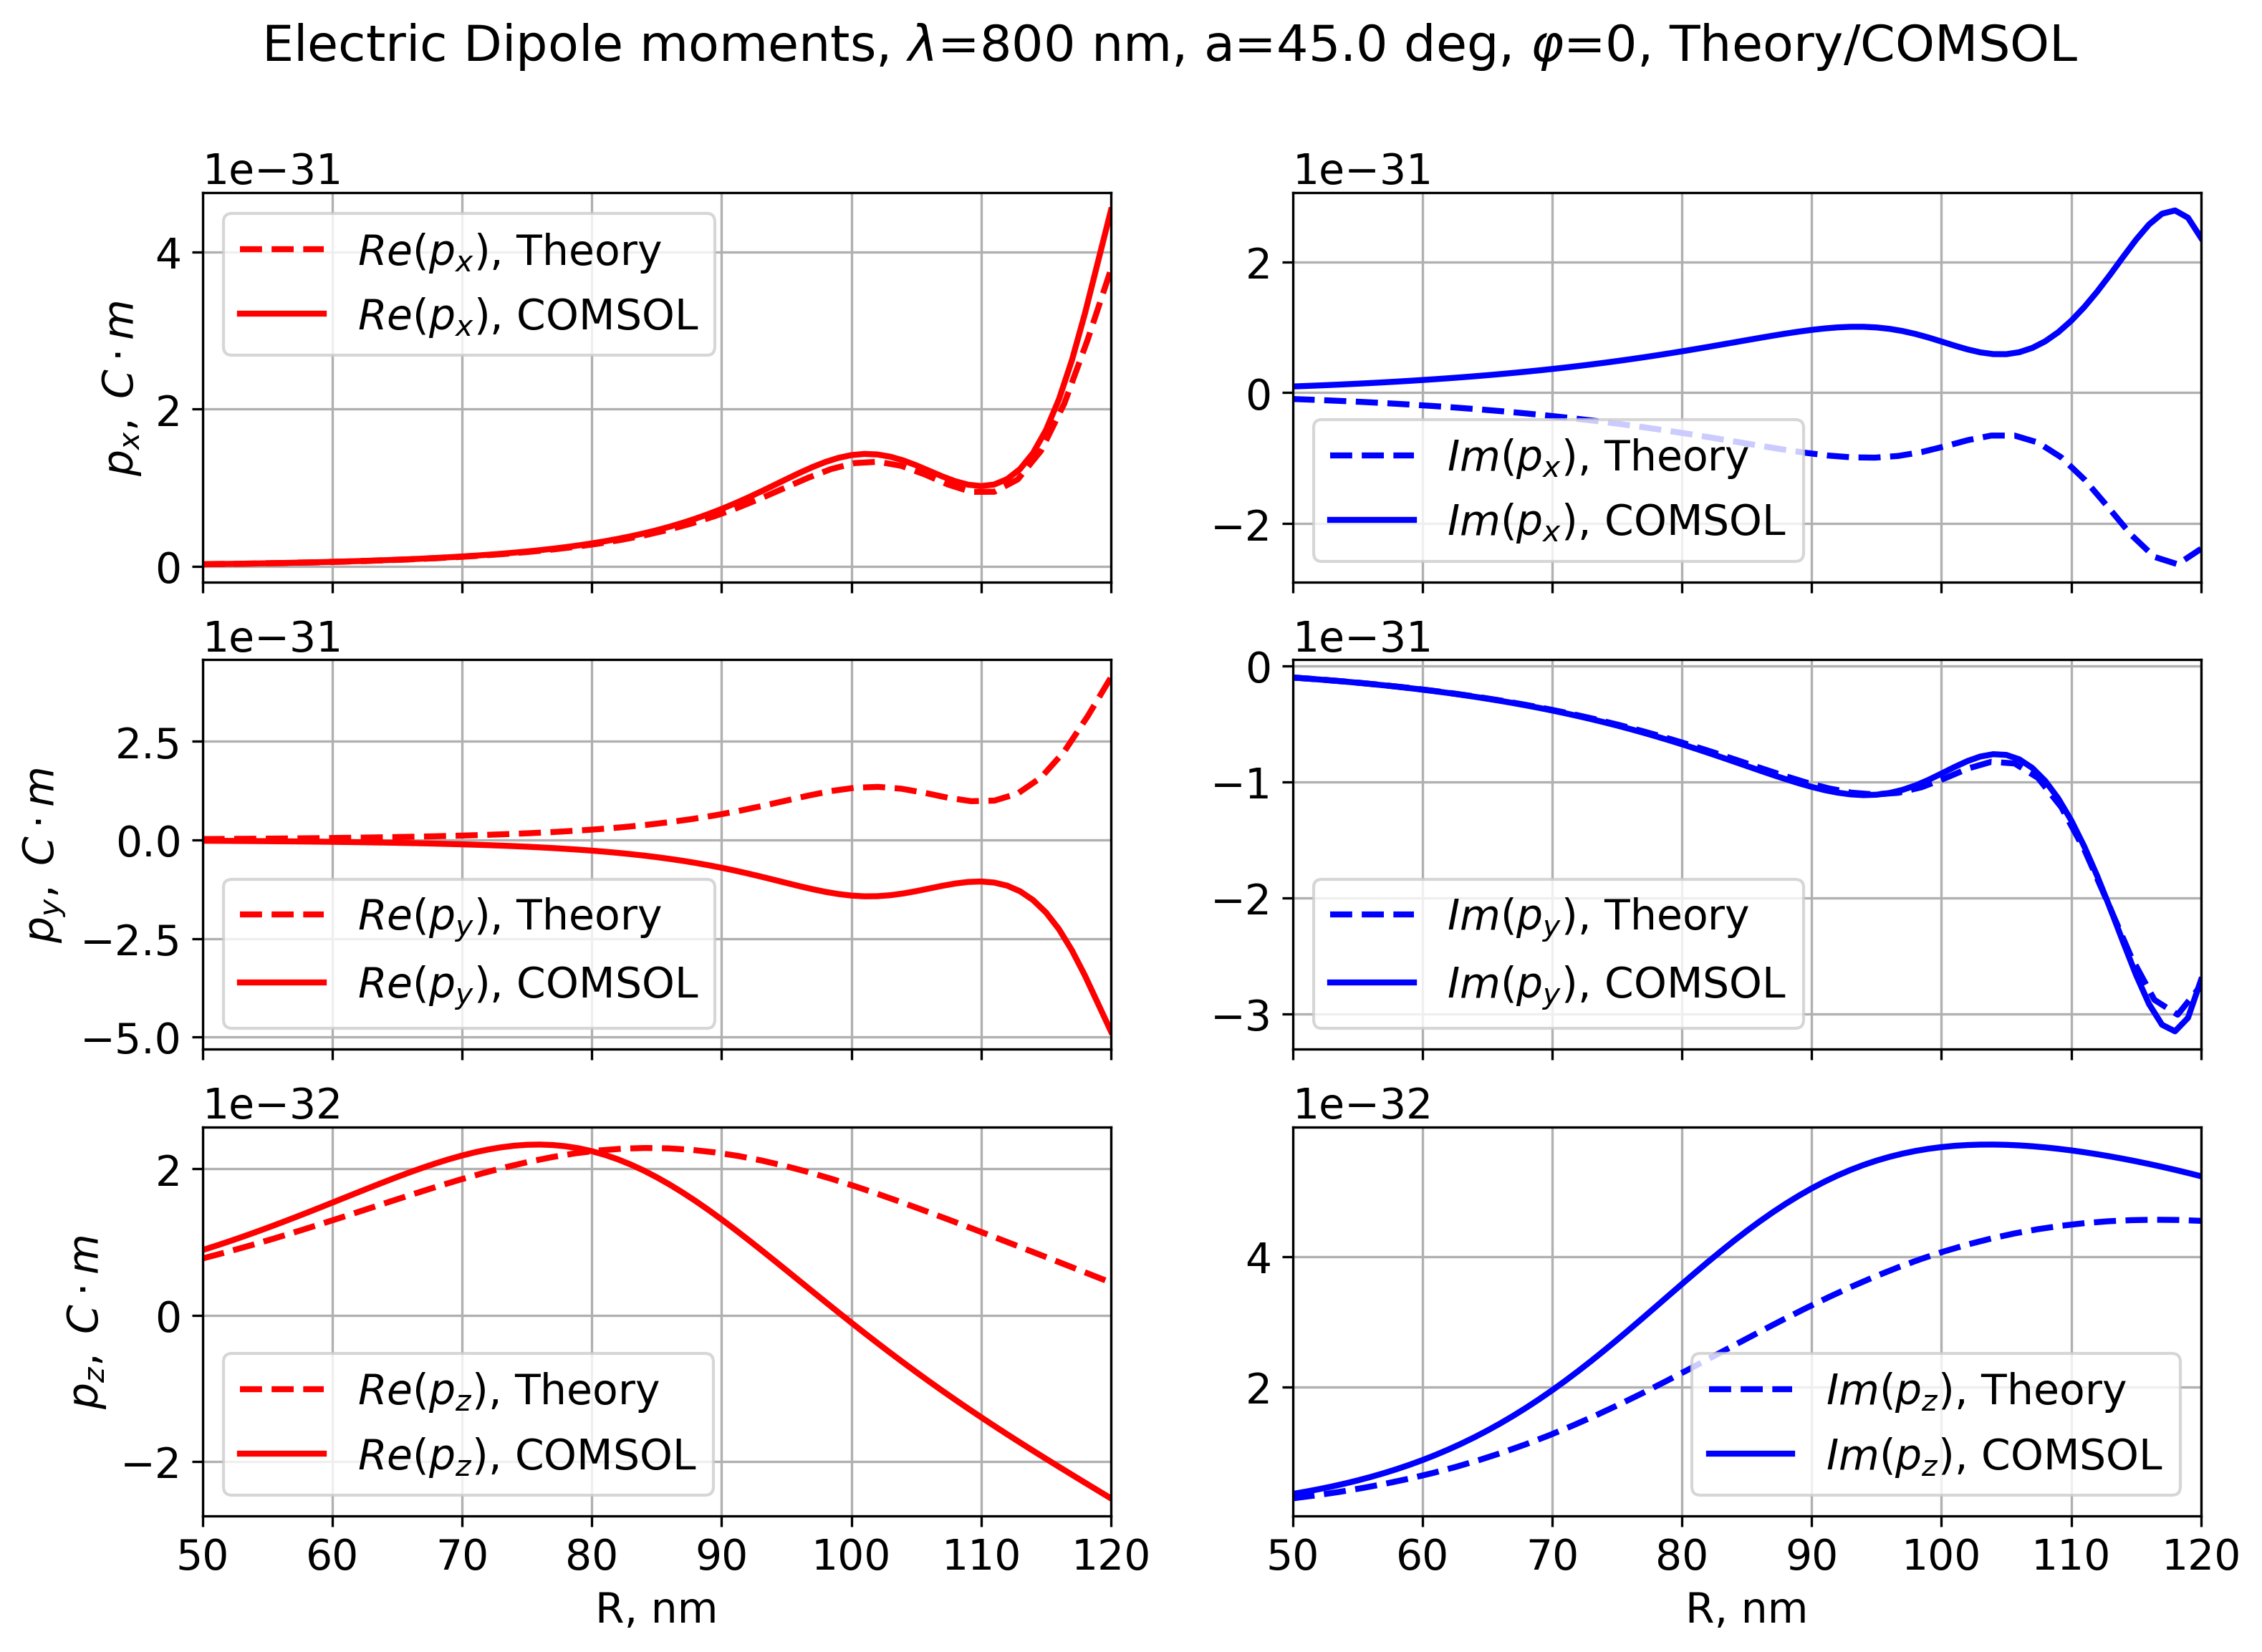

: 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(3, 2, figsize=(12, 8), sharex=True, dpi=300)
fig.suptitle(f"Electric Dipole moments, $\\lambda$={wl} nm, a={round(a_angle/np.pi*180,2)} deg, $\\varphi$={phase}, Theory/COMSOL")

# p_x components
axs[0, 0].plot(R, np.real(P[:, 0]), label='$Re(p_x)$, Theory', c='r', lw=2, ls='--')
axs[0, 0].plot(p_dat[:, 0], p_dat[:, 1]/2/np.pi, label='$Re(p_x)$, COMSOL', c='r', lw=2)
axs[0, 0].set_ylabel('$p_x,\; C \cdot m$')
axs[0, 0].grid()
axs[0, 0].legend()

axs[0, 1].plot(R, np.imag(P[:, 0]), label='$Im(p_x)$, Theory', c='b', lw=2, ls='--')
axs[0, 1].plot(p_dat[:, 0], p_dat[:, 2]/2/np.pi, label='$Im(p_x)$, COMSOL', c='b', lw=2)
axs[0, 1].grid()
axs[0, 1].legend()

# p_y components
axs[1, 0].plot(R, np.real(P[:, 1]), label='$Re(p_y)$, Theory', c='r', lw=2, ls='--')
axs[1, 0].plot(p_dat[:, 0], p_dat[:, 3]/2/np.pi, label='$Re(p_y)$, COMSOL', c='r', lw=2)
axs[1, 0].set_ylabel('$p_y,\; C \cdot m$')
axs[1, 0].grid()
axs[1, 0].legend()

axs[1, 1].plot(R, np.imag(P[:, 1]), label='$Im(p_y)$, Theory', c='b', lw=2, ls='--')
axs[1, 1].plot(p_dat[:, 0], p_dat[:, 4]/2/np.pi, label='$Im(p_y)$, COMSOL', c='b', lw=2)
axs[1, 1].grid()
axs[1, 1].legend()

# p_z components
axs[2, 0].plot(R, np.real(P[:, 2]), label='$Re(p_z)$, Theory', c='r', lw=2, ls='--')
axs[2, 0].plot(p_dat[:, 0], -p_dat[:, 5]/2/np.pi, label='$Re(p_z)$, COMSOL', c='r', lw=2)
axs[2, 0].set_ylabel('$p_z,\; C \cdot m$')
axs[2, 0].grid()
axs[2, 0].legend()

axs[2, 1].plot(R, np.imag(P[:, 2]), label='$Im(p_z)$, Theory', c='b', lw=2, ls='--')
axs[2, 1].plot(p_dat[:, 0], p_dat[:, 6]/2/np.pi, label='$Im(p_z)$, COMSOL', c='b', lw=2)
axs[2, 1].grid()
axs[2, 1].legend()

# Set x-axis limits
for ax in axs[-1]:
    ax.set_xlim(R[0], R[-1])
    
for ax in axs[-1]:
    ax.set_xlabel('R, nm')

# plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig(f'electric_dipoles_theory_comsol_a_{round(a_angle/np.pi*180,2)}_phase_{phase}.pdf', bbox_inches='tight')
plt.show()

In [15]:
m_dat = np.loadtxt('data export 27-03-25/m_from_r_a_05_phase_0.txt', skiprows=8, delimiter=',')

<>:7: SyntaxWarning: invalid escape sequence '\;'
<>:19: SyntaxWarning: invalid escape sequence '\;'
<>:31: SyntaxWarning: invalid escape sequence '\;'
<>:7: SyntaxWarning: invalid escape sequence '\;'
<>:19: SyntaxWarning: invalid escape sequence '\;'
<>:31: SyntaxWarning: invalid escape sequence '\;'
C:\Users\borod\AppData\Local\Temp\ipykernel_29088\216040333.py:7: SyntaxWarning: invalid escape sequence '\;'
  axs[0, 0].set_ylabel('$m_x,\; C \cdot m$')
C:\Users\borod\AppData\Local\Temp\ipykernel_29088\216040333.py:19: SyntaxWarning: invalid escape sequence '\;'
  axs[1, 0].set_ylabel('$m_x,\; C \cdot m$')
C:\Users\borod\AppData\Local\Temp\ipykernel_29088\216040333.py:31: SyntaxWarning: invalid escape sequence '\;'
  axs[2, 0].set_ylabel('$m_x,\; C \cdot m$')


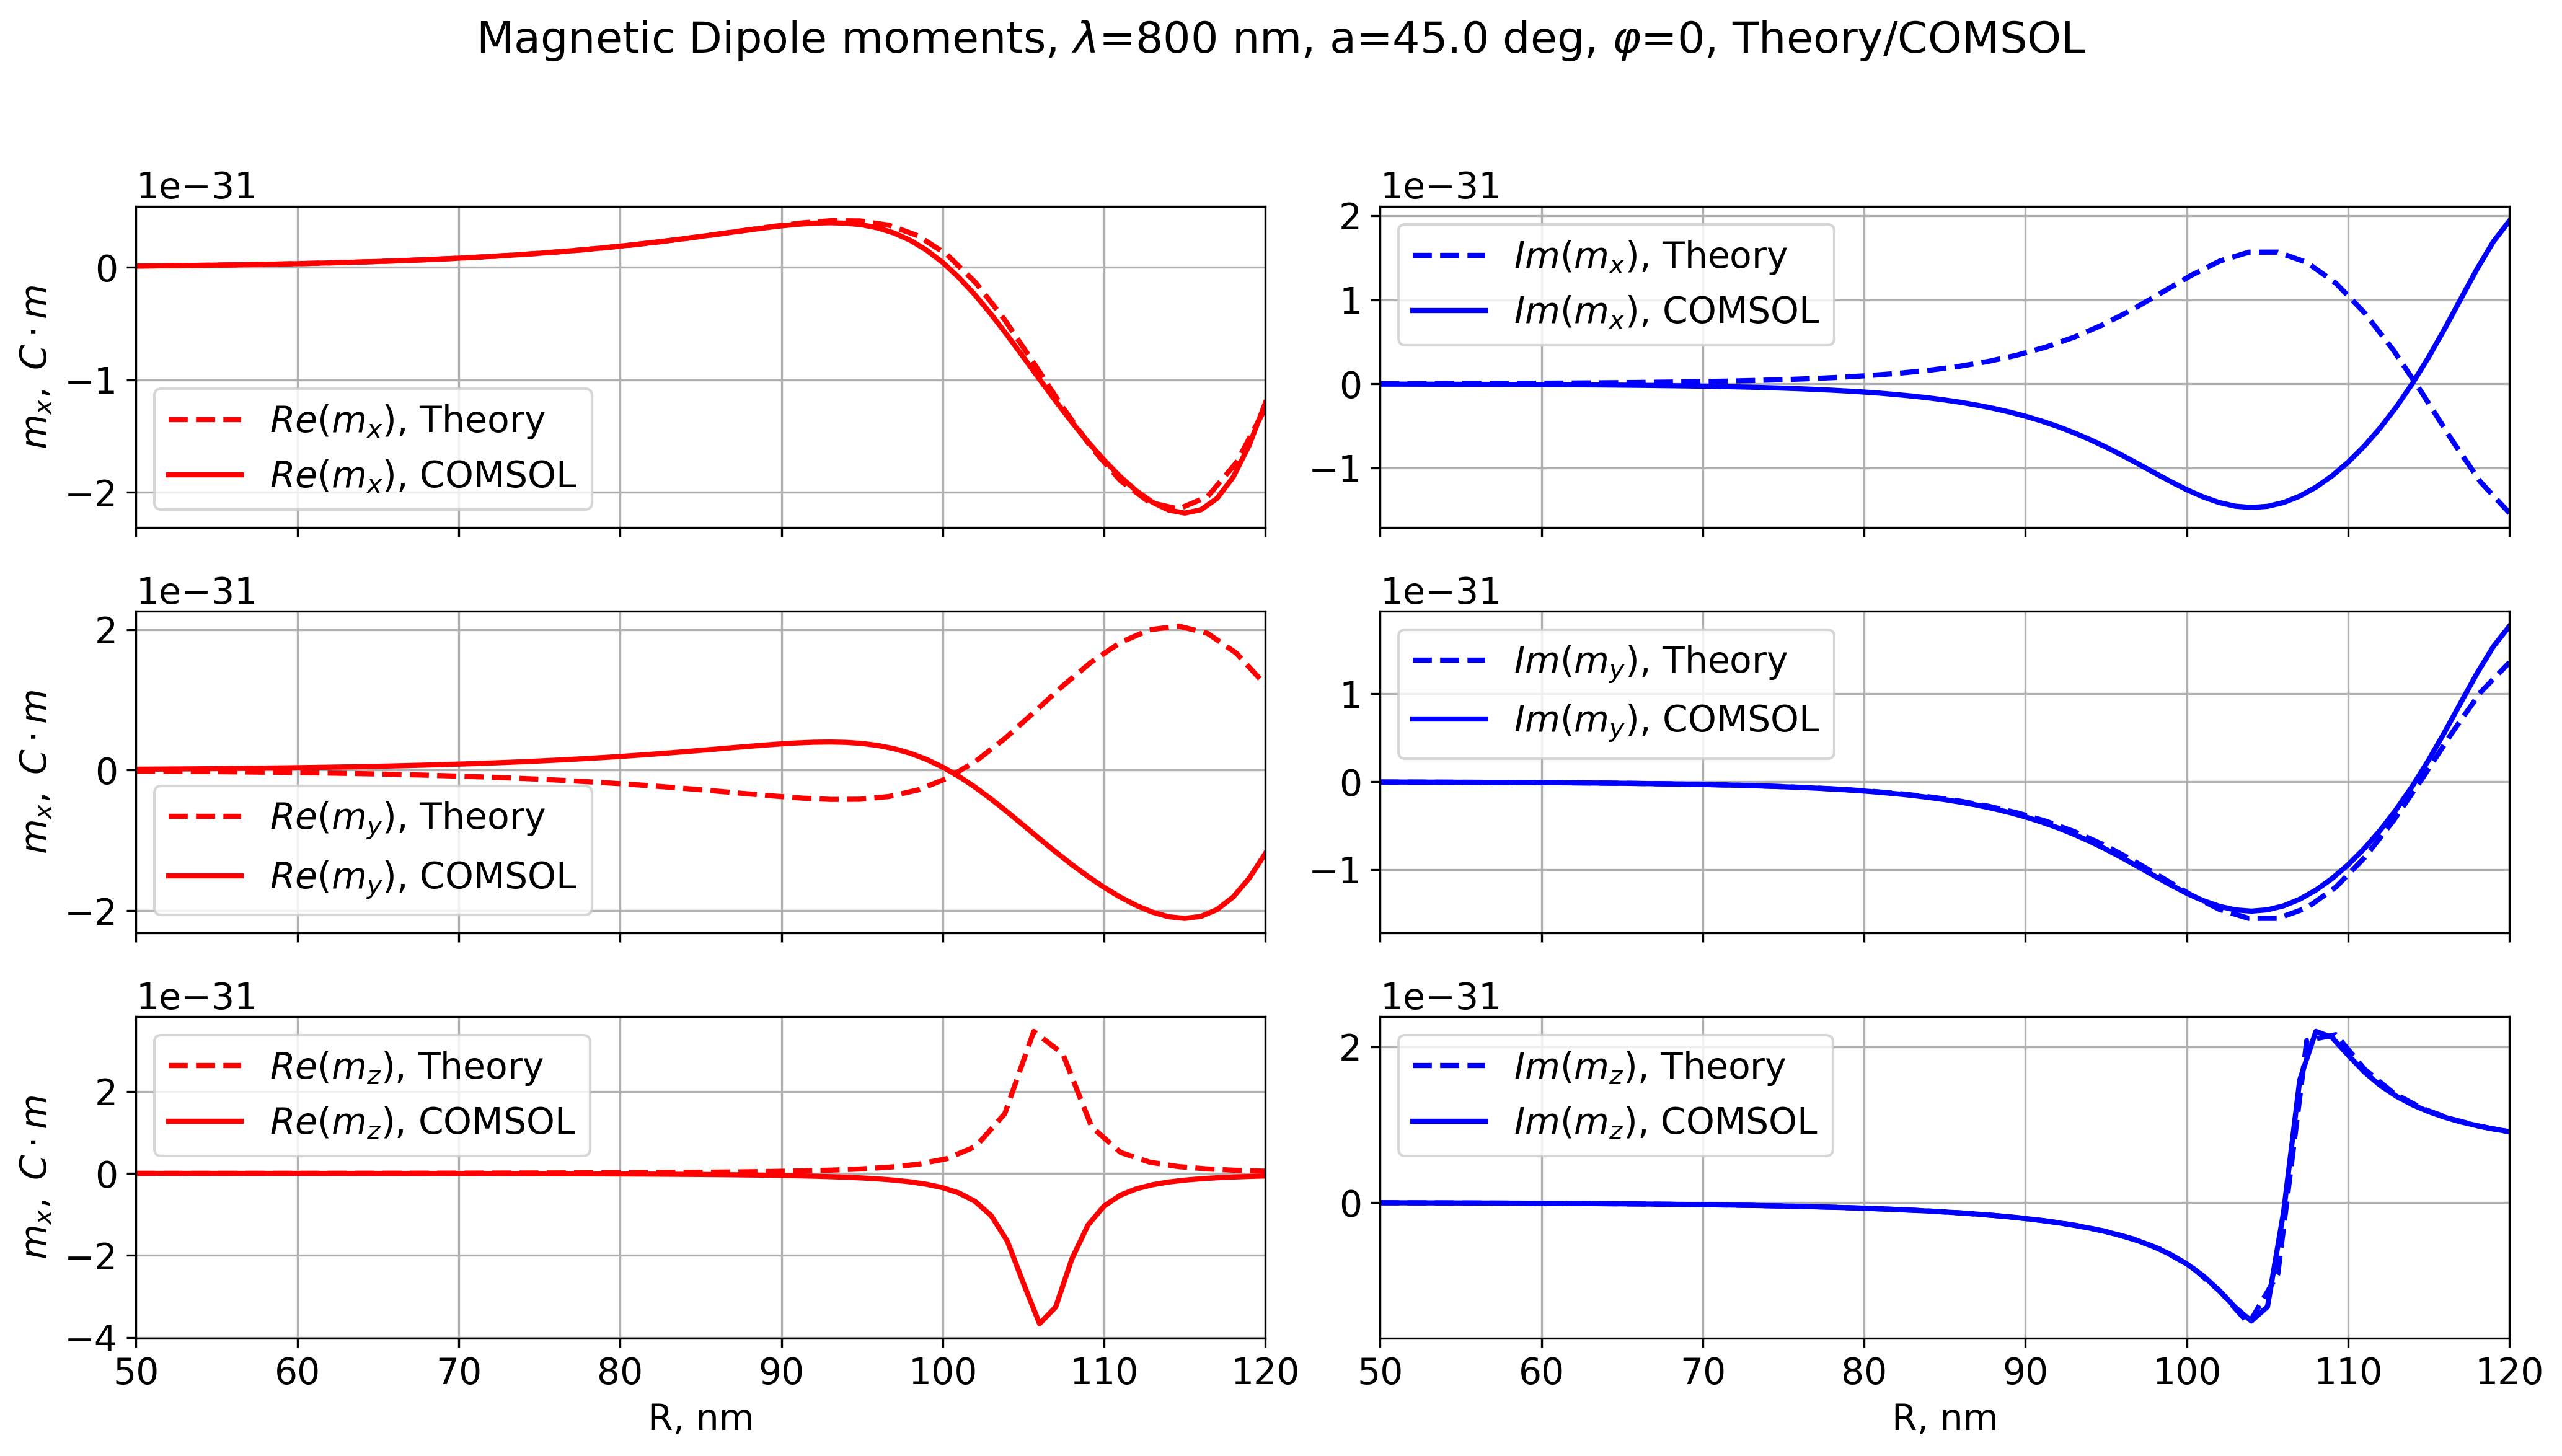

In [17]:
fig, axs = plt.subplots(3, 2, figsize=(14, 8), sharex=True, dpi=300)
fig.suptitle(f"Magnetic Dipole moments, $\\lambda$={wl} nm, a={round(a_angle/np.pi*180,2)} deg, $\\varphi$={phase}, Theory/COMSOL")
c_const = 299792458
# m_x components
axs[0, 0].plot(R, np.real(M[:, 0])/c_const, label='$Re(m_x)$, Theory', c='r', lw=2, ls='--')
axs[0, 0].plot(m_dat[:, 0], m_dat[:, 1]/2/np.pi/c_const, label='$Re(m_x)$, COMSOL', c='r', lw=2)
axs[0, 0].set_ylabel('$m_x,\; C \cdot m$')
axs[0, 0].grid()
axs[0, 0].legend()

axs[0, 1].plot(R, np.imag(M[:, 0])/c_const, label='$Im(m_x)$, Theory', c='b', lw=2, ls='--')
axs[0, 1].plot(m_dat[:, 0], m_dat[:, 2]/2/np.pi/c_const, label='$Im(m_x)$, COMSOL', c='b', lw=2)
axs[0, 1].grid()
axs[0, 1].legend()

# m_y components
axs[1, 0].plot(R, np.real(M[:, 1])/c_const, label='$Re(m_y)$, Theory', c='r', lw=2, ls='--')
axs[1, 0].plot(m_dat[:, 0], m_dat[:, 3]/2/np.pi/c_const, label='$Re(m_y)$, COMSOL', c='r', lw=2)
axs[1, 0].set_ylabel('$m_x,\; C \cdot m$')
axs[1, 0].grid()
axs[1, 0].legend()

axs[1, 1].plot(R, np.imag(M[:, 1])/c_const, label='$Im(m_y)$, Theory', c='b', lw=2, ls='--')
axs[1, 1].plot(m_dat[:, 0], m_dat[:, 4]/2/np.pi/c_const, label='$Im(m_y)$, COMSOL', c='b', lw=2)
axs[1, 1].grid()
axs[1, 1].legend()

# m_z components
axs[2, 0].plot(R, np.real(M[:, 2])/c_const, label='$Re(m_z)$, Theory', c='r', lw=2, ls='--')
axs[2, 0].plot(m_dat[:, 0], m_dat[:, 5]/2/np.pi/c_const, label='$Re(m_z)$, COMSOL', c='r', lw=2)
axs[2, 0].set_ylabel('$m_x,\; C \cdot m$')
axs[2, 0].grid()
axs[2, 0].legend()

axs[2, 1].plot(R, np.imag(M[:, 2])/c_const, label='$Im(m_z)$, Theory', c='b', lw=2, ls='--')
axs[2, 1].plot(m_dat[:, 0], m_dat[:, 6]/2/np.pi/c_const, label='$Im(m_z)$, COMSOL', c='b', lw=2)
axs[2, 1].grid()
axs[2, 1].legend()

# Set x-axis limits
for ax in axs[-1]:
    ax.set_xlim(R[0], R[-1])
    
for ax in axs[-1]:
    ax.set_xlabel('R, nm')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig(f'magnetic_dipoles_theory_comsol_a_{round(a_angle/np.pi*180,2)}_phase_{phase}.pdf', bbox_inches='tight')
plt.show()

In [18]:
F_dat= np.loadtxt('data export 27-03-25/f_from_r_a_05_phase_0.txt', skiprows=8, delimiter=',')

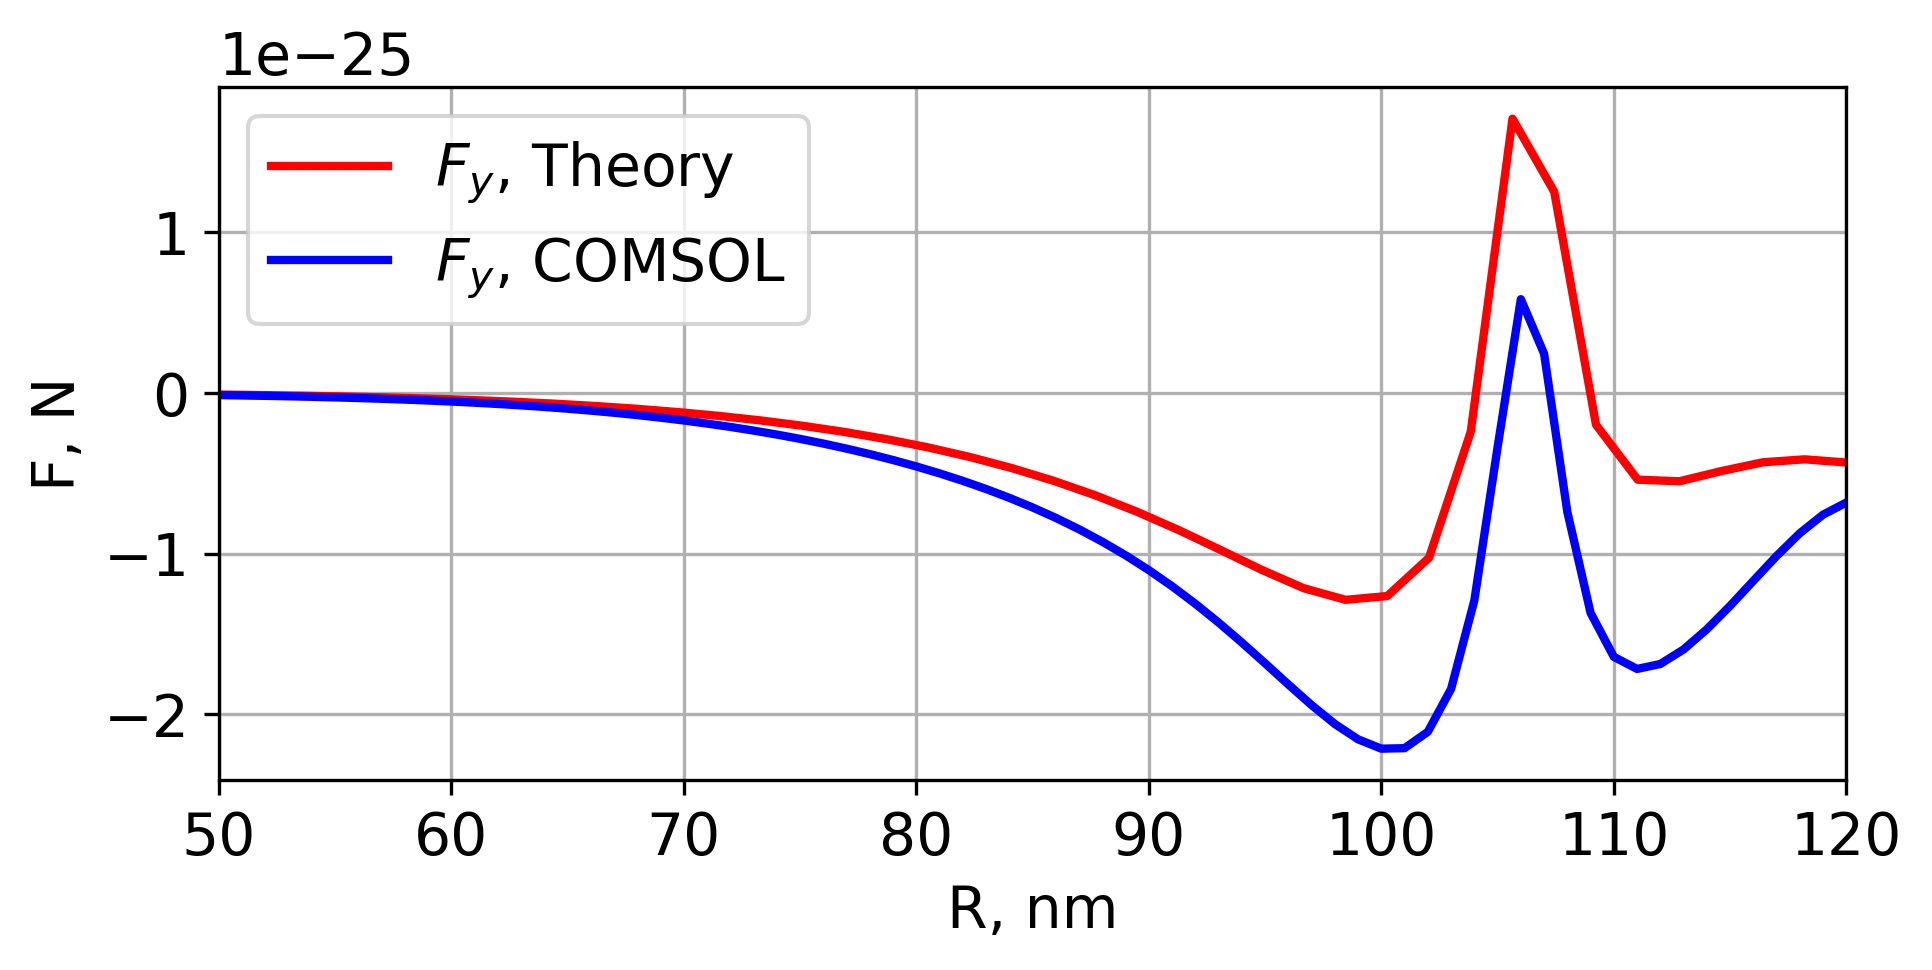

In [19]:
plt.figure(figsize=(7,3), dpi=300)
plt.plot(R, F_y[:,0], label='$F_y$, Theory', lw=2, c='red')
plt.plot(F_dat[:,0], F_dat[:,2], label='$F_y$, COMSOL', lw=2, c='blue')
plt.xlim(R[0], R[-1])
# plt.title(f'a={a}, $\delta \\varphi=${round(phase,2)},\n$\lambda=${wl} nm, $\\alpha=${round(angle*180/np.pi,1)} deg')
plt.xlabel('R, nm')
plt.ylabel('F, N')
plt.grid()
plt.legend()
plt.savefig(f'F_y_a_{round(a_angle,2)}_phase_{round(phase,2)}_comsol_theory.pdf', format="pdf", bbox_inches='tight')
plt.show()

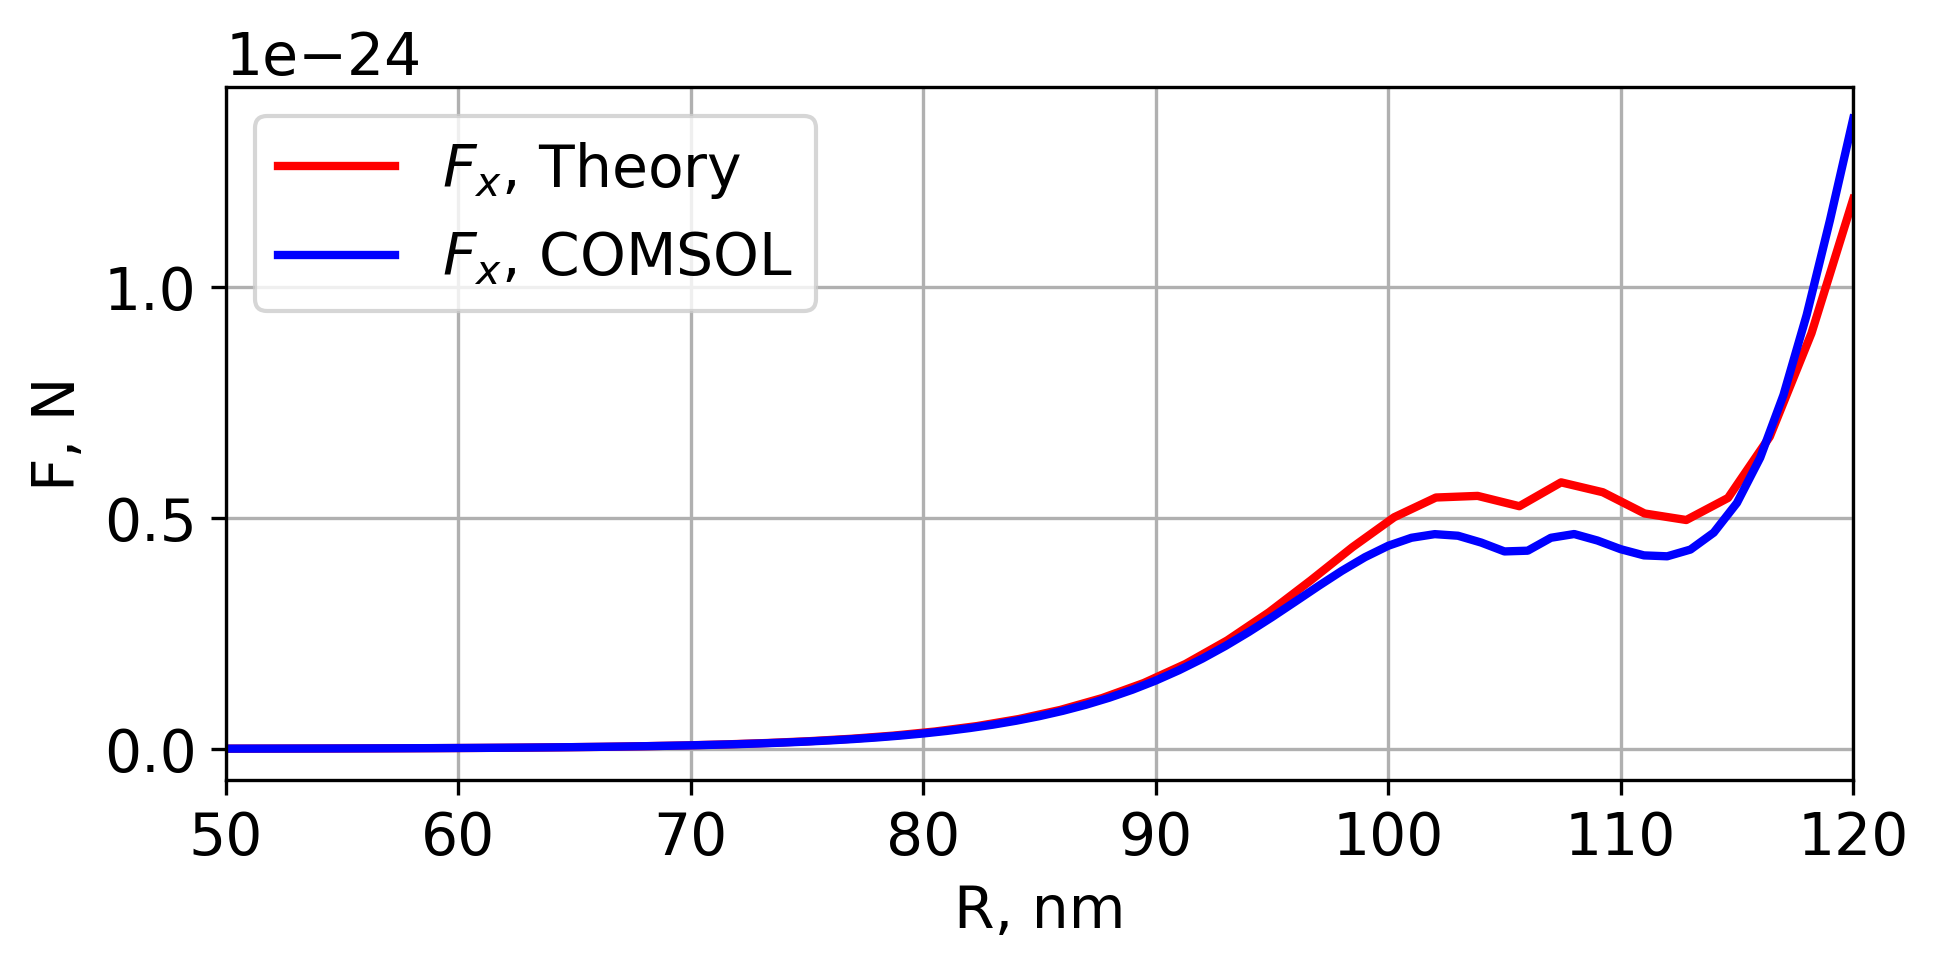

In [20]:
plt.figure(figsize=(7,3), dpi=300)
plt.plot(R, F_x[:,0], label='$F_x$, Theory', lw=2, c='red')
plt.plot(F_dat[:,0], F_dat[:,1], label='$F_x$, COMSOL', lw=2, c='blue')
plt.xlim(R[0], R[-1])
# plt.title(f'a={a}, $\delta \\varphi=${round(phase,2)},\n$\lambda=${wl} nm, $\\alpha=${round(angle*180/np.pi,1)} deg')
plt.xlabel('R, nm')
plt.ylabel('F, N')
plt.grid()
plt.legend()
plt.savefig(f'F_x_a_{round(a_angle,2)}_phase_{round(phase,2)}_comsol_theory.pdf', format="pdf", bbox_inches='tight')
plt.show()

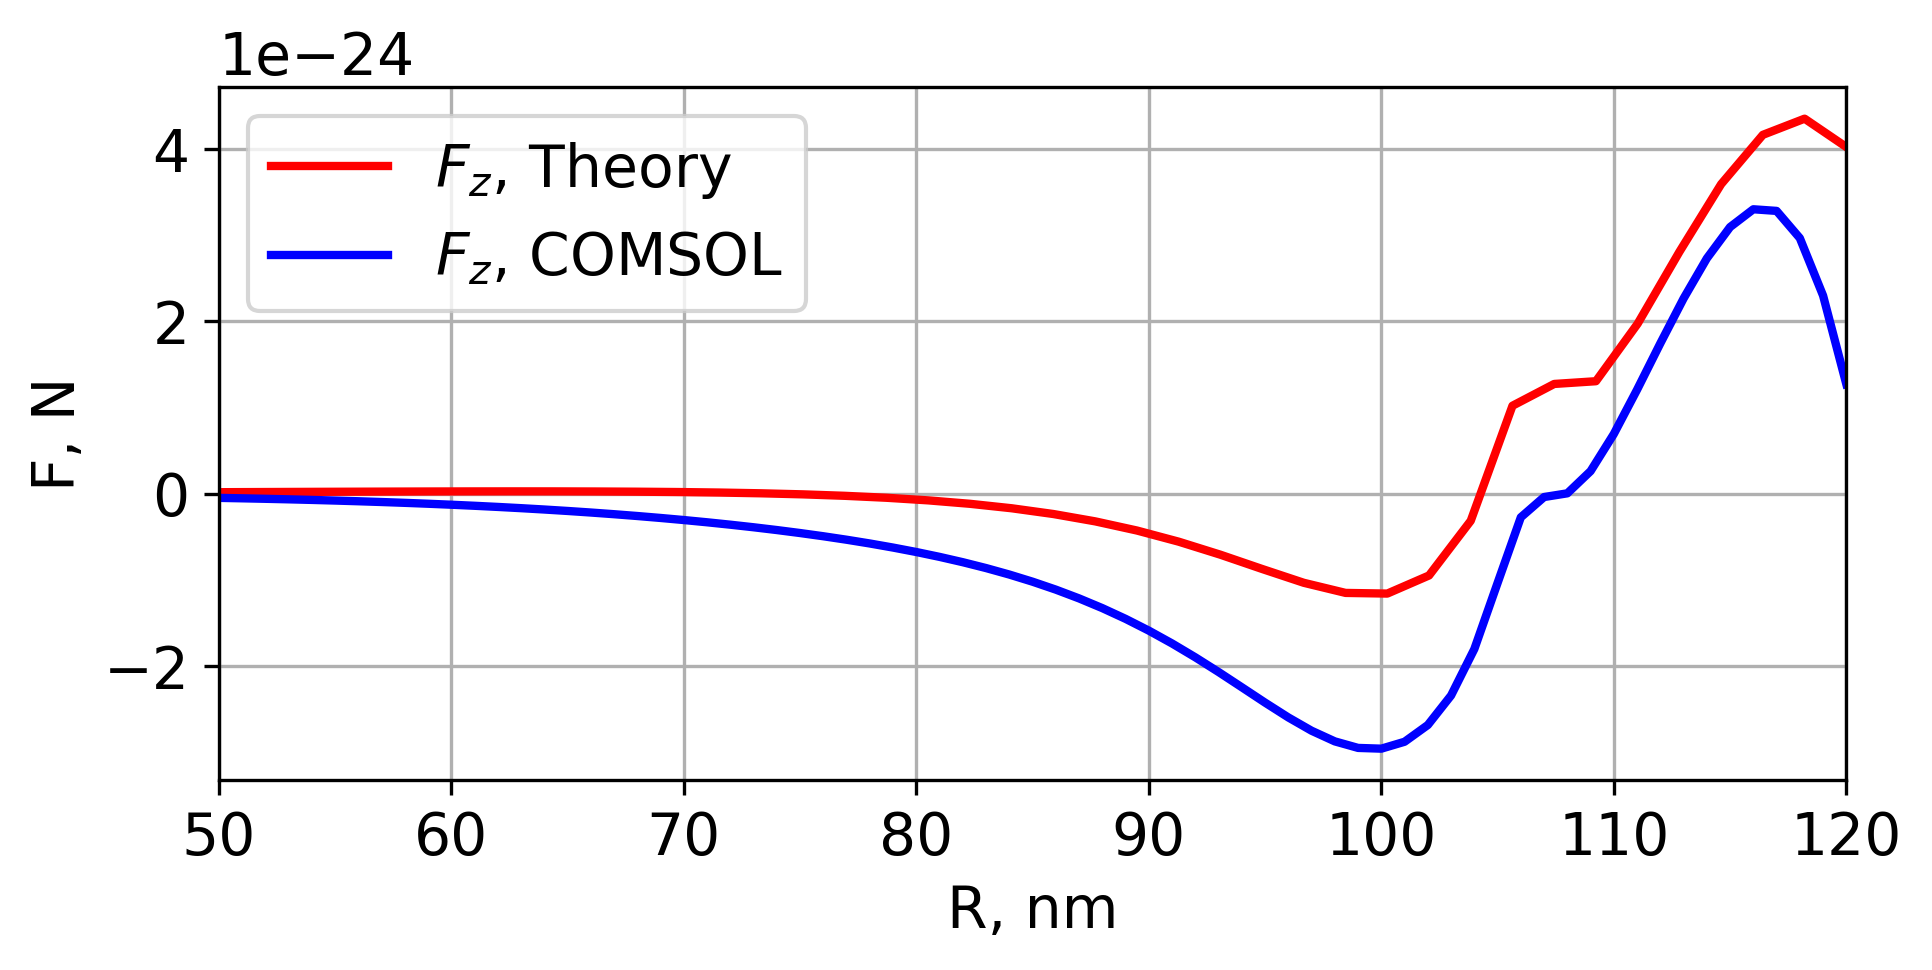

In [22]:
plt.figure(figsize=(7,3), dpi=300)
plt.plot(R, F_z[:,0], label='$F_z$, Theory', lw=2, c='red')
plt.plot(F_dat[:,0], F_dat[:,3], label='$F_z$, COMSOL', lw=2, c='blue')
plt.xlim(R[0], R[-1])
# plt.title(f'a={a}, $\delta \\varphi=${round(phase,2)},\n$\lambda=${wl} nm, $\\alpha=${round(angle*180/np.pi,1)} deg')
plt.xlabel('R, nm')
plt.ylabel('F, N')
plt.grid()
plt.legend()
plt.savefig(f'F_z_a_{round(a_angle,2)}_phase_{round(phase,2)}_comsol_theory.pdf', format="pdf", bbox_inches='tight')
plt.show()

<>:16: SyntaxWarning: invalid escape sequence '\d'
<>:26: SyntaxWarning: invalid escape sequence '\c'
<>:28: SyntaxWarning: invalid escape sequence '\c'
<>:16: SyntaxWarning: invalid escape sequence '\d'
<>:26: SyntaxWarning: invalid escape sequence '\c'
<>:28: SyntaxWarning: invalid escape sequence '\c'
C:\Users\borod\AppData\Local\Temp\ipykernel_25816\659457615.py:16: SyntaxWarning: invalid escape sequence '\d'
  fig.suptitle(f"Dipole Moments, $\\lambda$={wl} nm, a={round(a_angle*180/np.pi,2)} deg, \n$\delta \\varphi=${round(phase,2)}, $\\alpha=${round(angle*180/np.pi,1)} deg")
C:\Users\borod\AppData\Local\Temp\ipykernel_25816\659457615.py:26: SyntaxWarning: invalid escape sequence '\c'
  axs[i,j].set_ylabel('p, $C \cdot m$')
C:\Users\borod\AppData\Local\Temp\ipykernel_25816\659457615.py:28: SyntaxWarning: invalid escape sequence '\c'
  axs[i,j].set_ylabel('m, $C \cdot m$')


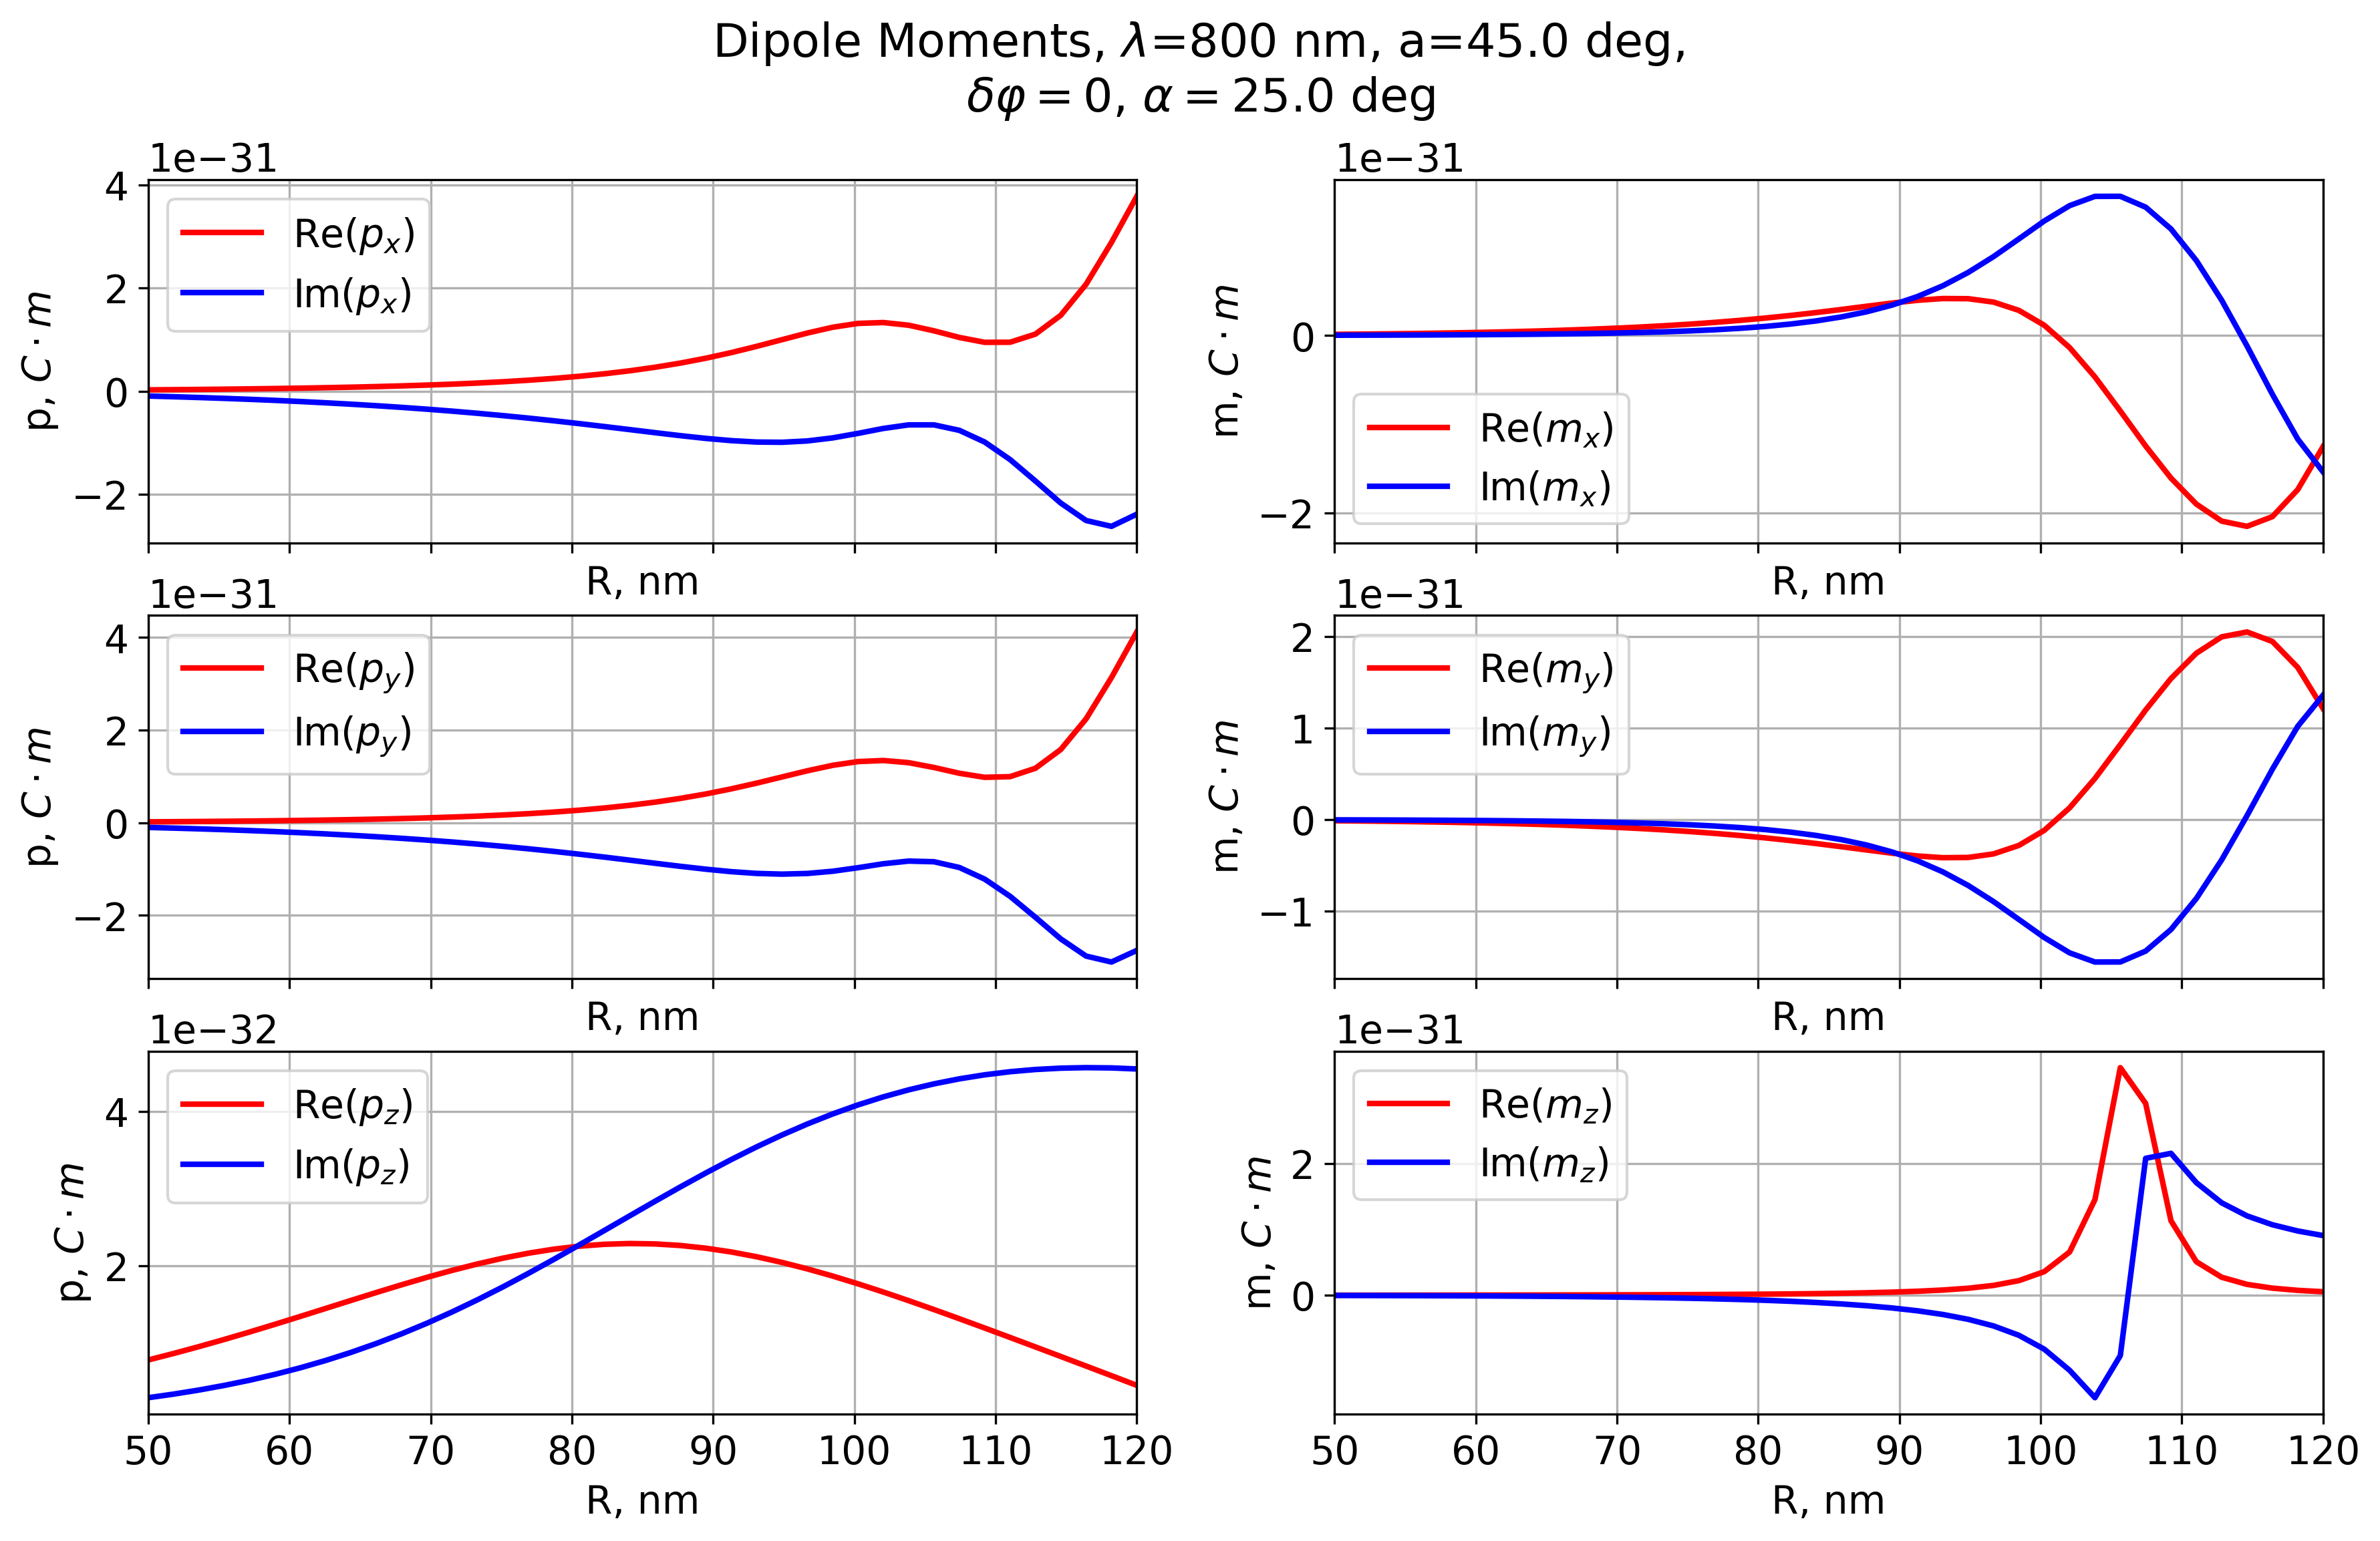

In [18]:
ncols = 2
nrows = 3
c_const = 299792458
data =[[P[:,0], M[:,0]/c_const],
       [P[:,1], M[:,1]/c_const], 
       [P[:,2], M[:,2]/c_const]]



labels = [ ['$p_x$', '$m_x$'],
           ['$p_y$', '$m_y$'],
           ['$p_z$', '$m_z$']]

fig, axs = plt.subplots(nrows,ncols, figsize=(14,8), sharex=True, dpi=300)

fig.suptitle(f"Dipole Moments, $\\lambda$={wl} nm, a={round(a_angle*180/np.pi,2)} deg, \n$\delta \\varphi=${round(phase,2)}, $\\alpha=${round(angle*180/np.pi,1)} deg")


for j in range(ncols):
    for i in range(nrows):
        axs[i,j].plot(R, np.real(data[i][j]), label='Re('+labels[i][j]+')', c='red', lw=2)
        axs[i,j].plot(R, np.imag(data[i][j]), label='Im('+labels[i][j]+')', c='blue', lw=2)
        axs[i,j].legend()
        axs[i,j].grid()
        if j==0:
            axs[i,j].set_ylabel('p, $C \cdot m$')
        else:
            axs[i,j].set_ylabel('m, $C \cdot m$')
        axs[i,j].set_xlim(R[0], R[-1])
        axs[i,j].set_xlabel('R, nm')
        
plt.savefig(f'plots_new/Dipoles_a_{round(a_angle,2)}_phase_{round(phase,2)}.pdf', format="pdf", bbox_inches='tight')
plt.show()

In [ ]:
plt.plot(R, )

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\l'
<>:2: SyntaxWarning: invalid escape sequence '\g'
<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\l'
<>:2: SyntaxWarning: invalid escape sequence '\g'
<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\s'
C:\Users\borod\AppData\Local\Temp\ipykernel_29088\3650116287.py:2: SyntaxWarning: invalid escape sequence '\d'
  plt.title(f'a={round(a_angle*180/np.pi,2)} deg, $\delta \\varphi$ ={round(phase,2)}, $\lambda$={wl} nm, $\gamma$=10 deg')
C:\Users\borod\AppData\Local\Temp\ipykernel_29088\3650116287.py:2: SyntaxWarning: invalid escape sequence '\l'
  plt.title(f'a={round(a_angle*180/np.pi,2)} deg, $\de

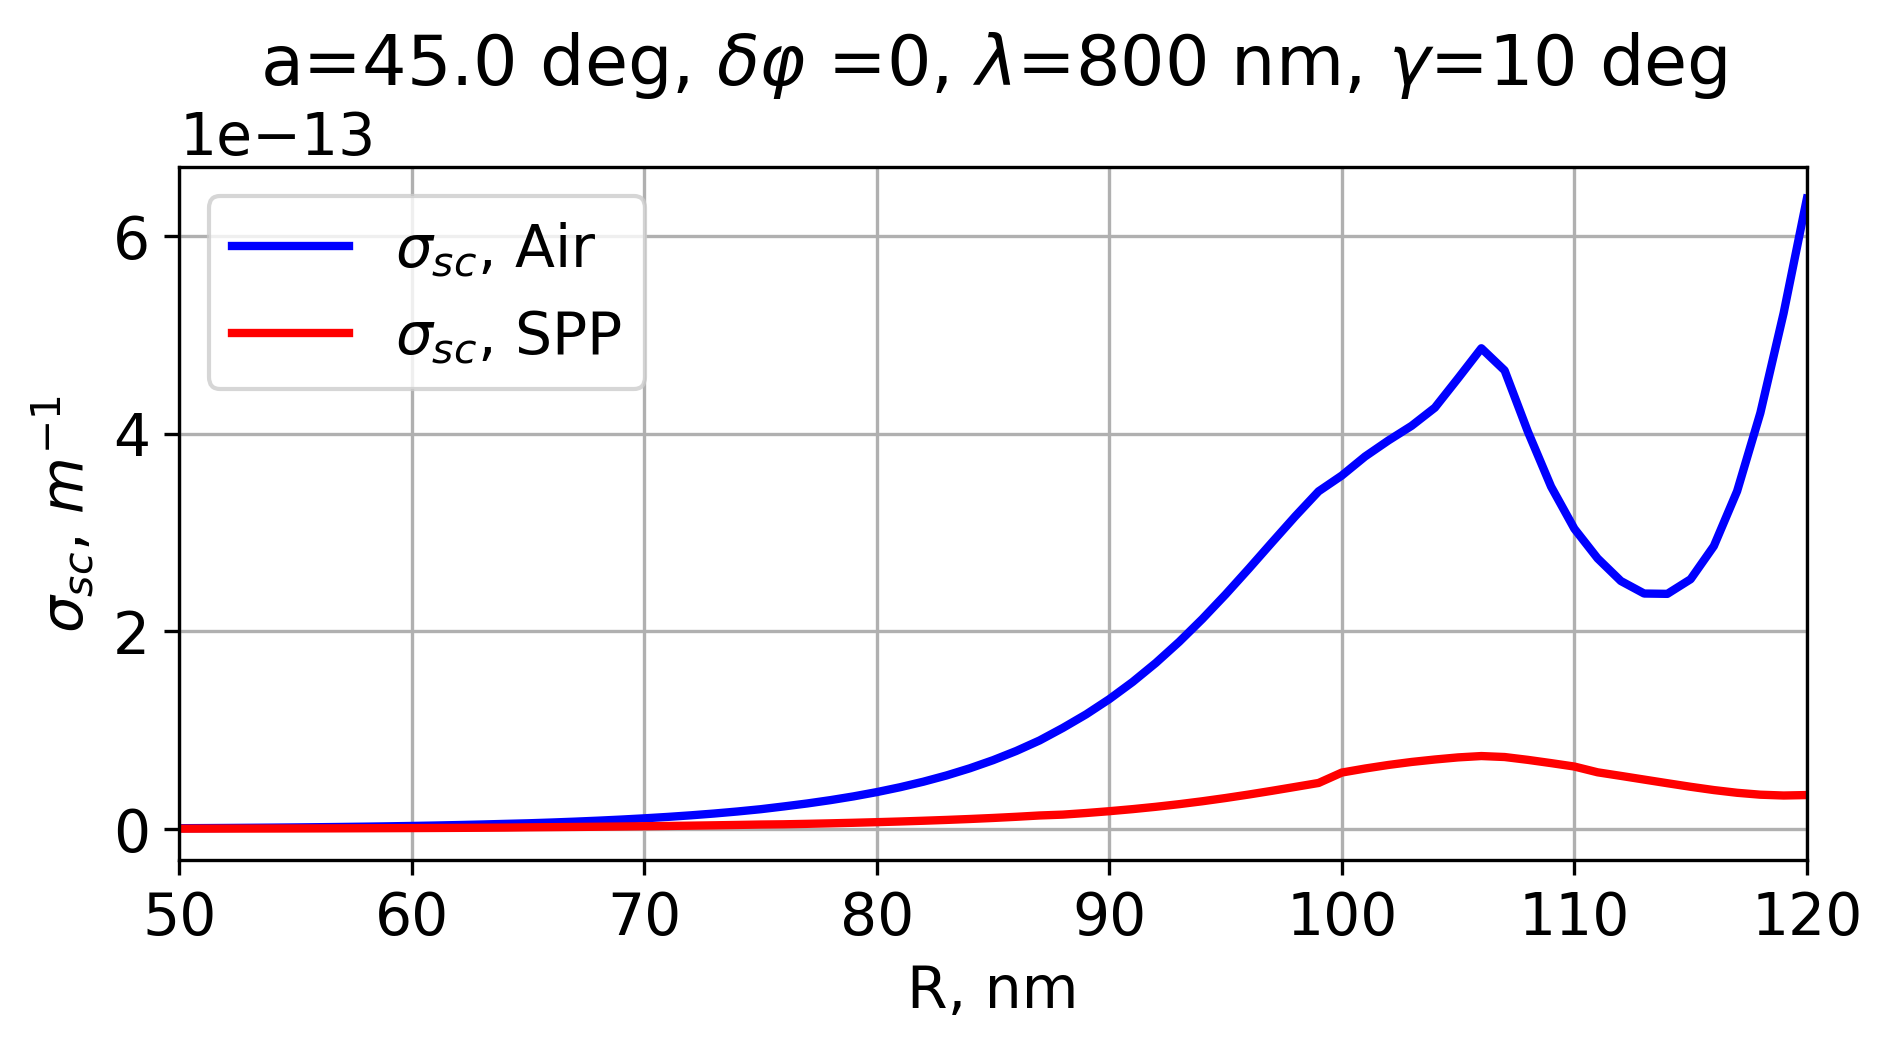

In [41]:
plt.figure(figsize=(7,3), dpi=300)
plt.title(f'a={round(a_angle*180/np.pi,2)} deg, $\delta \\varphi$ ={round(phase,2)}, $\lambda$={wl} nm, $\gamma$=10 deg')
plt.plot(sigma_air_spp[:,0], sigma_air_spp[:,1], label='$\sigma_{sc}$, Air', lw=2, c='blue')
plt.plot(sigma_air_spp[:,0], sigma_air_spp[:,2], label='$\sigma_{sc}$, SPP', lw=2, c='red')
plt.xlim(sigma_air_spp[0,0],sigma_air_spp[-1,0])
# plt.title(f'a={a}, $\delta \\varphi=${round(phase,2)},\n$\lambda=${wl} nm, $\\alpha=${round(angle*180/np.pi,1)} deg')
plt.xlabel('R, nm')
plt.ylabel('$\sigma_{sc}$, $m^{-1}$')
plt.grid()
plt.legend()
plt.savefig(f'sigma_air_spp_a_{round(a_angle,2)}_phase_{round(phase,2)}_comsol_theory.pdf', format="pdf", bbox_inches='tight')
plt.show()

In [37]:
sigma_air_spp_From_gamma = np.loadtxt('data export 27-03-25/sigma_air_sigma_spp_from_gamma.txt', delimiter=',', skiprows=8)

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\l'
<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\g'
<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\l'
<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\g'
<>:8: SyntaxWarning: invalid escape sequence '\s'
C:\Users\borod\AppData\Local\Temp\ipykernel_29088\3646042914.py:2: SyntaxWarning: invalid escape sequence '\d'
  plt.title(f'a={round(a_angle*180/np.pi,2)} deg, $\delta \\varphi$ ={round(phase,2)}, $\lambda$={wl} nm, R=105 nm')
C:\Users\borod\AppData\Local\Temp\ipykernel_29088\3646042914.py:2: SyntaxWarning: invalid escape sequence '\l'
  plt.title(f'a={round(a_angle*180/np.pi,2)} deg, $\delta \\v

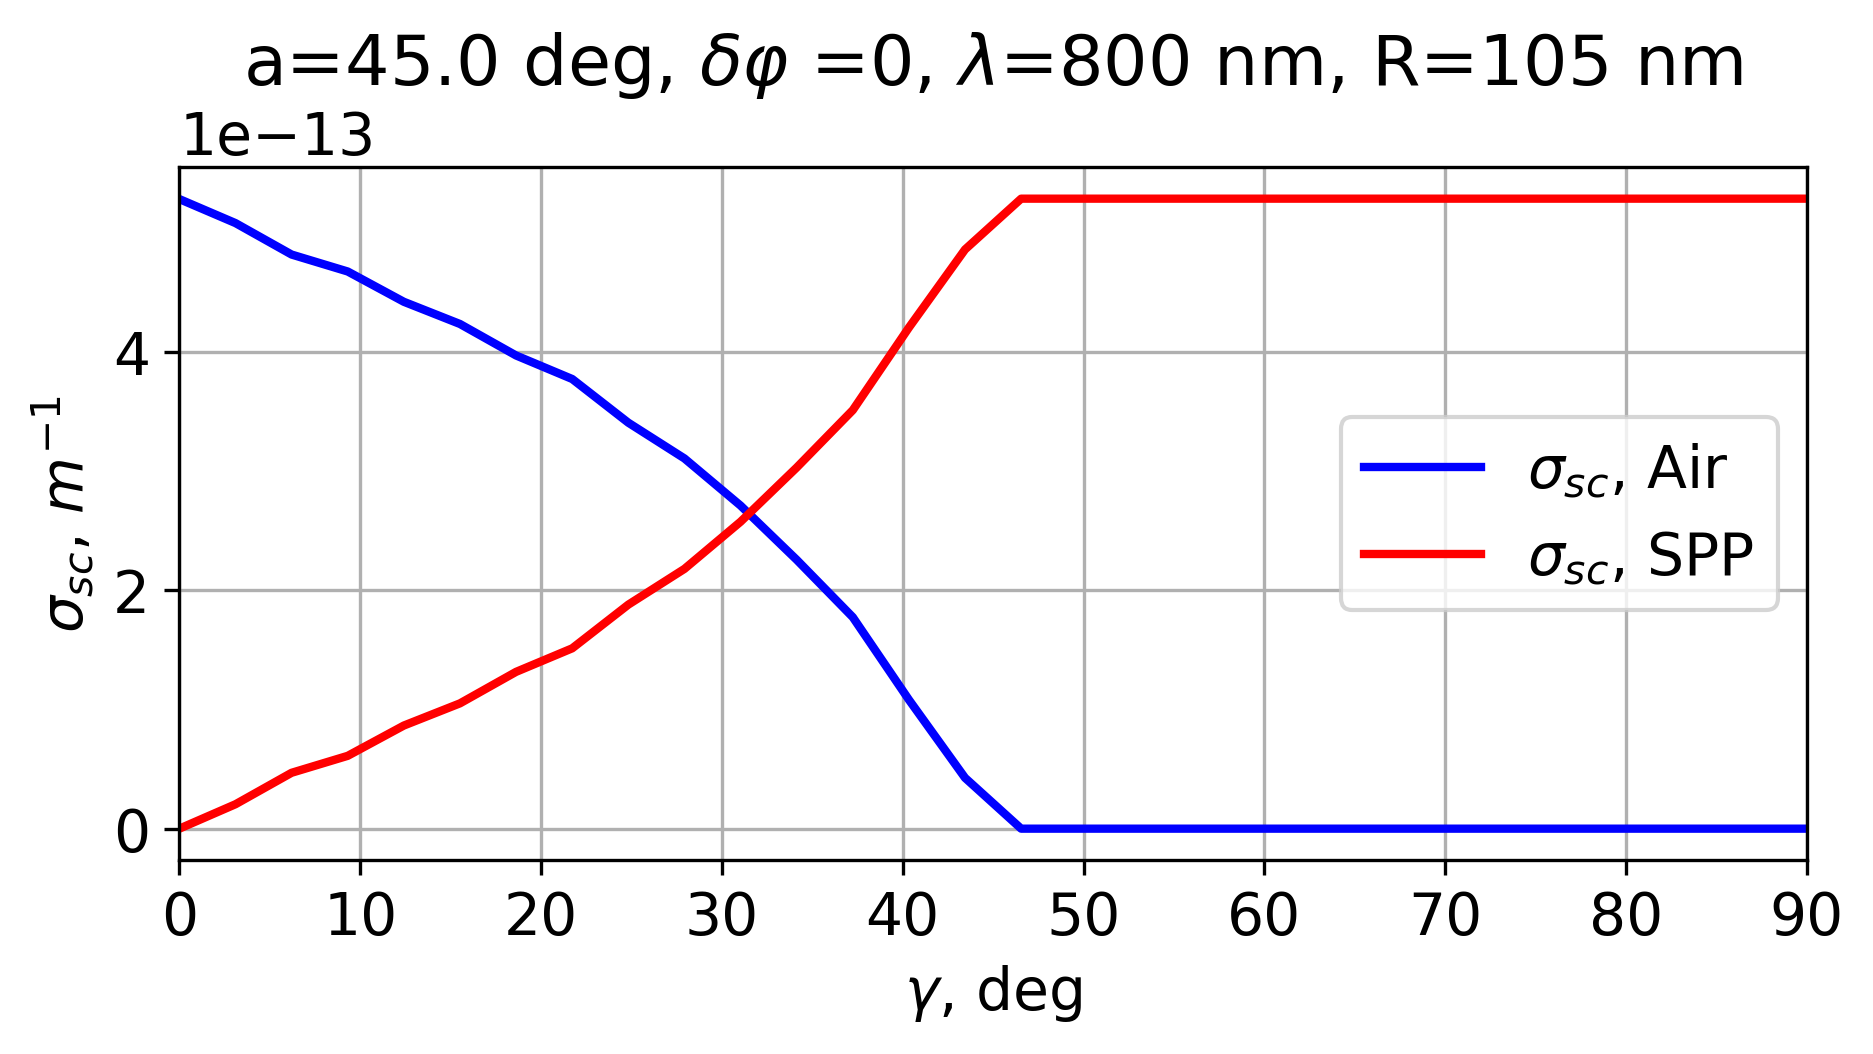

In [40]:
plt.figure(figsize=(7,3), dpi=300)
plt.title(f'a={round(a_angle*180/np.pi,2)} deg, $\delta \\varphi$ ={round(phase,2)}, $\lambda$={wl} nm, R=105 nm')
plt.plot(sigma_air_spp_From_gamma[:,0]*180/np.pi, sigma_air_spp_From_gamma[:,1], label='$\sigma_{sc}$, Air', lw=2, c='blue')
plt.plot(sigma_air_spp_From_gamma[:,0]*180/np.pi, sigma_air_spp_From_gamma[:,2], label='$\sigma_{sc}$, SPP', lw=2, c='red')
plt.xlim(sigma_air_spp_From_gamma[0,0]*180/np.pi,sigma_air_spp_From_gamma[-1,0]*180/np.pi)
# plt.title(f'a={a}, $\delta \\varphi=${round(phase,2)},\n$\lambda=${wl} nm, $\\alpha=${round(angle*180/np.pi,1)} deg')
plt.xlabel('$\gamma$, deg')
plt.ylabel('$\sigma_{sc}$, $m^{-1}$')
plt.grid()
plt.legend()
plt.savefig(f'sigma_air_spp_from_gamma_a_{round(a_angle,2)}_phase_{round(phase,2)}_comsol_theory.pdf', format="pdf", bbox_inches='tight')
plt.show()